---

**BÁO CÁO BÀI TẬP LỚN MÔN MACHINE LEARNING**

---

# **Phần 1. Tiền xử lý dữ liệu**

## 1.1 Import thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from google.colab import files
import os

## 1.2 Mô tả dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/data_project_ml/midterm-finalterm/Data/student-por.csv')
print(f"Kích thước của dữ liệu gốc {df.shape}")
print(f"Số hàng (Số mẫu): {df.shape[0]}")
print(f"Số cột (Số thuộc tính): {df.shape[1]}")

Kích thước của dữ liệu gốc (649, 33)
Số hàng (Số mẫu): 649
Số cột (Số thuộc tính): 33


Các thuộc tính (features) của dữ liệu
  - Gồm 33 cột các thuộc tính (features)
  - Hiển thị 8 dòng đầu của mỗi cột

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 33)
print(df.head(8))

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother           2          2         0       yes     no   no   
1      course   father           1          2         0        no    yes   no   
2       other   mother           1          2         0       y

Kiểu dữ liệu của từng thuộc tính (33 thuộc tính)

In [ ]:
print(" | ".join([f"{col}: {dtype}" for col, dtype in df.dtypes.items()]))

school: object | sex: object | age: int64 | address: object | famsize: object | Pstatus: object | Medu: int64 | Fedu: int64 | Mjob: object | Fjob: object | reason: object | guardian: object | traveltime: int64 | studytime: int64 | failures: int64 | schoolsup: object | famsup: object | paid: object | activities: object | nursery: object | higher: object | internet: object | romantic: object | famrel: int64 | freetime: int64 | goout: int64 | Dalc: int64 | Walc: int64 | health: int64 | absences: int64 | G1: int64 | G2: int64 | G3: int64


Giải thích ý nghĩa của mỗi thuộc tính (features):

- school: Trường học của học sinh (GP – Gabriel Pereira hoặc MS – Mousinho da Silveira).

- sex: Giới tính của học sinh (F – Nữ, M – Nam).

- age: Tuổi của học sinh (15–22).

- address: Loại địa chỉ nơi ở (U – Khu đô thị, R – Nông thôn).

- famsize: Quy mô gia đình (LE3 – ≤ 3 người, GT3 – > 3 người).

- Pstatus: Tình trạng sống của cha mẹ (T – Sống cùng nhau, A – Ly thân).

- Medu: Trình độ học vấn của mẹ (0 – không học, 1 – tiểu học, 2 – trung học, 3 – THPT, 4 – đại học).

- Fedu: Trình độ học vấn của cha (0 – không học, 1 – tiểu học, 2 – trung học, 3 – THPT, 4 – đại học).

- Mjob: Nghề nghiệp của mẹ (teacher, health, services, at_home, other).

- Fjob: Nghề nghiệp của cha (teacher, health, services, at_home, other).

- reason: Lý do chọn trường (home, reputation, course, other).

- guardian: Người giám hộ chính (mother, father, other).

- traveltime: Thời gian di chuyển từ nhà đến trường (1 – <15   phút, 2 – 15–30 phút, 3 – 30–60 phút, 4 – >60 phút).

- studytime: Thời gian học hàng tuần (1 – <2h, 2 – 2–5h, 3 – 5–10h, 4 – >10h).

- failures: Số lần học sinh thi trượt (0–3).

- schoolsup: Có được hỗ trợ học tập thêm ở trường không (yes / no).

- famsup: Có được hỗ trợ học tập thêm từ gia đình không (yes / no).

- paid: Có học thêm môn chính không (yes / no).

- activities: Có tham gia hoạt động ngoại khóa không (yes / no).

- nursery: Có học mẫu giáo trước đây không (yes / no).

- higher: Có mong muốn học đại học không (yes / no).

- internet: Có kết nối Internet ở nhà không (yes / no).

- romantic: Có đang trong mối quan hệ tình cảm không (yes / no).

- famrel: Chất lượng mối quan hệ gia đình (1 – rất kém, 5 – rất tốt).

- freetime: Thời gian rảnh sau giờ học (1 – rất ít, 5 – rất nhiều).

- goout: Tần suất ra ngoài cùng bạn bè (1 – rất ít, 5 – thường xuyên).

- Dalc: Mức độ uống rượu trong ngày thường (1 – rất ít, 5 – nhiều).

- Walc: Mức độ uống rượu vào cuối tuần (1 – rất ít, 5 – nhiều).

- health: Tình trạng sức khỏe (1 – rất kém, 5 – rất tốt).

- absences: Số buổi nghỉ học.

- G1: Điểm học kỳ 1 (0–20).

- G2: Điểm học kỳ 2 (0–20).

- G3: Điểm cuối cùng (0–20) — biến mục tiêu (target) trong bài toán dự đoán.


Số dữ liệu thiếu theo cột, số dữ liệu trùng lặp và loại bỏ dữ liệu trùng lặp

In [ ]:
print("Số dữ liệu thiếu theo cột")
print(df.isnull().sum())
print(f"\nSố dữ liệu trùng lặp: {df.duplicated().sum()}")
# Loại bỏ các hàng trùng lặp
df = df.drop_duplicates()
print(f"Số dữ liệu trùng lặp sau khi loại bỏ: {df.duplicated().sum()}")

Số dữ liệu thiếu theo cột
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Số dữ liệu trùng lặp: 0
Số dữ liệu trùng lặp sau khi loại bỏ: 0


Mô tả thống kê tổng quan của dữ liệu

In [ ]:
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

Nhận xét sau khi mô tả thống kê dữ liệu

*   Số lần trượt môn (failures) có trung bình (mean) thấp ~ 0.221, dữ liệu có nhiều giá trị 0, có thể ảnh hưởng huấn luyện.
*   Số ngày nghỉ học (absences) dao động từ 0 - 32, có ngày nghỉ học lên đến 32, sẽ khiến dữ liệu lệch phải (skewed), có outlier
*   Điểm G1,G2,G3 khá đồng đều, có điểm bằng 0 (thi trượt, bỏ thi,...)



Vẽ biểu đồ thống kê target (G3)

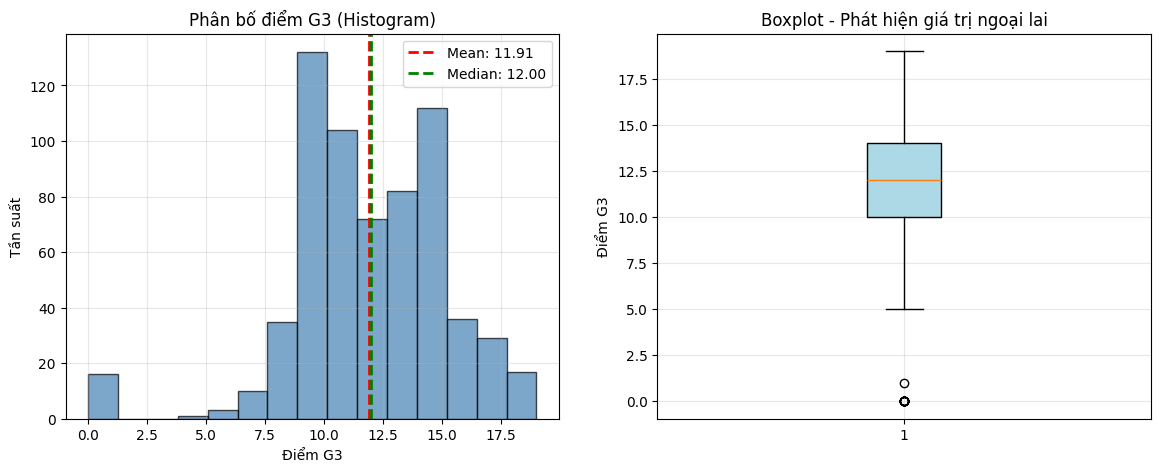


Thống kê mô tả cột G3:
Mean: 11.91
Median: 12.00
Std: 3.23


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['G3'].dropna(), bins=15, alpha=0.7,
             color='steelblue', edgecolor='black')
axes[0].axvline(df['G3'].mean(), color='red',
                linestyle='--', linewidth=2, label=f"Mean: {df['G3'].mean():.2f}")
axes[0].axvline(df['G3'].median(), color='green',
                linestyle='--', linewidth=2, label=f"Median: {df['G3'].median():.2f}")
axes[0].set_xlabel('Điểm G3')
axes[0].set_ylabel('Tần suất')
axes[0].set_title('Phân bố điểm G3 (Histogram)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot - phát hiện outliers
box = axes[1].boxplot(df['G3'].dropna(), vert=True, patch_artist=True)
box['boxes'][0].set_facecolor('lightblue')
axes[1].set_ylabel('Điểm G3')
axes[1].set_title('Boxplot - Phát hiện giá trị ngoại lai')
axes[1].grid(alpha=0.3)
plt.show()

print("\nThống kê mô tả cột G3:")
print(f"Mean: {df['G3'].mean():.2f}")
print(f"Median: {df['G3'].median():.2f}")
print(f"Std: {df['G3'].std():.2f}")


Nhận xét từ biểu đồ thống kê G3
- Histogram: điểm G3 (điểm cuối kỳ) phân bố gần như chuẩn (hơi lệch trái nhẹ) — phần lớn học sinh có điểm trong khoảng 10–14.

- Dữ liệu khá rời rạc, vì G3 là điểm từ 0–20 (int).
→ Có các cụm rõ ràng: 10, 11, 12, 13, 14, 15.

- Có một đỉnh rất cao quanh 9–11.

- Target phân bố rời rạc → Linear Regression dự đoán ra số lẻ (12.7, 13.4) trong khi thực tế điểm chỉ là số nguyên → tạo ra sai số lớn, R² thấp.

- Target Không phải phân bố chuẩn hoàn toàn, nhưng gần chuẩn → không quá ảnh hưởng mạnh, tuy nhiên: Residual không đẹp, Linear Regression không tối ưu

- Đường đỏ (Mean) ≈ 11.91 và đường xanh (Median) = 12.00 → hai giá trị gần nhau ⇒ phân phối khá cân đối, không lệch mạnh. Dữ liệu tập trung nhiều ở giữa (10–14)
→ Mô hình có xu hướng dự đoán gần mean, dẫn đến: Dự đoán sai điểm cao (17–20) và dự đoán sai điểm thấp (0–5)

- Boxplot: không có ngoại lai rõ rệt, chỉ có vài học sinh điểm rất thấp (~0–5) là hiếm.

## 1.3 Tiền xử lý dữ liệu

### a) Chuẩn hóa dữ liệu các cột số

In [ ]:
# Lấy các cột số
numeric_columns = df.select_dtypes(include=['int64']).columns
# Không chuẩn hóa cột nhãn (G3)
numeric_columns = numeric_columns.drop('G3')


Sử dụng Standardization

In [ ]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print("Mô tả dữ liệu các cột số sau khi chuẩn hóa bằng StandardScaler")
df[numeric_columns].describe()

Mô tả dữ liệu các cột số sau khi chuẩn hóa bằng StandardScaler


age          Medu          Fedu    traveltime     studytime  \
count  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02   
mean  -1.751723e-16 -1.094827e-16 -3.284481e-17 -7.663789e-17  9.579736e-17   
std    1.000771e+00  1.000771e+00  1.000771e+00  1.000771e+00  1.000771e+00   
min   -1.432980e+00 -2.218124e+00 -2.098682e+00 -7.600319e-01 -1.122808e+00   
25%   -6.114218e-01 -4.539544e-01 -1.188832e+00 -7.600319e-01 -1.122808e+00   
50%    2.101367e-01 -4.539544e-01 -2.789831e-01 -7.600319e-01  8.365295e-02   
75%    1.031695e+00  1.310216e+00  6.308662e-01  5.767180e-01  8.365295e-02   
max    4.317929e+00  1.310216e+00  1.540715e+00  3.250218e+00  2.496576e+00   

           failures        famrel      freetime         goout          Dalc  \
count  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02   
mean   3.284481e-17 -1.628555e-16  1.861206e-16  7.116376e-17 -3.284481e-17   
std    1.000771e+00  1.000771e+00  1.000771e+00  1.000771e+00  1.000771e+00   
min   -3.743051e-01 -3.068820e+00 -2.075896e+00 -1.859711e+00 -5.435553e-01   
25%   -3.743051e-01  7.260615e-02 -1.716465e-01 -1.008546e+00 -5.435553e-01   
50%   -3.743051e-01  7.260615e-02 -1.716465e-01 -1.573803e-01 -5.435553e-01   
75%   -3.743051e-01  1.119748e+00  7.804783e-01  6.937850e-01  5.385533e-01   
max    4.686612e+00  1.119748e+00  1.732603e+00  1.544950e+00  3.784879e+00   

               Walc        health      absences            G1            G2  
count  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02  
mean   7.937496e-17 -1.149568e-16  2.189654e-17  2.846550e-16 -2.189654e-17  
std    1.000771e+00  1.000771e+00  1.000771e+00  1.000771e+00  1.000771e+00  
min   -9.976947e-01 -1.754987e+00 -7.891595e-01 -4.155470e+00 -3.974080e+00  
25%   -9.976947e-01 -1.063015e+00 -7.891595e-01 -5.100253e-01 -5.392978e-01  
50%   -2.185083e-01  3.209302e-01 -3.578630e-01 -1.454808e-01 -1.958196e-01  
75%    5.606780e-01  1.012903e+00  5.047298e-01  5.836082e-01  4.911368e-01  
max    2.119051e+00  1.012903e+00  6.111583e+00  2.770875e+00  2.552006e+00

Công thức chuẩn hóa bằng StandardScaler:

$$
z = \frac{x - \mu}{\sigma}
$$

Trong đó:
- $x$: giá trị ban đầu của đặc trưng  
- $\mu$: giá trị trung bình của đặc trưng  
- $\sigma$: độ lệch chuẩn của đặc trưng  
- $z$: giá trị sau khi chuẩn hóa

---

Ý nghĩa trong mô hình học máy:

- Không để các cột có đơn vị đo khác nhau (ví dụ absences và G3) làm sai lệch mô hình.

- Các thuật toán dựa trên khoảng cách (KNN, PCA) hoặc gradient descent (LinearRegression, LogisticRegression) sẽ hội tụ nhanh hơn và ổn định hơn.


###b) One-hot coding các cột chuỗi / phân loại

In [ ]:
# Lấy các cột chuỗi / phân loại
object_columns = df.select_dtypes(include=['object']).columns
print(df[object_columns].describe())
print("\n Số cột chuỗi / phân loại là: ", len(df[object_columns].columns))

       school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     649  649     649     649     649    649    649     649      649   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      423  383     452     457     569    258    367     285      455   

       schoolsup famsup paid activities nursery higher internet romantic  
count        649    649  649        649     649    649      649      649  
unique         2      2    2          2       2      2        2        2  
top           no    yes   no         no     yes    yes      yes       no  
freq         581    398  610        334     521    580      498      410  

 Số cột chuỗi / phân loại là:  17


Ý nghĩa của:
 - count: Số giá trị không bị thiếu (non-null)
 - unique:	Số lượng giá trị duy nhất
 - top: Giá trị xuất hiện nhiều nhất
 - freq:	Số lần xuất hiện của giá trị phổ biến nhất

Giá trị duy nhất của từng cột object

In [ ]:
for col in object_columns:
    print(f"{col}: {df[col].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


One-hot coding các cột object

In [ ]:
# Khởi tạo encoder
oh = OneHotEncoder(sparse_output=False, drop='first')
print(" oh = OneHotEncoder(sparse_output=False, drop='first')")
print(" - Khởi tạo instance của encoder, sparse_output=False trả về oh là mảng NumPy thường (không ở dạng ma trận thưa).")
print(" - drop='first' loại bỏ cột đầu tiên trong mỗi nhóm biến phân loại để tránh đa cộng tuyến (multicollinearity) khi dùng hồi quy tuyến tính hoặc logistic regression.")

# Mã hóa (One-hot)
encoded_array = oh.fit_transform(df[object_columns])
print("\n encoded_array = oh.fit_transform(df[object_columns])")
print(" - object_columns: danh sách các cột có kiểu dữ liệu object (ví dụ: school, sex, address, Mjob, …).")
print(" - Mỗi cột object được tách thành n−1 cột nhị phân nếu có n giá trị phân loại.")

# Tạo DataFrame mới cho các cột đã mã hóa
encoded_df = pd.DataFrame(encoded_array, columns=oh.get_feature_names_out(object_columns))
print("\n encoded_df = pd.DataFrame(encoded_array, columns=oh.get_feature_names_out(object_columns))")
print(" - encoded_df chứa toàn bộ các cột số 0/1 đó.")

# Gộp với phần dữ liệu còn lại (loại bỏ cột gốc chuỗi)
df = pd.concat([df.drop(columns=object_columns), encoded_df], axis=1)
print("\n df = pd.concat([df.drop(columns=object_columns), encoded_df], axis=1)")
print(" - Loại bỏ các cột chuỗi gốc.")
print(" - Gộp phần dữ liệu mã hóa (encoded_df) vào DataFrame gốc.")

print("\nKích thước của dữ liệu sau khi preprocessing: ", df.shape)


 oh = OneHotEncoder(sparse_output=False, drop='first')
 - Khởi tạo instance của encoder, sparse_output=False trả về oh là mảng NumPy thường (không ở dạng ma trận thưa).
 - drop='first' loại bỏ cột đầu tiên trong mỗi nhóm biến phân loại để tránh đa cộng tuyến (multicollinearity) khi dùng hồi quy tuyến tính hoặc logistic regression.

 encoded_array = oh.fit_transform(df[object_columns])
 - object_columns: danh sách các cột có kiểu dữ liệu object (ví dụ: school, sex, address, Mjob, …).
 - Mỗi cột object được tách thành n−1 cột nhị phân nếu có n giá trị phân loại.

 encoded_df = pd.DataFrame(encoded_array, columns=oh.get_feature_names_out(object_columns))
 - encoded_df chứa toàn bộ các cột số 0/1 đó.

 df = pd.concat([df.drop(columns=object_columns), encoded_df], axis=1)
 - Loại bỏ các cột chuỗi gốc.
 - Gộp phần dữ liệu mã hóa (encoded_df) vào DataFrame gốc.

Kích thước của dữ liệu sau khi preprocessing:  (649, 42)


Xuất ra file đã chuẩn hóa

In [ ]:
from google.colab import files
file_path = '/content/drive/MyDrive/data_project_ml/midterm-finalterm/Data/student_por_preprocessed.csv'

# Lưu file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print(f"Đã lưu file vào {file_path}")

Đã lưu file vào /content/drive/MyDrive/data_project_ml/midterm-finalterm/Data/student_por_preprocessed.csv


## 1.4 Mô tả dữ liệu sau khi chuẩn hóa

Sử dụng dữ liệu sau khi chuẩn hóa

In [ ]:
df_preprocessed = pd.read_csv("/content/drive/MyDrive/data_project_ml/midterm-finalterm/Data/student_por_preprocessed.csv")

In [ ]:
# Xem kích thước dữ liệu
print("Kích thước dữ liệu sau khi chuẩn hóa:", df_preprocessed.shape)

Kích thước dữ liệu sau khi chuẩn hóa: (649, 42)


`oh = OneHotEncoder(sparse=False, drop='first')`

- Đây là đoạn code khiến cho số cột của dữ liệu sau khi xử lý có số cột là 42, chứ không phải 59, lí do là drop='first' là điểm mấu chốt khiến số cột giảm.

- Thay vì tạo n cột cho một biến có n giá trị, encoder chỉ tạo n−1 cột.

- Cột đầu tiên bị loại bỏ (drop) để tránh đa cộng tuyến (multicollinearity) khi huấn luyện mô hình tuyến tính.



In [ ]:
print("\n Mô tả thống kê chi tiết:")
print(df_preprocessed.describe())


 Mô tả thống kê chi tiết:
                age          Medu          Fedu    traveltime     studytime  \
count  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02   
mean  -1.751723e-16 -1.094827e-16 -3.284481e-17 -7.663789e-17  7.390082e-17   
std    1.000771e+00  1.000771e+00  1.000771e+00  1.000771e+00  1.000771e+00   
min   -1.432980e+00 -2.218124e+00 -2.098682e+00 -7.600319e-01 -1.122808e+00   
25%   -6.114218e-01 -4.539544e-01 -1.188832e+00 -7.600319e-01 -1.122808e+00   
50%    2.101367e-01 -4.539544e-01 -2.789831e-01 -7.600319e-01  8.365295e-02   
75%    1.031695e+00  1.310216e+00  6.308662e-01  5.767180e-01  8.365295e-02   
max    4.317929e+00  1.310216e+00  1.540715e+00  3.250218e+00  2.496576e+00   

           failures        famrel      freetime         goout          Dalc  \
count  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02  6.490000e+02   
mean   1.094827e-17 -1.724353e-16  2.162283e-16  7.116376e-17 -2.737068e-17   
std    1.000771e+00  1.0

 - Các cột số chuẩn hóa sẽ có mean ≈ 0, std ≈ 1.

- Các cột mới từ one-hot sẽ là 0 hoặc 1, và describe() sẽ hiển thị count, mean (tỷ lệ 1), std, min/max.



---



---



# **Phần 2.   Phân tích và trực quan hóa dữ liệu:**



## 2.1) Chia đầu vào (input) và đầu ra (output)

- Tách cột G3 ra khỏi data frame ra gán cho y (giá trị phụ thuộc)
- Còn lại các cột gán cho X

In [ ]:
X_preprocessed = df_preprocessed.drop(columns=['G3'], axis = 1)
y_preprocessed = df_preprocessed['G3'].values

- Chia dữ liệu thành tập huấn luyện (Training set) và tập dữ liệu dự đoán (Test set)

In [ ]:
# Chia dữ liệu thành 2 tập
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_preprocessed, test_size=0.3,
    random_state=42, shuffle=True)

- Ý nghĩa:
  - train_test_split: Đây là hàm từ thư viện scikit-learn, được sử dụng để chia tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra.
  - test_size: Tỷ lệ dữ liệu test (thường 0.2 hoặc 0.3)
  - train_size: Có thể chỉ định tỉ lệ train (nếu không, phần còn lại = 1 - test_size)
  - random_state: Đảm bảo chia dữ liệu giống nhau mỗi lần chạy (giúp tái lập kết quả), có thể chọn số bất kì khác 42

- Kết quả của hàm train_test_split:
  - X_train: Dữ liệu đầu vào (đặc trưng) để mô hình học, với 70% của tập dữ liệu
  - X_test: Dữ liệu đầu vào để kiểm tra mô hình, với 30% còn lại của tập dữ liệu
  - y_train: Kết quả đúng tương ứng với X_train, với 70% nhãn của tập kết quả
  - y_test: Kết quả đúng tương ứng với X_test, với 30% nhãn còn lại của tập kết quả

## 2.2) Giảm chiều dữ liệu



### 2.2.1) PCA (Principal component analysis)

#### a. Thủ công

Tính ma trận hiệp phương sai

Công thức tính ma trận hiệp phương sai:

$$
C = \frac{1}{n - 1} X^T X
$$


In [ ]:
import numpy as np
# X: dữ liệu gốc, shape (n_samples, n_features)
X_mean = np.mean(X_preprocessed, axis=0)
X_centered = X_preprocessed - X_mean  # trừ trung bình cột

In [ ]:
# Ma trận hiệp phương sai (features x features)
cov_matrix = np.cov(X_centered, rowvar=False)
print('Ma trận hiệp phương sai: \n', cov_matrix)

Ma trận hiệp phương sai: 
 [[ 1.00154321 -0.10799823 -0.1212373  ... -0.08196401  0.00554996
   0.08637898]
 [-0.10799823  1.00154321  0.6484758  ...  0.06603388  0.11258879
  -0.01497157]
 [-0.1212373   0.6484758   1.00154321 ...  0.05919238  0.07764673
  -0.03269211]
 ...
 [-0.08196401  0.06603388  0.05919238 ...  0.09516065  0.00917604
  -0.0147996 ]
 [ 0.00554996  0.11258879  0.07764673 ...  0.00917604  0.17880785
   0.0071097 ]
 [ 0.08637898 -0.01497157 -0.03269211 ... -0.0147996   0.0071097
   0.23300329]]


In [ ]:
# np.linalg.eigh dùng cho ma trận đối xứng (cov_matrix)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [ ]:
# Sắp xếp giảm dần
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print("Sau khi sắp xếp:")
print("eigenvalues: \n", eigenvalues)
print("eigenvectors: \n", eigenvectors)

Sau khi sắp xếp:
eigenvalues: 
 [3.10517129 2.02566965 1.37355961 1.28976776 1.16204383 1.01094524
 0.92752651 0.89013678 0.81765056 0.79158578 0.64908996 0.5725554
 0.42424899 0.37446984 0.35633883 0.26461434 0.25689083 0.24362375
 0.23255955 0.22425927 0.21700355 0.19594502 0.17810207 0.15634837
 0.14790108 0.14180402 0.13837686 0.13304545 0.12631713 0.10729251
 0.08835312 0.08645487 0.08414323 0.07427806 0.06451418 0.06142945
 0.05072764 0.03740518 0.03486086 0.0218503  0.01074977]
eigenvectors: 
 [[-0.19731684 -0.00307922  0.15022308 ...  0.05597689 -0.01003067
   0.00521923]
 [ 0.28735735 -0.38581387  0.29671729 ... -0.00515448  0.10950185
   0.01641348]
 [ 0.25272566 -0.40385536  0.28792337 ... -0.00733396 -0.01636919
  -0.03335418]
 ...
 [ 0.07612603 -0.01296948 -0.02282189 ... -0.05017338  0.05834006
   0.00218294]
 [ 0.04258229 -0.08362115  0.01460216 ...  0.01297482  0.06784813
   0.00121698]
 [-0.03169944  0.01104211  0.03290431 ...  0.03131417 -0.00308733
  -0.00858401]]


Chọn số thành phần chính k

In [ ]:
k = 2
top_eigenvectors = eigenvectors[:, :k]  # shape (n_features, k)

Chiếu dữ liệu lên không gian PCA

In [ ]:
X_pca_manual = np.dot(X_centered, top_eigenvectors)  # shape (n_samples, k)

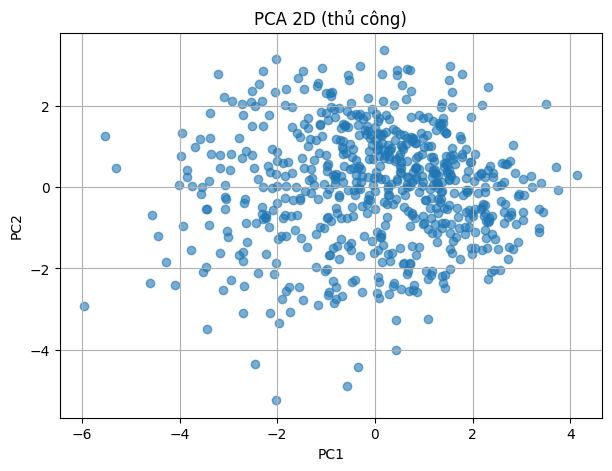

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(X_pca_manual[:,0], X_pca_manual[:,1], alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D (thủ công)')
plt.grid(True)
plt.show()

#### b. Dùng thư viện sklearn

Áp dụng PCA

Khởi tạo PCA với số thành phần mong muốn (n_components) hoặc để giữ ≥95% phương sai.

Chuyển dữ liệu sang không gian PCA:

In [ ]:
from sklearn.decomposition import PCA

# Hàm giảm chiều dữ liệu
# n_components là số chiều giữ lại để giữ 95% variance
def apply_pca(X, variance_threshold=0.95):
    pca = PCA(n_components=variance_threshold, random_state=42)
    X_pca = pca.fit_transform(X)
    n_comps = pca.n_components_
    print(f"Số chiều giữ lại sau PCA: {n_comps} (giữ ≥ {variance_threshold*100:.1f}% phương sai)")
    return X_pca, n_comps, pca  # trả cả pca object

# Áp dụng PCA
X_pca, n_comps, pca = apply_pca(X_preprocessed, variance_threshold=0.95)


Số chiều giữ lại sau PCA: 28 (giữ ≥ 95.0% phương sai)


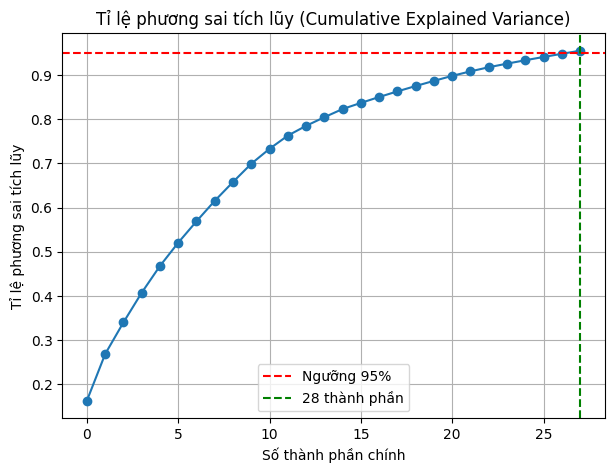

In [ ]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

# Vẽ cumulative variance
plt.figure(figsize=(7, 5))
plt.plot(cum_var, marker='o')
plt.axhline(0.95, color='r', linestyle='--', label='Ngưỡng 95%')
plt.axvline(n_comps-1, color='g', linestyle='--', label=f'{n_comps} thành phần')
plt.title('Tỉ lệ phương sai tích lũy (Cumulative Explained Variance)')
plt.xlabel('Số thành phần chính')
plt.ylabel('Tỉ lệ phương sai tích lũy')
plt.legend()
plt.grid(True)
plt.show()

T**rực quan hóa dữ liệu PCA**

Khi giữ 4–6 thành phần, trực quan hóa từng cặp thành phần chính để quan sát phân bố:

Explained variance theo từng thành phần chính:
PC1: 0.1622 (16.22%)
PC2: 0.1058 (10.58%)
PC3: 0.0717 (7.17%)
PC4: 0.0674 (6.74%)
PC5: 0.0607 (6.07%)
PC6: 0.0528 (5.28%)


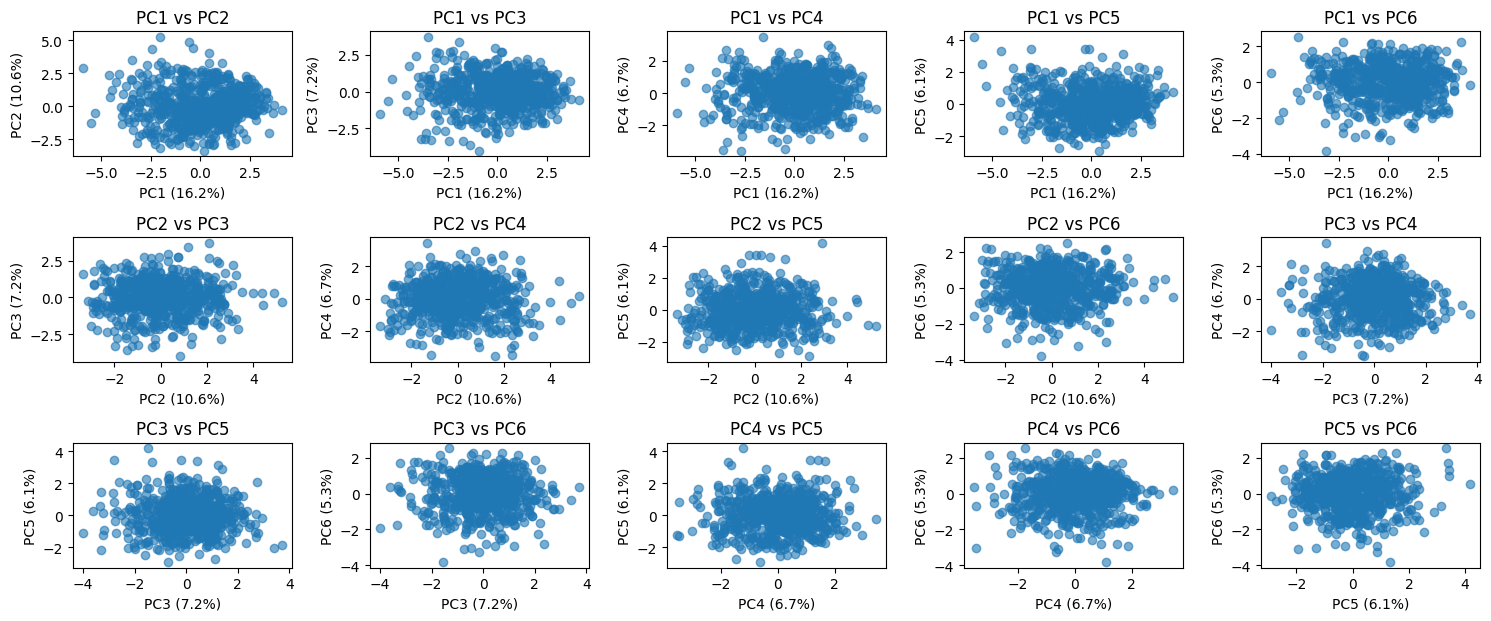

In [ ]:
n_pcs_to_plot = 6
explained_variances = pca.explained_variance_ratio_[:n_pcs_to_plot]

print("Explained variance theo từng thành phần chính:")
for i, var in enumerate(explained_variances, start=1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")

# Vẽ trực quan các cặp 2D
plt.figure(figsize=(15, 10))

pair_index = 1
for i in range(n_pcs_to_plot - 1):
    for j in range(i+1, n_pcs_to_plot):
        plt.subplot(n_pcs_to_plot-1, n_pcs_to_plot-1, pair_index)
        plt.scatter(X_pca[:, i], X_pca[:, j], alpha=0.6)
        plt.xlabel(f'PC{i+1} ({explained_variances[i]*100:.1f}%)')
        plt.ylabel(f'PC{j+1} ({explained_variances[j]*100:.1f}%)')
        plt.title(f'PC{i+1} vs PC{j+1}')
        pair_index += 1

plt.tight_layout()
plt.show()

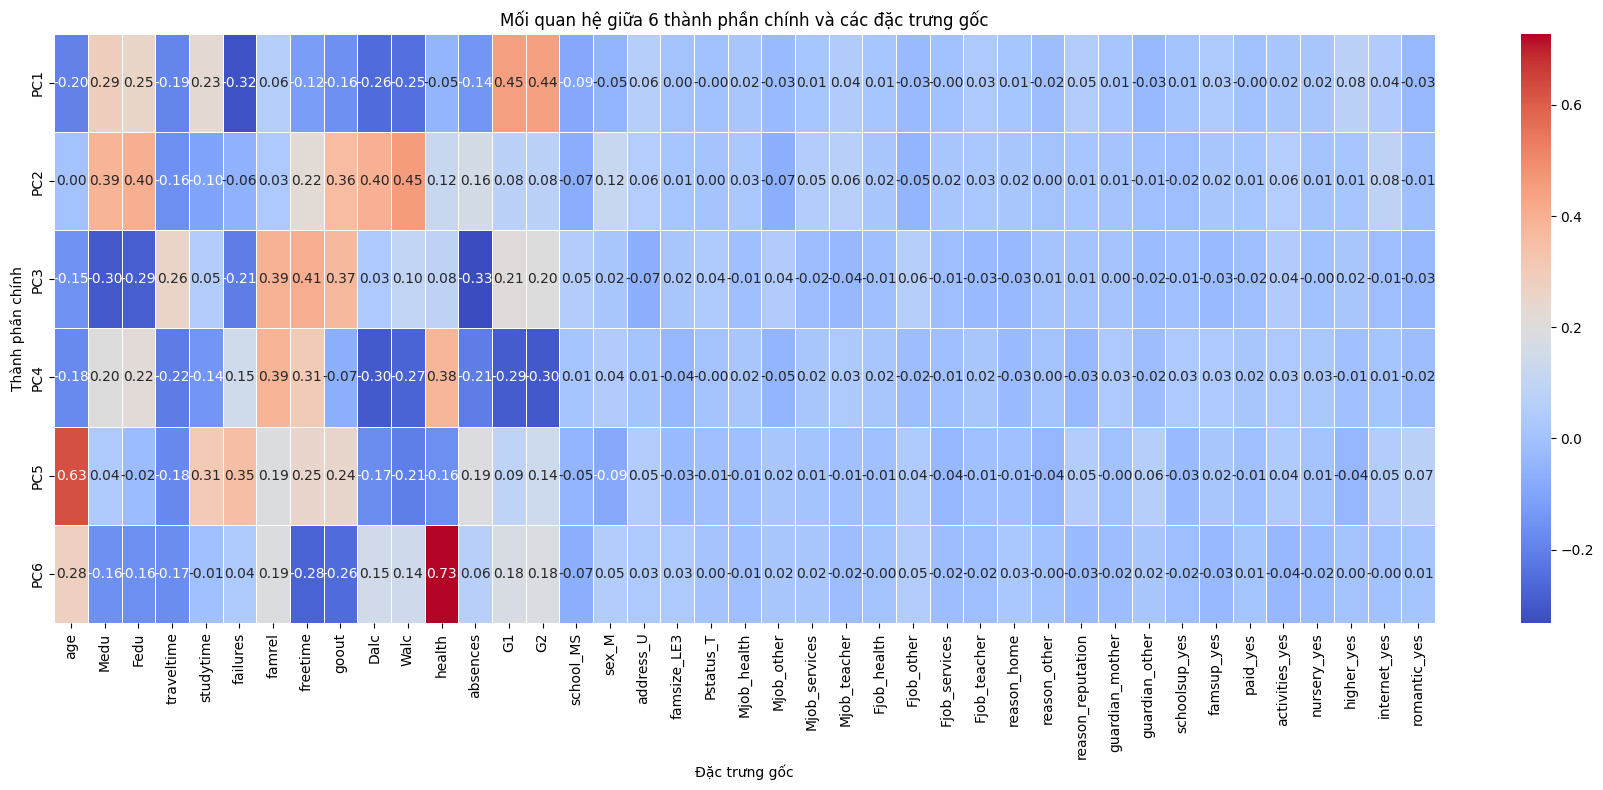

In [ ]:
n_pcs_to_plot = 6

pca_components = pd.DataFrame(
    pca.components_[:n_pcs_to_plot],
    columns=X_preprocessed.columns,
    index=[f'PC{i+1}' for i in range(n_pcs_to_plot)]
)

plt.figure(figsize=(18, 8))
sns.heatmap(pca_components, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Mối quan hệ giữa {n_pcs_to_plot} thành phần chính và các đặc trưng gốc')
plt.xlabel('Đặc trưng gốc')
plt.ylabel('Thành phần chính')
plt.tight_layout()
plt.show()

Lưu lại dữ liệu giảm chiều

In [ ]:
import pandas as pd

# Thư mục lưu file
save_dir = '/content/drive/MyDrive/data_project_ml/midterm-finalterm/Data'
print(X_pca.shape)

# Chuyển dữ liệu giảm chiều thành DataFrame
n_pca = X_pca.shape[1]  # số component PCA

df_pca = pd.DataFrame(X_pca[:, :n_pca], columns=[f'PC{i+1}' for i in range(n_pca)])

# Đường dẫn file
file_pca = os.path.join(save_dir, 'X_pca_reduced.csv')
# Lưu CSV
df_pca.to_csv(file_pca, index=False, encoding='utf-8-sig')

print(f"Đã lưu X_pca tại: {file_pca}")

(649, 28)
Đã lưu X_pca tại: /content/drive/MyDrive/data_project_ml/midterm-finalterm/Data/X_pca_reduced.csv


### 2.2.2) PLS (Regression Manual Implementation)

#### a. Thủ công

In [ ]:
def pls1_reduce_dimension(X, Y, n_components):
  Y = Y.reshape(-1, 1)

  # Center X và Y
  X_mean = X.mean(0) # tính mean theo từng feature
  Xc = X - X_mean
  Y_mean = Y.mean(0)
  Yc = Y - Y_mean

  n, p = X.shape

  # Khởi tạo các ma trận
  W = np.zeros((p, n_components)) # Weight matrix của X: dùng để chiếu X sang latent space (n_features × n_components)
  P = np.zeros((p, n_components)) # Loading matrix của X: mô tả mức đóng góp của từng feature vào mỗi latent component (n_features × n_components)
  Q = np.zeros((n_components, 1)) # Loading vector của Y: mức liên hệ của mỗi latent component với Y (n_components × 1)
  T = np.zeros((n, n_components)) # Latent scores matrix: biểu diễn mới của các samples trong không gian latent (n_samples × n_components)

  # Khởi tạo X_cur = X, Y_cur = Y
  X_cur = Xc.copy()
  Y_cur = Yc.copy()

  # Trích từng thành phần
  for i in range(n_components):
    # Weight vector của X (liên hệ với Y)
    w = (X_cur.T).dot(Y_cur)

    # Chuẩn hóa w để có chuẩn = 1: w <- (w / ||w||)
    w /= np.linalg.norm(w)
    W[:, i] = w.ravel() # w vào cột thứ i của W

    # Latent score vector (biểu diễn component thứ i)
    t = X_cur.dot(w)
    T[:, i] = t.ravel()

    # Loading của X (mức đóng góp của X vào component)
    p = (X_cur.T.dot(t)) / (t.T.dot(t))
    P[:, i] = p.ravel()

    # Loading của Y
    q = (t.T.dot(Y_cur)) / (t.T.dot(t))
    Q[i] = q

    # Deflation: loại bỏ phần thông tin đã được giải thích
    X_cur = X_cur - t.dot(p.T)
    Y_cur = Y_cur - q*t

  return T, W, P, Q

In [ ]:
T, W, P, Q = pls1_reduce_dimension(X_preprocessed.values, y_preprocessed, n_components=2)
X_pls = T
print(X_pls.shape)
print(X_pls)

(649, 2)
[[-1.85847293 -2.21379316]
 [-0.45739597 -0.25785849]
 [ 0.29766252  0.57560457]
 ...
 [-0.21655822  0.57280506]
 [-1.58005506  1.33528021]
 [-1.25882276  1.1490224 ]]


#### b. Sử dụng thư viện skleanrn

In [ ]:
from sklearn.cross_decomposition import PLSRegression

n_components = 6
pls = PLSRegression(n_components=n_components)

# Fit và transform dữ liệu
T, Y_pred_transformed = pls.fit_transform(X_preprocessed, y_preprocessed)
X_pls = T  # ma trận latent components
print("Sau giảm chiều:", X_pls.shape)


Sau giảm chiều: (649, 6)


Thực hiện hiển thị trực quan đối với dữ liệu theo từng cặp 02 thành phần chính, áp dụng cho khoảng 4 – 6
thành phần chính.

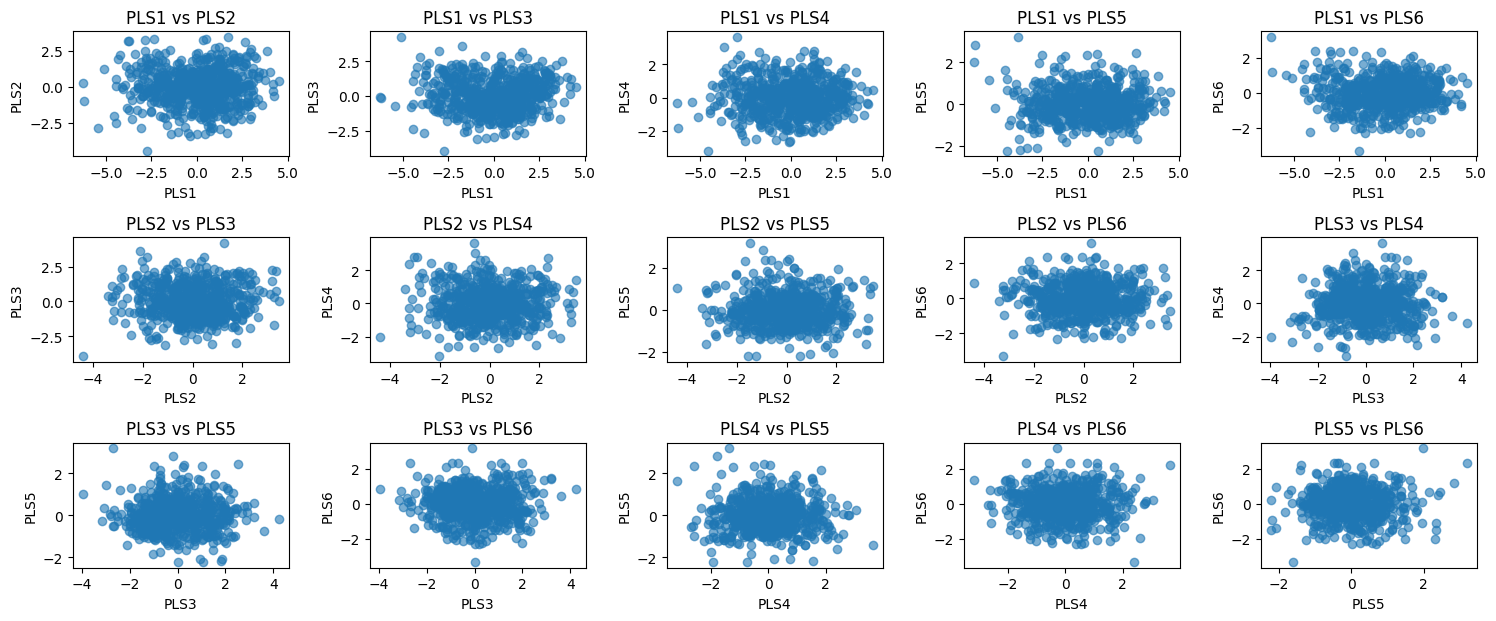

In [ ]:
import matplotlib.pyplot as plt

n_pcs_to_plot = 6

plt.figure(figsize=(15, 10))
pair_index = 1
for i in range(n_pcs_to_plot - 1):
    for j in range(i+1, n_pcs_to_plot):
        plt.subplot(n_pcs_to_plot-1, n_pcs_to_plot-1, pair_index)
        plt.scatter(X_pls[:, i], X_pls[:, j], alpha=0.6)
        plt.xlabel(f'PLS{i+1}')
        plt.ylabel(f'PLS{j+1}')
        plt.title(f'PLS{i+1} vs PLS{j+1}')
        pair_index += 1

plt.tight_layout()
plt.show()


 Tính tỷ lệ phương sai giải thích của từng thành phần

In [ ]:
# Tổng phương sai của dữ liệu gốc X
total_var_X = np.var(X_preprocessed, axis=0).sum()

# Phương sai của từng latent component T (X_pls)
explained_var_pls = np.var(X_pls, axis=0)
explained_var_ratio_pls = explained_var_pls / total_var_X

print("Explained variance của từng PLS component:")
for i, var in enumerate(explained_var_ratio_pls, start=1):
    print(f"PLS{i}: {var:.4f} ({var*100:.2f}%)")


Explained variance của từng PLS component:
PLS1: 0.1819 (18.19%)
PLS2: 0.0858 (8.58%)
PLS3: 0.0752 (7.52%)
PLS4: 0.0552 (5.52%)
PLS5: 0.0307 (3.07%)
PLS6: 0.0399 (3.99%)


Thực hiện việc trực quan hóa mối quan hệ của một số chiều dữ liệu chính với đầu ra để xem xét khả năng có
tương quan tuyến tính.

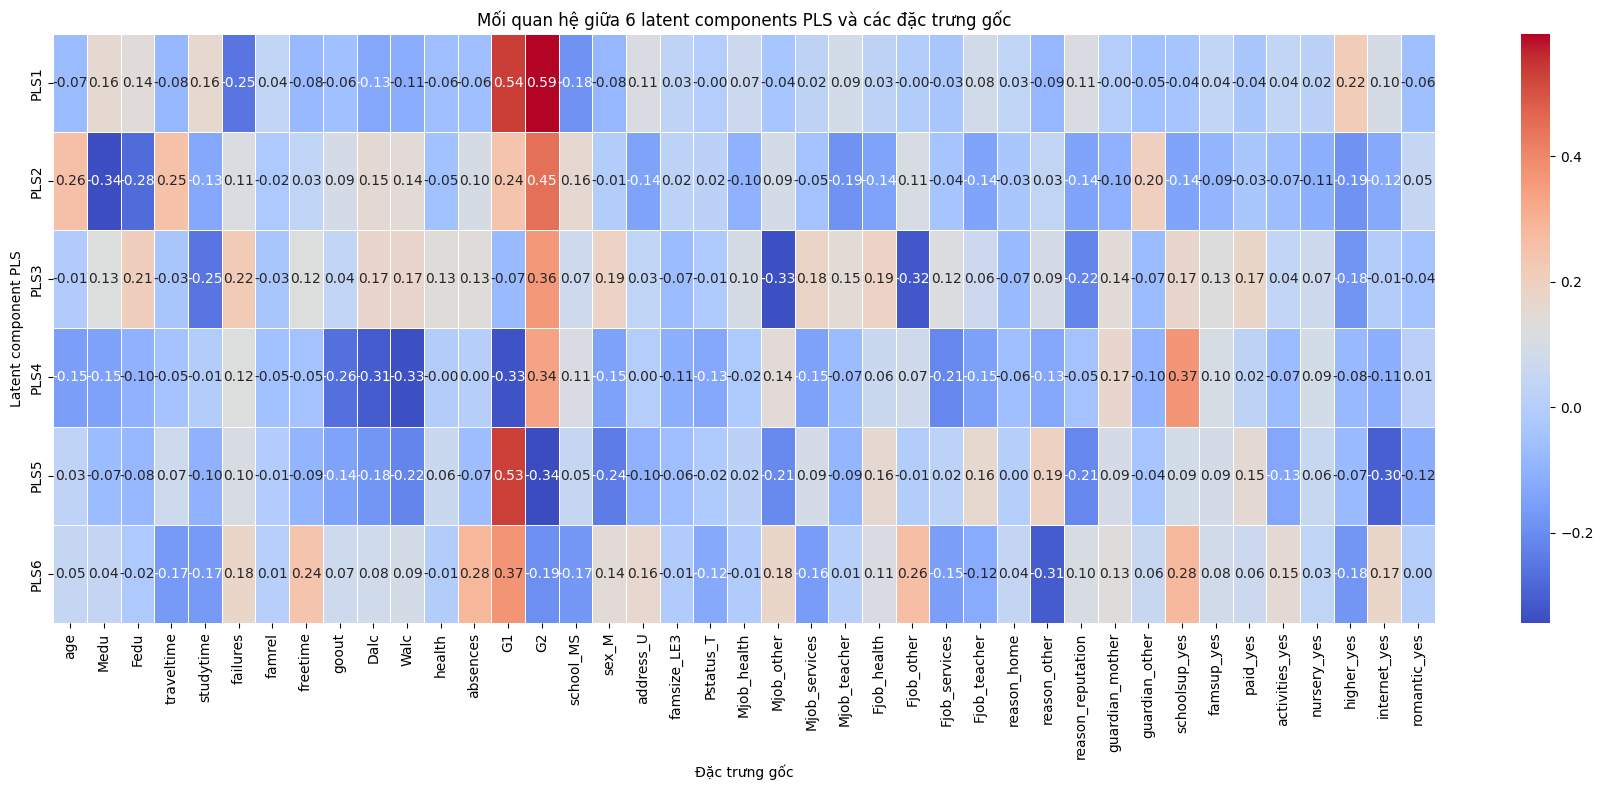

In [ ]:
n_pcs_to_plot = 6

pls_components = pd.DataFrame(
    pls.x_weights_[:, :n_pcs_to_plot],
    index=X_preprocessed.columns,
    columns=[f'PLS{i+1}' for i in range(n_pcs_to_plot)]
)

# heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(pls_components.T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Mối quan hệ giữa {n_pcs_to_plot} latent components PLS và các đặc trưng gốc')
plt.xlabel('Đặc trưng gốc')
plt.ylabel('Latent component PLS')
plt.tight_layout()
plt.show()

**Sau khi giảm chiều mô hình bằng 2 phương pháp, ta có thể rút ra đánh giá:**
- PCA1 và PLS1 đều > 0.3, nó vừa là đặc trưng biến thiên nhiều trong X, vừa có ảnh hưởng đáng kể tới Y.
- G1 và G2 đóng góp tương đối quan trọng vào PC1.
- Khi G1 và G2 tăng, giá trị PC1 cũng tăng (vì trọng số dương).
- Có nhiều đặc trưng khác cũng đóng góp vào PC1, PC1 là tổng hợp các đặc trưng chính, trong đó g1 và g2 là một phần khá đáng kể.

Lưu lại dữ liệu giảm chiều

In [ ]:
import pandas as pd

# Thư mục lưu file
save_dir = '/content/drive/MyDrive/data_project_ml/midterm-finalterm/Data'
print(X_pls.shape)

# Chuyển dữ liệu giảm chiều thành DataFrame
n_pls = X_pls.shape[1]  # số component PCA

df_pls = pd.DataFrame(X_pls[:, :n_pls], columns=[f'PC{i+1}' for i in range(n_pls)])

# Đường dẫn file
file_pls = os.path.join(save_dir, 'X_pls_reduced.csv')
# Lưu CSV
df_pls.to_csv(file_pls, index=False, encoding='utf-8-sig')

print(f"Đã lưu X_pls tại: {file_pls}")

(649, 6)
Đã lưu X_pls tại: /content/drive/MyDrive/data_project_ml/midterm-finalterm/Data/X_pls_reduced.csv


---
---

# **Phần 3.Phân tích hồi quy**

In [ ]:
#Khai báo thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

## **3.1) Phương pháp KNN (K-nearest neighbors)**

Phương pháp KNN (K láng giềng gần nhất) – là một thuật toán học máy phi tham số (non-parametric), dùng để phân loại (classification) và hồi quy (regression).

Ý tưởng:
- Một điểm dữ liệu mới sẽ được dự đoán nhãn hoặc giá trị dựa trên K điểm lân cận gần nhất của nó trong tập huấn luyện.
- KNN không học ra mô hình rõ ràng, mà lưu toàn bộ dữ liệu huấn luyện.
Vì thế, nó còn gọi là thuật toán "lười biếng" (lazy learning).

Ta sẽ dùng KNN để hồi quy dự đoán giá trị điểm G3 của một học sinh mới như sau

**Hàm tổng quát phương pháp KNN cho hồi quy, sử dụng trọng số (weighted)**

In [ ]:
def knn_regression(X_train, y_train, X_test, k=20, weighted=False):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)

    # Hàm tính khoảng cách Euclid
    def distance(array, value):
        array = np.array(array)
        return np.linalg.norm(array - value, ord=2, axis=1)

    y_pred = np.zeros(len(X_test))

    for j in range(len(X_test)):
        distances = distance(X_train, X_test[j])
        # Lấy chỉ số của K điểm gần nhất
        # np.argsort(distances) trả về chỉ số sắp xếp theo khoảng cách tăng dần.
        indexes = np.argsort(distances)[:k]
        # K điểm gần nhất
        y_nearest = y_train[indexes]

        if weighted:
            # Láng giềng gần hơn có trọng số lớn hơn
            weights = 1 / (distances[indexes] + 1e-8)  # tránh chia cho 0
            y_pred[j] = np.average(y_nearest, weights=weights)
        else:
            # Nếu không có trọng số, lấy trung bình các láng giềng
            y_pred[j] = np.mean(y_nearest)

    return y_pred

Lấy dữ liệu đã tiền xử lý nhưng chưa giảm chiều

In [ ]:
# Lấy dữ liệu đã tiền xử lý và chưa giảm chiều
X_preprocessed = df_preprocessed.drop(columns=['G3'], axis = 1)

# Lấy nhãn kết quả G3
y_preprocessed = df_preprocessed['G3'].values

# Chia thành các tỉ lệ
ratios = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

Xây dựng hàm tính ra kết quả dự đoán và tính các chỉ số thống kê, và mô hình có bị overfitting hay không

Overfit là tình trạng xảy ra khi mô hình học quá kỹ dữ liệu huấn luyện, đến mức học cả nhiễu và chi tiết ngẫu nhiên, khiến nó không còn tổng quát hóa được cho dữ liệu mới.
Overfitting được phát hiện bằng cách so sánh độ chính xác / sai số trên tập train và test.

Ý tưởng:
 - Tính sai số (hoặc điểm R²) trên tập train → train_score

 - Tính sai số (hoặc điểm R²) trên tập test → test_score

 - Rồi tính chênh lệch giữa hai giá trị này.

In [ ]:
def evaluate_knn_with_overfit(X, y, ratios, k=30, weighted=True, metric='r2', isDictionary = False, threshold=0.1):
    """
    Đánh giá mô hình KNN trên nhiều tỉ lệ train/test và kiểm tra overfit/underfit.

    Returns:
        DataFrame với các cột:
        ['Train Size', 'Test Size', 'MAE', 'RMSE', 'R² Train', 'R² Test', 'ΔR²', 'Ket_luan']
    """
    results = []

    for (train_size, test_size) in ratios:
        # Chia dữ liệu
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=train_size, test_size=test_size, random_state=42, shuffle=True
        )

        if isDictionary:
          # Dự đoán
          knn = KNeighborsRegressor(n_neighbors=k)
          knn.fit(X_train, y_train)
          y_pred_test = knn.predict(X_test)
          y_pred_train = knn.predict(X_train)
        else:
          # Dự đoán
          y_pred_test = knn_regression(X_train, y_train, X_test, k=k, weighted=weighted)
          y_pred_train = knn_regression(X_train, y_train, X_train, k=k, weighted=weighted)

        # Tính các chỉ số
        mae = mean_absolute_error(y_test, y_pred_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        diff_r2 = r2_train - r2_test

        # Kiểm tra overfit/underfit
        if metric == 'r2':
            if r2_train < 0.5 and r2_test < 0.5:
                ket_luan = "UNDERFITTING"
            elif diff_r2 > threshold:
                ket_luan = "OVERFITTING"
            else:
                ket_luan = "GOOD FIT"
        elif metric == 'rmse':
            diff = rmse - np.sqrt(mean_squared_error(y_train, y_pred_train))
            if diff > threshold * rmse:
                ket_luan = "OVERFITTING"
            else:
                ket_luan = "GOOD FIT"
        elif metric == 'mae':
            diff = mae - mean_absolute_error(y_train, y_pred_train)
            if diff > threshold * mae:
                ket_luan = "OVERFITTING"
            else:
                ket_luan = "GOOD FIT"
        else:
            ket_luan = "METRIC INVALID"

        results.append({
            'Train Size': train_size,
            'Test Size': test_size,
            'MAE': mae,
            'RMSE': rmse,
            'R² Train': r2_train,
            'R² Test': r2_test,
            'ΔR²': diff_r2,
            'Ket_luan': ket_luan
        })

    return pd.DataFrame(results)


**Biện pháp giảm overfitting**

Sử dụng phương pháp cross-validation kiểu k-fold CV để chọn k phù hợp nhất:
- Ý tưởng: Chia dữ liệu train thành k “folds” (ví dụ 5 hoặc 10 folds).
- Với mỗi k trong KNN:

    1) Dùng k-1 fold để train, 1 fold để validate.

    2) Lặp qua tất cả fold → tính trung bình metric (R², RMSE, MAE) trên các fold.
  
    3) Chọn k có R² test trung bình cao nhất hoặc RMSE/MAE thấp nhất.

Sau đó, train lại KNN trên toàn bộ train với k đó và đánh giá trên test set thực sự.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

def cross_val_knn_raw(X, y, k_values, n_splits=5, weighted=True):
    """
    Cross-validation KNN trên dữ liệu chưa giảm chiều (raw features)
    """
    best_k = None
    # best_score: khởi đầu là âm vô cùng để dễ cập nhật R² cao hơn.
    best_score = -np.inf
    # cv_results: lưu kết quả CV của từng k để đưa ra DataFrame.
    cv_results = []

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for k in k_values:
        fold_scores = []

        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            # Dự đoán với KNN
            y_pred = knn_regression(X_train, y_train, X_val, k=k, weighted=weighted)

            # R² fold
            fold_scores.append(r2_score(y_val, y_pred))

        avg_r2 = np.mean(fold_scores)
        cv_results.append({'k': k, 'R² CV': avg_r2})

        if avg_r2 > best_score:
            best_score = avg_r2
            best_k = k

    results_df = pd.DataFrame(cv_results)
    return best_k, results_df


In [ ]:
k_values = list(range(1, 81))
best_k, cv_df = cross_val_knn_raw(X_preprocessed.values, y_preprocessed, k_values, n_splits=5, weighted=True)

print("K tối ưu:", best_k)
print(cv_df)

K tối ưu: 8
     k     R² CV
0    1  0.512688
1    2  0.614627
2    3  0.651954
3    4  0.653377
4    5  0.663782
..  ..       ...
75  76  0.568268
76  77  0.566613
77  78  0.565342
78  79  0.564463
79  80  0.563340

[80 rows x 2 columns]


## a) KNN Hồi quy dựa trên tập dữ liệu gốc

In [ ]:
print(f"K = 30")
df_goc = evaluate_knn_with_overfit(X_preprocessed, y_preprocessed, ratios, k=30, weighted=True, isDictionary=True, metric='r2', threshold=0.1)
print(df_goc)

print("\n=========================================================================\n")
print(f"K tốt nhất")
df_goc = evaluate_knn_with_overfit(X_preprocessed, y_preprocessed, ratios, k=best_k, weighted=True, isDictionary=True, metric='r2', threshold=0.1)
print(df_goc)

K = 30
   Train Size  Test Size       MAE      RMSE  R² Train   R² Test       ΔR²  \
0         0.8        0.2  1.324872  1.861102  0.635808  0.644811 -0.009003   
1         0.7        0.3  1.405299  2.028072  0.620431  0.628050 -0.007619   
2         0.6        0.4  1.367821  1.995954  0.606386  0.618205 -0.011819   

   Ket_luan  
0  GOOD FIT  
1  GOOD FIT  
2  GOOD FIT  


K tốt nhất
   Train Size  Test Size       MAE      RMSE  R² Train   R² Test       ΔR²  \
0         0.8        0.2  1.167308  1.632232  0.721833  0.726799 -0.004966   
1         0.7        0.3  1.262821  1.794757  0.708433  0.708708 -0.000274   
2         0.6        0.4  1.253846  1.796330  0.684868  0.690756 -0.005888   

   Ket_luan  
0  GOOD FIT  
1  GOOD FIT  
2  GOOD FIT  


Nhận xét sau khi áp dụng phương pháp giảm Overfit cross-validation với phương pháp KNN:
- MAE, RMSE đã nhỏ hơn, sai lệch điểm đã giảm
- R² trên tập train, test đã tăng, làm cho ΔR² giảm

## b) KNN Hồi quy trên tập dữ liệu đã giảm chiều

b.1) Dùng PCA

Với dữ liệu giảm chiều, ta dùng trực tiếp thư viện PCA để giảm chiều dữ liệu

In [ ]:
from sklearn.decomposition import PCA
ratios = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

# Hàm giảm chiều dữ liệu
# n_components là số chiều giữ lại để giữ 95% variance
def apply_pca(X, variance_threshold=0.95):
    pca = PCA(n_components=variance_threshold, random_state=42)
    X_pca = pca.fit_transform(X)
    n_comps = pca.n_components_
    print(f"Số chiều giữ lại sau PCA: {n_comps} (giữ ≥ {variance_threshold*100:.1f}% phương sai)")
    return X_pca, n_comps


Giảm chiều dữ liệu và dự đoán

In [ ]:
X_pca, n_comps = apply_pca(X_preprocessed, variance_threshold=0.95)


Số chiều giữ lại sau PCA: 28 (giữ ≥ 95.0% phương sai)


In [ ]:
print("K = 30")
df_pca = evaluate_knn_with_overfit(X_pca, y_preprocessed, ratios, k=30, weighted=True,  isDictionary=True, metric='r2', threshold=0.1)
print(df_pca)

print("\n=========================================================================")

print("\nK tốt nhất")
df_pca = evaluate_knn_with_overfit(X_pca, y_preprocessed, ratios, k=best_k, weighted=True, isDictionary=True, metric='r2', threshold=0.1)
print(df_pca)

K = 30
   Train Size  Test Size       MAE      RMSE  R² Train   R² Test       ΔR²  \
0         0.8        0.2  1.318718  1.860358  0.637609  0.645095 -0.007486   
1         0.7        0.3  1.378291  2.010217  0.624048  0.634570 -0.010522   
2         0.6        0.4  1.359615  1.989933  0.609908  0.620505 -0.010597   

   Ket_luan  
0  GOOD FIT  
1  GOOD FIT  
2  GOOD FIT  


K tốt nhất
   Train Size  Test Size       MAE      RMSE  R² Train   R² Test       ΔR²  \
0         0.8        0.2  1.214423  1.655737  0.710492  0.718873 -0.008381   
1         0.7        0.3  1.306410  1.847078  0.699107  0.691476  0.007631   
2         0.6        0.4  1.272115  1.854892  0.679204  0.670264  0.008940   

   Ket_luan  
0  GOOD FIT  
1  GOOD FIT  
2  GOOD FIT  


b.2) Dùng PLS

In [ ]:
def apply_pls(X, y, variance_threshold=0.95, verbose=True):
    ratios = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]
    n_features = X.shape[1]
    for n_comp in range(1, n_features + 1):
        pls = PLSRegression(n_components=n_comp, scale=False)
        pls.fit(X, y)

        y_var_explained = pls.score(X, y)
        if y_var_explained >= variance_threshold:
            if verbose:
                print(f"Số thành phần PLS giữ ≥{variance_threshold*100:.1f}% phương sai của y: {n_comp}")
            return pls.transform(X), n_comp

    # Nếu không đạt threshold
    pls = PLSRegression(n_components=n_features, scale=False)
    pls.fit(X, y)
    if verbose:
        print(f"Sử dụng tất cả {n_features} thành phần PLS")
    return pls.transform(X), n_features

Giảm chiều dữ liệu và dự đoán

In [ ]:
X_pls, n_comp = apply_pls(X_preprocessed, y_preprocessed, variance_threshold=0.86)

print("\nK = 30")
df_pls = evaluate_knn_with_overfit(X_pls, y_preprocessed, ratios, k=30, weighted=True, isDictionary=True, metric='r2', threshold=0.1)
print(df_pls)
print("\n=========================================================================")
print("\nK tốt nhất")
df_pls = evaluate_knn_with_overfit(X_pls, y_preprocessed, ratios, k=best_k, weighted=True, isDictionary=True, metric='r2', threshold=0.1)
print(df_pls)


Số thành phần PLS giữ ≥86.0% phương sai của y: 20

K = 30
   Train Size  Test Size       MAE      RMSE  R² Train   R² Test       ΔR²  \
0         0.8        0.2  1.047179  1.544801  0.727662  0.755283 -0.027622   
1         0.7        0.3  1.122906  1.692725  0.700425  0.740886 -0.040461   
2         0.6        0.4  1.124103  1.708678  0.696385  0.720199 -0.023814   

   Ket_luan  
0  GOOD FIT  
1  GOOD FIT  
2  GOOD FIT  


K tốt nhất
   Train Size  Test Size       MAE      RMSE  R² Train   R² Test       ΔR²  \
0         0.8        0.2  1.025962  1.456459  0.811643  0.782472  0.029171   
1         0.7        0.3  1.078846  1.523875  0.789236  0.790001 -0.000766   
2         0.6        0.4  1.063462  1.544998  0.786643  0.771237  0.015406   

   Ket_luan  
0  GOOD FIT  
1  GOOD FIT  
2  GOOD FIT  


## c) So sánh và đánh giá

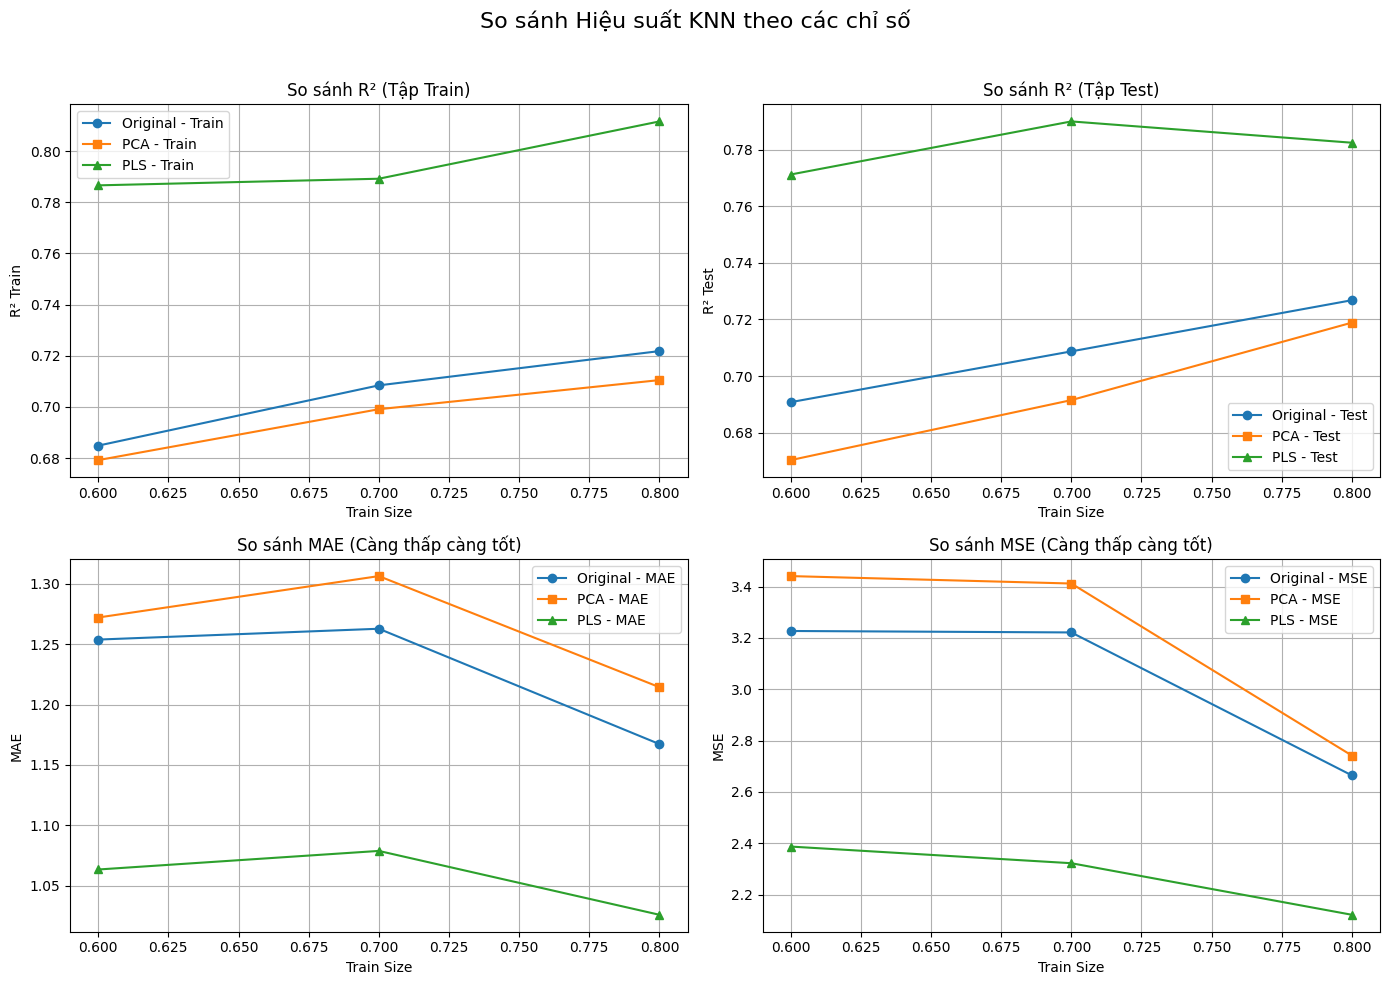

In [ ]:
x = [r[0] for r in ratios]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(x, df_goc['R² Train'], marker='o', label='Original - Train')
axes[0, 0].plot(x, df_pca['R² Train'], marker='s', label='PCA - Train')
axes[0, 0].plot(x, df_pls['R² Train'], marker='^', label='PLS - Train')
axes[0, 0].set_xlabel('Train Size')
axes[0, 0].set_ylabel('R² Train')
axes[0, 0].set_title('So sánh R² (Tập Train)')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(x, df_goc['R² Test'], marker='o', label='Original - Test')
axes[0, 1].plot(x, df_pca['R² Test'], marker='s', label='PCA - Test')
axes[0, 1].plot(x, df_pls['R² Test'], marker='^', label='PLS - Test')
axes[0, 1].set_xlabel('Train Size')
axes[0, 1].set_ylabel('R² Test')
axes[0, 1].set_title('So sánh R² (Tập Test)')
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[1, 0].plot(x, df_goc['MAE'], marker='o', label='Original - MAE')
axes[1, 0].plot(x, df_pca['MAE'], marker='s', label='PCA - MAE')
axes[1, 0].plot(x, df_pls['MAE'], marker='^', label='PLS - MAE')
axes[1, 0].set_xlabel('Train Size')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_title('So sánh MAE (Càng thấp càng tốt)')
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].plot(x, df_goc['RMSE']**2, marker='o', label='Original - MSE')
axes[1, 1].plot(x, df_pca['RMSE']**2, marker='s', label='PCA - MSE')
axes[1, 1].plot(x, df_pls['RMSE']**2, marker='^', label='PLS - MSE')
axes[1, 1].set_xlabel('Train Size')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].set_title('So sánh MSE (Càng thấp càng tốt)')
axes[1, 1].legend()
axes[1, 1].grid(True)

fig.suptitle('So sánh Hiệu suất KNN theo các chỉ số', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Hàm trực quan residuals cho nhiều bộ dữ liệu và tỉ lệ**

- Nhằm đánh giá trực quan mức độ phù hợp và tính ổn định của mô hình KNN, nhóm xây dựng hàm plot_residuals_vs_inputs.
Hàm này huấn luyện mô hình KNN với tham số tối ưu
k=best_k trên các tập dữ liệu gốc, PCA và PLS, sau đó vẽ biểu đồ Residuals vs Input (phần dư so với giá trị đầu vào) cho từng tỉ lệ train/test khác nhau.
- Trục hoành biểu diễn thành phần đầu tiên của dữ liệu đầu vào, trục tung là residuals (y_true − y_pred).
Biểu đồ giúp nhận diện các vấn đề như thiếu tuyến tính, phân bố sai số không ngẫu nhiên, hoặc hiện tượng bias trong vùng giá trị cụ thể của dữ liệu.

In [ ]:


def plot_residuals_vs_inputs(X_list, X_names, y, ratios, k=best_k, weighted=True):
    weight_mode = "distance" if weighted else "uniform"

    # Đảm bảo y là mảng 1 chiều NumPy
    if isinstance(y, pd.Series) or isinstance(y, pd.DataFrame):
        y = y.values.ravel()

    for ratio in ratios:
        train_size = ratio[0]
        fig, axes = plt.subplots(1, len(X_list), figsize=(5 * len(X_list), 4), sharey=True)
        if len(X_list) == 1:
            axes = [axes]

        for i, (X, name) in enumerate(zip(X_list, X_names)):
            # Chuyển sang NumPy nếu là DataFrame
            if isinstance(X, pd.DataFrame):
                X = X.values

            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

            model = KNeighborsRegressor(n_neighbors=best_k, weights=weight_mode)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            residuals = y_test - y_pred

            # Vẽ residuals theo thành phần đầu tiên
            x_plot = X_test[:, 0] if X_test.ndim > 1 else X_test
            xlabel = "Thành phần đầu tiên" if X_test.ndim > 1 else "X"

            axes[i].scatter(x_plot, residuals, alpha=0.6)
            axes[i].axhline(0, color='r', linestyle='--', linewidth=1)
            axes[i].set_xlabel(xlabel)
            axes[i].set_ylabel("Residuals (y_true - y_pred)")
            axes[i].set_title(f"{name} | Train={int(train_size*100)}%")

        fig.suptitle(f"Residuals vs Input | Train={int(train_size*100)}% | K={k} | weights={weight_mode}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


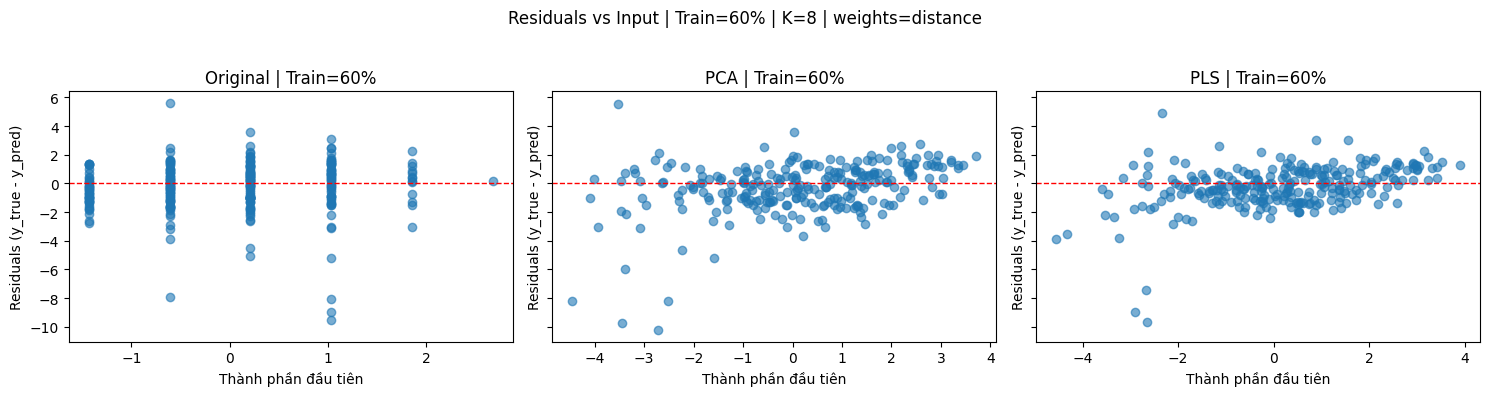

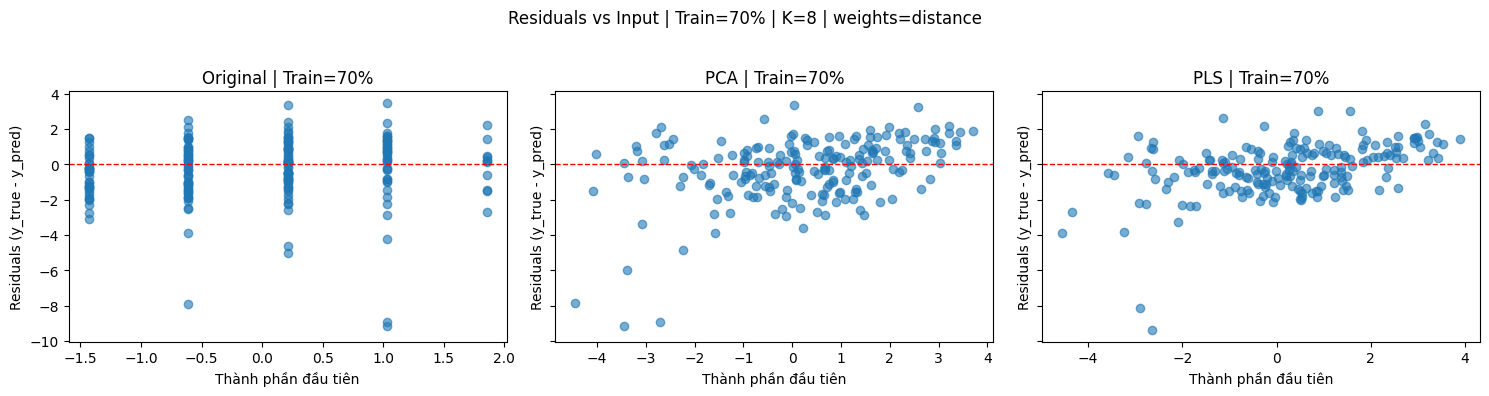

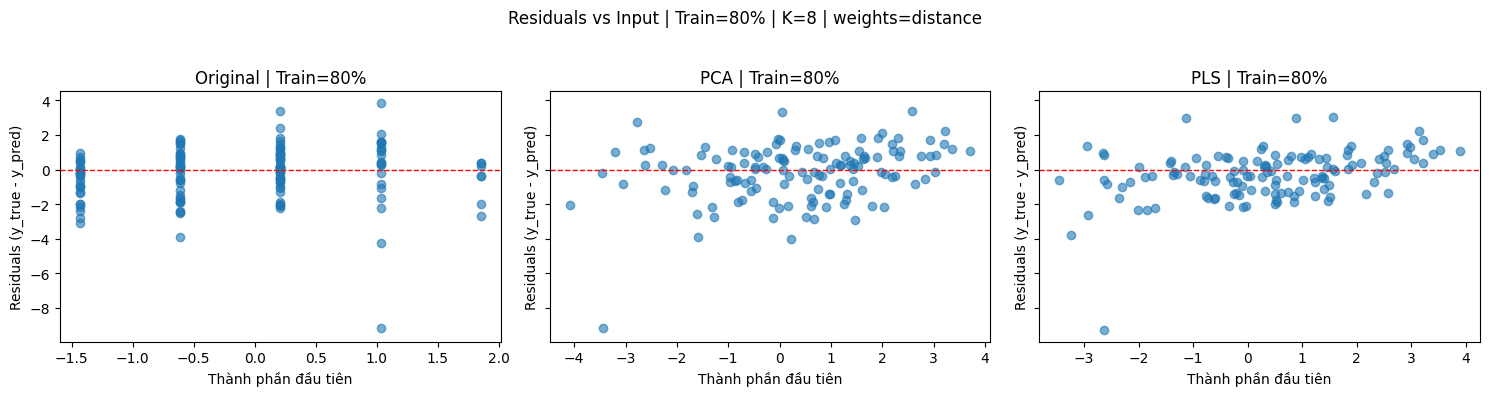

In [ ]:
X_list = [X_preprocessed, X_pca, X_pls]
X_names = ["Original", "PCA", "PLS"]
ratios = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]
plot_residuals_vs_inputs(X_list, X_names, y_preprocessed, ratios, k=best_k, weighted=True)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ratios_label_knn = [
    f"{int(r*10)}:{int(t*10)}"
    for r, t in zip(df_goc['Train Size'], df_goc['Test Size'])
]

x = np.arange(len(ratios_label_knn))
width = 0.25


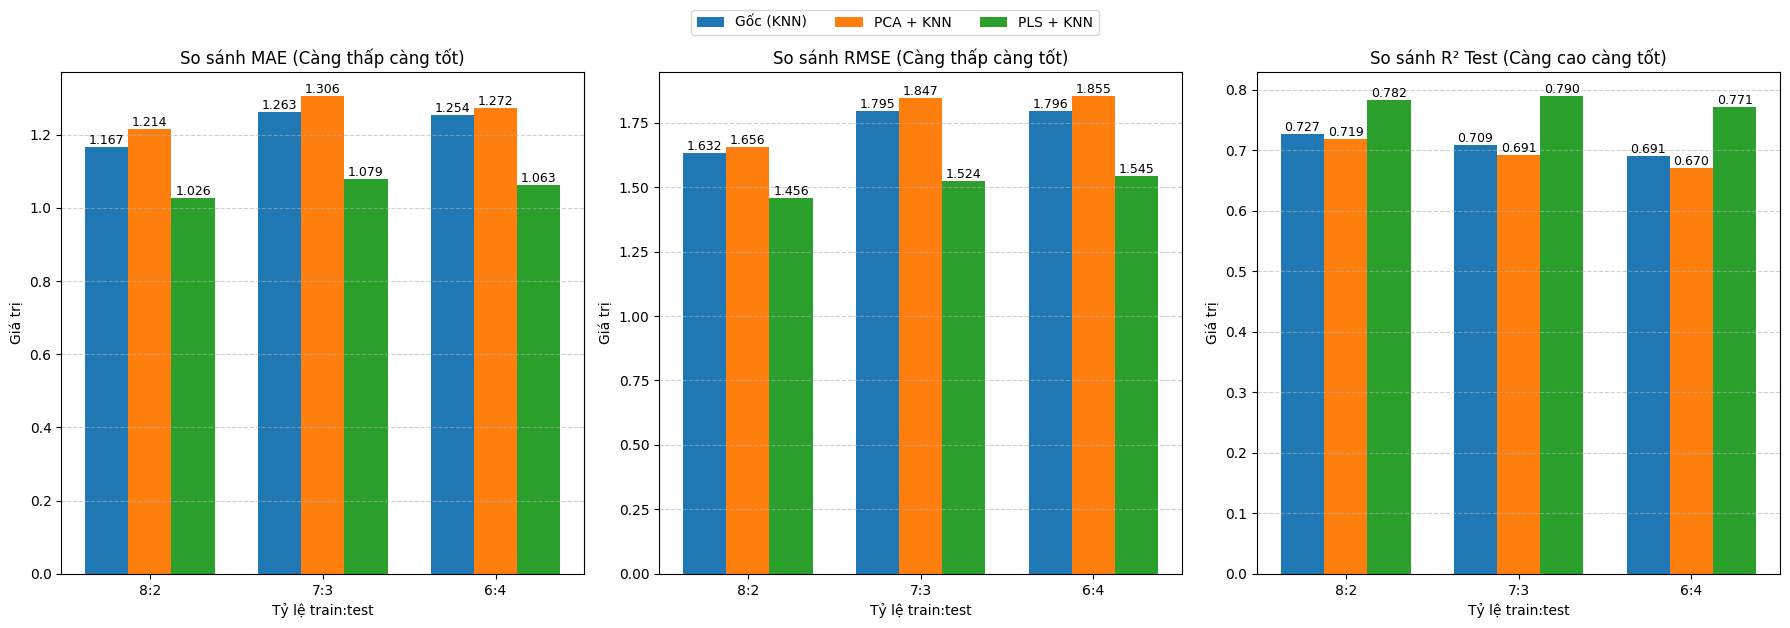

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(x - width, df_goc['MAE'], width, label='Gốc (KNN)')
axes[0].bar(x, df_pca['MAE'], width, label='PCA + KNN')
axes[0].bar(x + width, df_pls['MAE'], width, label='PLS + KNN')

axes[0].set_title('So sánh MAE (Càng thấp càng tốt)')
axes[0].set_ylabel('Giá trị')
axes[0].set_xticks(x)
axes[0].set_xticklabels(ratios_label_knn)
axes[0].set_xlabel('Tỷ lệ train:test')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

for i in range(len(x)):
    axes[0].text(x[i]-width, df_goc['MAE'][i], f"{df_goc['MAE'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[0].text(x[i], df_pca['MAE'][i], f"{df_pca['MAE'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[0].text(x[i]+width, df_pls['MAE'][i], f"{df_pls['MAE'][i]:.3f}", ha='center', va='bottom', fontsize=9)


axes[1].bar(x - width, df_goc['RMSE'], width)
axes[1].bar(x, df_pca['RMSE'], width)
axes[1].bar(x + width, df_pls['RMSE'], width)

axes[1].set_title('So sánh RMSE (Càng thấp càng tốt)')
axes[1].set_ylabel('Giá trị')
axes[1].set_xticks(x)
axes[1].set_xticklabels(ratios_label_knn)
axes[1].set_xlabel('Tỷ lệ train:test')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

for i in range(len(x)):
    axes[1].text(x[i]-width, df_goc['RMSE'][i], f"{df_goc['RMSE'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[1].text(x[i], df_pca['RMSE'][i], f"{df_pca['RMSE'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[1].text(x[i]+width, df_pls['RMSE'][i], f"{df_pls['RMSE'][i]:.3f}", ha='center', va='bottom', fontsize=9)

axes[2].bar(x - width, df_goc['R² Test'], width)
axes[2].bar(x, df_pca['R² Test'], width)
axes[2].bar(x + width, df_pls['R² Test'], width)

axes[2].set_title('So sánh R² Test (Càng cao càng tốt)')
axes[2].set_ylabel('Giá trị')
axes[2].set_xticks(x)
axes[2].set_xticklabels(ratios_label_knn)
axes[2].set_xlabel('Tỷ lệ train:test')
axes[2].grid(axis='y', linestyle='--', alpha=0.6)

for i in range(len(x)):
    axes[2].text(x[i]-width, df_goc['R² Test'][i], f"{df_goc['R² Test'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[2].text(x[i], df_pca['R² Test'][i], f"{df_pca['R² Test'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[2].text(x[i]+width, df_pls['R² Test'][i], f"{df_pls['R² Test'][i]:.3f}", ha='center', va='bottom', fontsize=9)


fig.legend(
    ['Gốc (KNN)', 'PCA + KNN', 'PLS + KNN'],
    loc='upper center',
    ncol=3,
    bbox_to_anchor=(0.5, 1.05)
)

plt.tight_layout()
plt.show()


## **3.2) Phương pháp Linear Regression**

In [ ]:
#Khai báo thư viện
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

# Thư viện
from sklearn.linear_model import LinearRegression

### **Mô hình tổng quát**

Giả sử bạn có  n mẫu, mỗi mẫu có  p đặc trưng (features):
- Đầu vào: X
- Đầu ra: Y
$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1p} \\
x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix},
\quad
y =
\begin{bmatrix}
y_1 \\[4pt]
y_2 \\[4pt]
\vdots \\[4pt]
y_n
\end{bmatrix}
$$

---

1) Mô hình hồi quy tuyến tính có dạng:
$$
\hat{y}_i = w_0 + w_1x_{i1} + w_2x_{i2} + \dots + w_px_{ip}
$$

Trong đó:

- $ \hat{y}_i $: giá trị **dự đoán** cho mẫu thứ $ i $
- $ w_0 $: **hệ số chặn (intercept)** – giá trị dự đoán khi tất cả đặc trưng bằng 0  
- $ w_j $: **trọng số (weight)** của đặc trưng thứ $ j $
- $ x_{ij} $: **giá trị** của đặc trưng thứ $ j $ trong mẫu $ i $
- $ p $: **số lượng đặc trưng (features)** trong dữ liệu

---

2) Ý tưởng cốt lõi:

Mô hình sẽ **tìm các hệ số** $ w_0, w_1, ..., w_p $ sao cho **sai số giữa giá trị thực và giá trị dự đoán nhỏ nhất**.

Sai số được đo bằng **hàm mất mát (Loss function)** – cụ thể là **Mean Squared Error (MSE)**:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Trong đó:

- $ y_i $: giá trị **thực tế** của mẫu thứ $ i $
- $ \hat{y}_i $: giá trị **dự đoán** của mô hình cho mẫu thứ $ i $
- $ n $: **số lượng mẫu (samples)** trong tập dữ liệu

Tìm bộ hệ số $ w_0, w_1, ..., w_p $ sao cho:

$$
\min_{w_0, w_1, ..., w_p} \ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**Ý nghĩa:**  
- Mô hình cố gắng làm cho **độ lệch giữa giá trị thật và dự đoán nhỏ nhất có thể**.  
- Khi **MSE càng nhỏ**, mô hình hồi quy tuyến tính càng **phù hợp** với dữ liệu.



Hàm đánh giá mô hình

In [ ]:
def evaluate_linear_regression(X, y, ratios, metric='r2', threshold=0.1):
    """
    Đánh giá mô hình Linear Regression trên nhiều tỉ lệ train/test
    và kiểm tra overfit/underfit.

    Args:
        X: ma trận đặc trưng
        y: vector target
        ratios: danh sách tuple (train_size, test_size)
        metric: 'r2', 'rmse', hoặc 'mae'
        threshold: ngưỡng để đánh giá overfitting
    Returns:
        DataFrame với các cột:
        ['Train Size', 'Test Size', 'MAE', 'RMSE', 'R² Train', 'R² Test', 'ΔR²', 'Ket_luan']
    """
    results = []

    for (train_size, test_size) in ratios:
        # Chia dữ liệu
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=train_size, test_size=test_size, random_state=42, shuffle=True
        )

        # Khởi tạo và train mô hình
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Dự đoán
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Tính các chỉ số
        mae = mean_absolute_error(y_test, y_pred_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        diff_r2 = r2_train - r2_test

        # Kiểm tra overfit/underfit
        if metric == 'r2':
            if r2_train < 0.5 and r2_test < 0.5:
                ket_luan = "UNDERFITTING"
            elif diff_r2 > threshold:
                ket_luan = "OVERFITTING"
            else:
                ket_luan = "GOOD FIT"
        elif metric == 'rmse':
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            if (rmse - rmse_train) > threshold * rmse:
                ket_luan = "OVERFITTING"
            else:
                ket_luan = "GOOD FIT"
        elif metric == 'mae':
            mae_train = mean_absolute_error(y_train, y_pred_train)
            if (mae - mae_train) > threshold * mae:
                ket_luan = "OVERFITTING"
            else:
                ket_luan = "GOOD FIT"
        else:
            ket_luan = "METRIC INVALID"

        results.append({
            'Train Size': train_size,
            'Test Size': test_size,
            'MAE': mae,
            'RMSE': rmse,
            'R² Train': r2_train,
            'R² Test': r2_test,
            'ΔR²': diff_r2,
            'Ket_luan': ket_luan
        })

    return pd.DataFrame(results)

## a) Hồi quy với dữ liệu gốc

In [ ]:
df_goc = evaluate_linear_regression(X_preprocessed, y_preprocessed, ratios, metric='r2', threshold=0.1)
print(df_goc)

   Train Size  Test Size       MAE      RMSE  R² Train   R² Test       ΔR²  \
0         0.6        0.4  0.898182  1.360615  0.862220  0.822581  0.039638   
1         0.7        0.3  0.795923  1.202654  0.848745  0.869203 -0.020457   
2         0.8        0.2  0.765060  1.214870  0.858337  0.848651  0.009686   

   Ket_luan  
0  GOOD FIT  
1  GOOD FIT  
2  GOOD FIT  


## b) Hồi quy với dữ liệu giảm chiều

b.1) Dùng PCA

In [ ]:
from sklearn.decomposition import PCA

# Hàm giảm chiều dữ liệu
# n_components là số chiều giữ lại để giữ 95% variance
def apply_pca(X, variance_threshold=0.95):
    pca = PCA(n_components=variance_threshold, random_state=42)
    X_pca = pca.fit_transform(X)
    n_comps = pca.n_components_
    print(f"Số chiều giữ lại sau PCA: {n_comps} (giữ ≥ {variance_threshold*100:.1f}% phương sai)")
    return X_pca, n_comps

Giảm chiều dữ liệu dùng PCA

In [ ]:
X_pca, n_comps = apply_pca(X_preprocessed, variance_threshold=0.95)
df_pca = evaluate_linear_regression(X_pca, y_preprocessed, ratios, metric='r2', threshold=0.1)
print(df_pca)

Số chiều giữ lại sau PCA: 28 (giữ ≥ 95.0% phương sai)
   Train Size  Test Size       MAE      RMSE  R² Train   R² Test       ΔR²  \
0         0.6        0.4  0.967440  1.454985  0.849392  0.797117  0.052276   
1         0.7        0.3  0.881986  1.315836  0.831552  0.843425 -0.011874   
2         0.8        0.2  0.836825  1.289070  0.837835  0.829599  0.008236   

   Ket_luan  
0  GOOD FIT  
1  GOOD FIT  
2  GOOD FIT  


b.2) Dùng PLS

In [ ]:
def apply_pls(X, y, variance_threshold=0.95, verbose=True):
    n_features = X.shape[1]
    for n_comp in range(1, n_features + 1):
        pls = PLSRegression(n_components=n_comp, scale=False)
        pls.fit(X, y)

        y_var_explained = pls.score(X, y)
        if y_var_explained >= variance_threshold:
            if verbose:
                print(f"Số thành phần PLS giữ ≥{variance_threshold*100:.1f}% phương sai của y: {n_comp}")
            return pls.transform(X), n_comp

    # Nếu không đạt threshold
    pls = PLSRegression(n_components=n_features, scale=False)
    pls.fit(X, y)
    if verbose:
        print(f"Sử dụng tất cả {n_features} thành phần PLS")
    return pls.transform(X), n_features


Giảm chiều dữ liệu dùng PLS

In [ ]:
X_pls, n_comp = apply_pls(X_preprocessed, y_preprocessed, variance_threshold=0.86)
df_pls = evaluate_linear_regression(X_pls, y_preprocessed, ratios, metric='r2', threshold=0.1)
print(df_pls)


Số thành phần PLS giữ ≥86.0% phương sai của y: 20
   Train Size  Test Size       MAE      RMSE  R² Train   R² Test       ΔR²  \
0         0.6        0.4  0.824033  1.252309  0.856449  0.849702  0.006747   
1         0.7        0.3  0.762673  1.148719  0.846598  0.880671 -0.034073   
2         0.8        0.2  0.734960  1.169661  0.857266  0.859706 -0.002440   

   Ket_luan  
0  GOOD FIT  
1  GOOD FIT  
2  GOOD FIT  


## c) So sánh và đánh giá

In [ ]:
def plot_model_performance(df_goc, df_pca, df_pls, ratios, model_name="Linear Regression"):
    """
    Vẽ biểu đồ so sánh hiệu suất mô hình (MAE, MSE, R² Train/Test)
    trên 3 dạng dữ liệu: Gốc, PCA, PLS theo các tỉ lệ Train/Test.

    Args:
        df_goc, df_pca, df_pls: DataFrame kết quả đánh giá mô hình
        ratios: danh sách tỉ lệ train/test [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]
        model_name: tên mô hình (hiển thị trong tiêu đề biểu đồ)
    """
    x = [r[0] for r in ratios]  # train sizes

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"So sánh Hiệu suất {model_name} theo các chỉ số và tỉ lệ Train/Test", fontsize=16)

    # --- 1. R² Train ---
    axes[0, 0].plot(x, df_goc['R² Train'], marker='o', label='Original - Train')
    axes[0, 0].plot(x, df_pca['R² Train'], marker='s', label='PCA - Train')
    axes[0, 0].plot(x, df_pls['R² Train'], marker='^', label='PLS - Train')
    axes[0, 0].set_title('R² (Tập Train)')
    axes[0, 0].set_xlabel('Train Size')
    axes[0, 0].set_ylabel('R² Train')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # --- 2. R² Test ---
    axes[0, 1].plot(x, df_goc['R² Test'], marker='o', label='Original - Test')
    axes[0, 1].plot(x, df_pca['R² Test'], marker='s', label='PCA - Test')
    axes[0, 1].plot(x, df_pls['R² Test'], marker='^', label='PLS - Test')
    axes[0, 1].set_title('R² (Tập Test)')
    axes[0, 1].set_xlabel('Train Size')
    axes[0, 1].set_ylabel('R² Test')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # --- 3. MAE ---
    axes[1, 0].plot(x, df_goc['MAE'], marker='o', label='Original - MAE')
    axes[1, 0].plot(x, df_pca['MAE'], marker='s', label='PCA - MAE')
    axes[1, 0].plot(x, df_pls['MAE'], marker='^', label='PLS - MAE')
    axes[1, 0].set_title('MAE (Càng thấp càng tốt)')
    axes[1, 0].set_xlabel('Train Size')
    axes[1, 0].set_ylabel('MAE')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # --- 4. MSE ---
    axes[1, 1].plot(x, df_goc['RMSE']**2, marker='o', label='Original - MSE')
    axes[1, 1].plot(x, df_pca['RMSE']**2, marker='s', label='PCA - MSE')
    axes[1, 1].plot(x, df_pls['RMSE']**2, marker='^', label='PLS - MSE')
    axes[1, 1].set_title('MSE (Càng thấp càng tốt)')
    axes[1, 1].set_xlabel('Train Size')
    axes[1, 1].set_ylabel('MSE')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


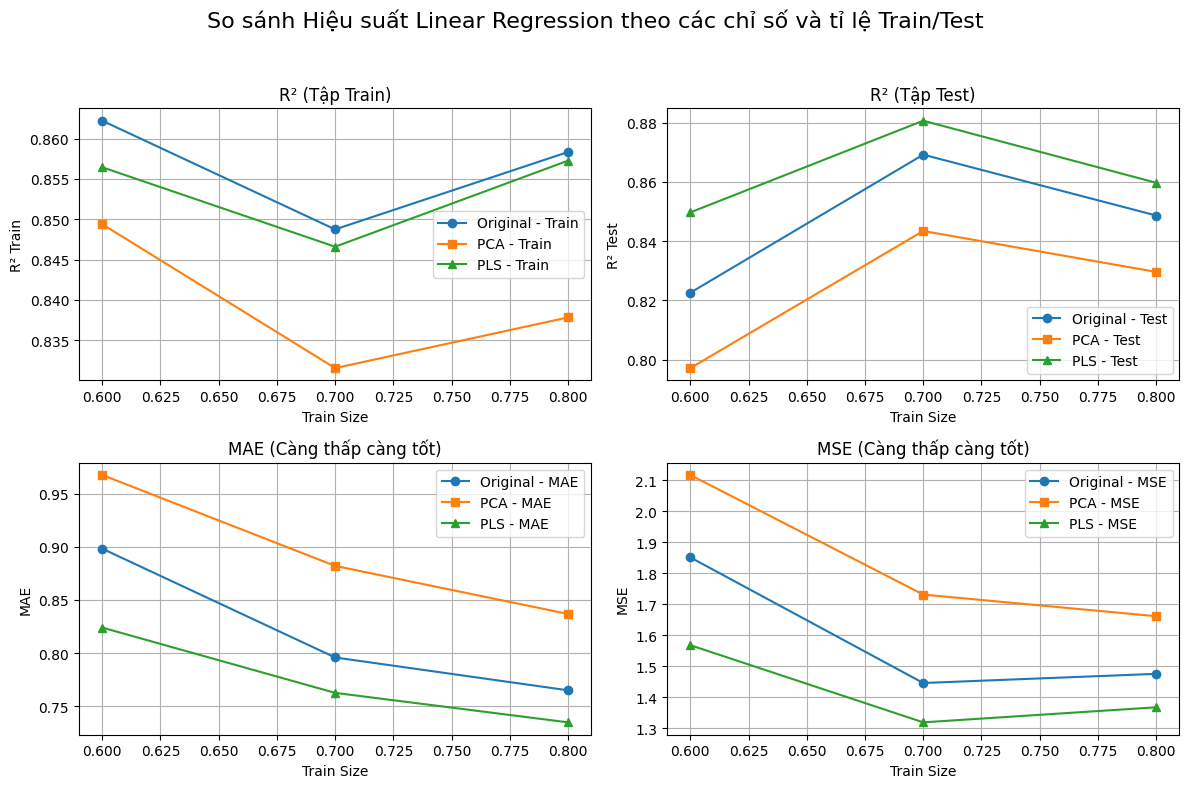

In [ ]:
plot_model_performance(df_goc, df_pca, df_pls, ratios, model_name="Linear Regression")


**Hàm trực quan residuals cho nhiều bộ dữ liệu và tỉ lệ**

Hàm này có điểm khác với bản KNN:

Thay y_pred_test = knn_regression(...) bằng:
- model = LinearRegression()
- model.fit(X_train, y_train)
- y_pred_test = model.predict(X_test)


Các residuals vẫn tính như trước: residuals = y_test - y_pred_test

In [ ]:
def plot_residuals_vs_pred_lr(X_list, X_names, y, ratios):
    """
    Vẽ biểu đồ Residuals vs Predicted cho nhiều bộ dữ liệu và nhiều tỉ lệ train/test
    sử dụng Linear Regression.

    Args:
        X_list: list các bộ dữ liệu (gốc, PCA, PLS)
        X_names: list tên tương ứng ['Original', 'PCA', 'PLS']
        y: nhãn thực tế
        ratios: list tỉ lệ train/test [(0.8,0.2),(0.7,0.3),(0.6,0.4)]
    """
    n_datasets = len(X_list)
    n_ratios = len(ratios)

    fig, axes = plt.subplots(n_datasets, n_ratios, figsize=(6*n_ratios, 4*n_datasets), squeeze=False)

    for i, (X, name) in enumerate(zip(X_list, X_names)):
        for j, (train_size, test_size) in enumerate(ratios):
            # Chia dữ liệu
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, train_size=train_size, test_size=test_size, random_state=42, shuffle=True
            )

            # Khởi tạo và train Linear Regression
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred_test = model.predict(X_test)

            # Residuals
            residuals = y_test - y_pred_test

            # Vẽ
            ax = axes[i,j]
            ax.scatter(y_pred_test, residuals, alpha=0.6)
            ax.axhline(0, color='red', linestyle='--')
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Residuals')
            ax.set_title(f'{name} | Train/Test: {train_size:.1f}/{test_size:.1f}')

    plt.tight_layout()
    plt.show()

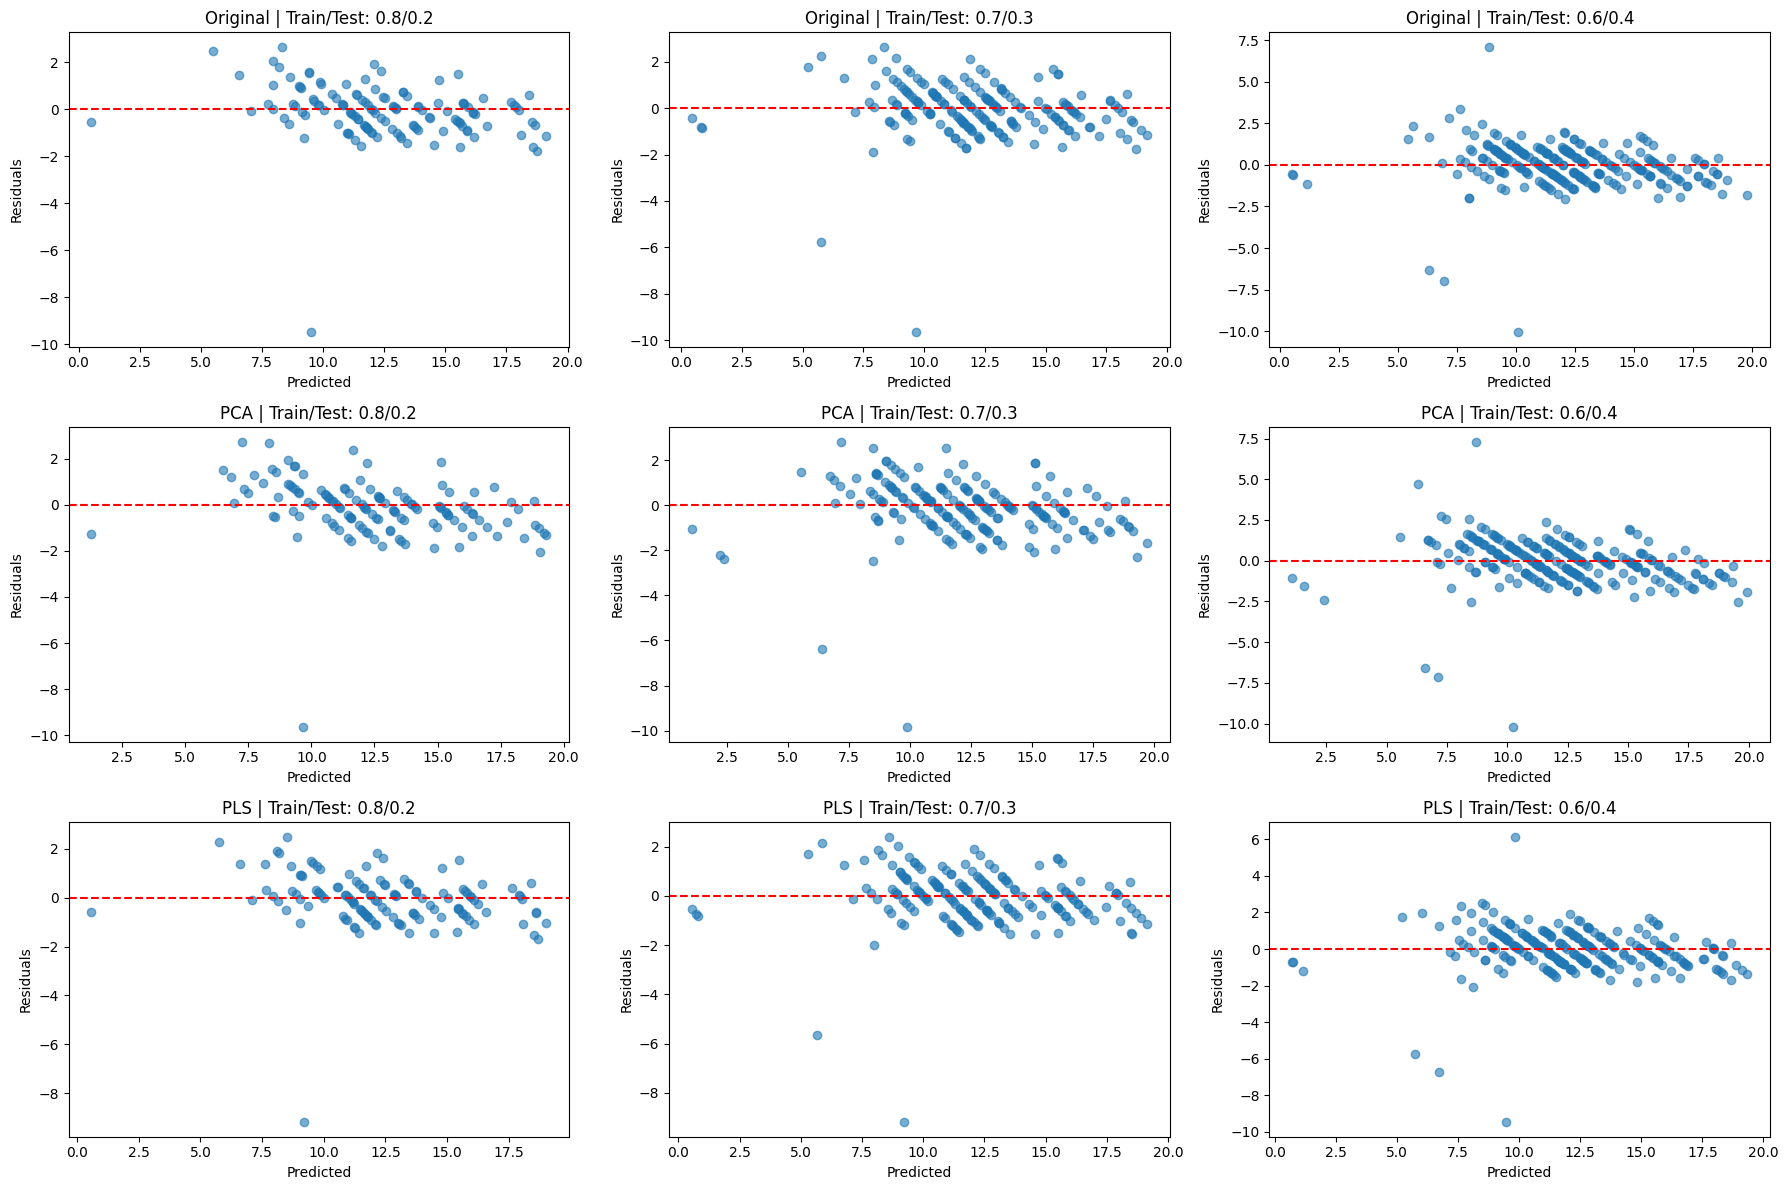

In [ ]:
X_list = [X_preprocessed, X_pca, X_pls]
X_names = ['Original', 'PCA', 'PLS']
ratios = [(0.8,0.2),(0.7,0.3),(0.6,0.4)]
plot_residuals_vs_pred_lr(X_list, X_names, y_preprocessed, ratios)

In [ ]:
ratios_label_lgt = [
    f"{int(r*10)}:{int(t*10)}"
    for r, t in zip(df_goc['Train Size'], df_goc['Test Size'])
]

x = np.arange(len(ratios_label_lgt))
width = 0.25


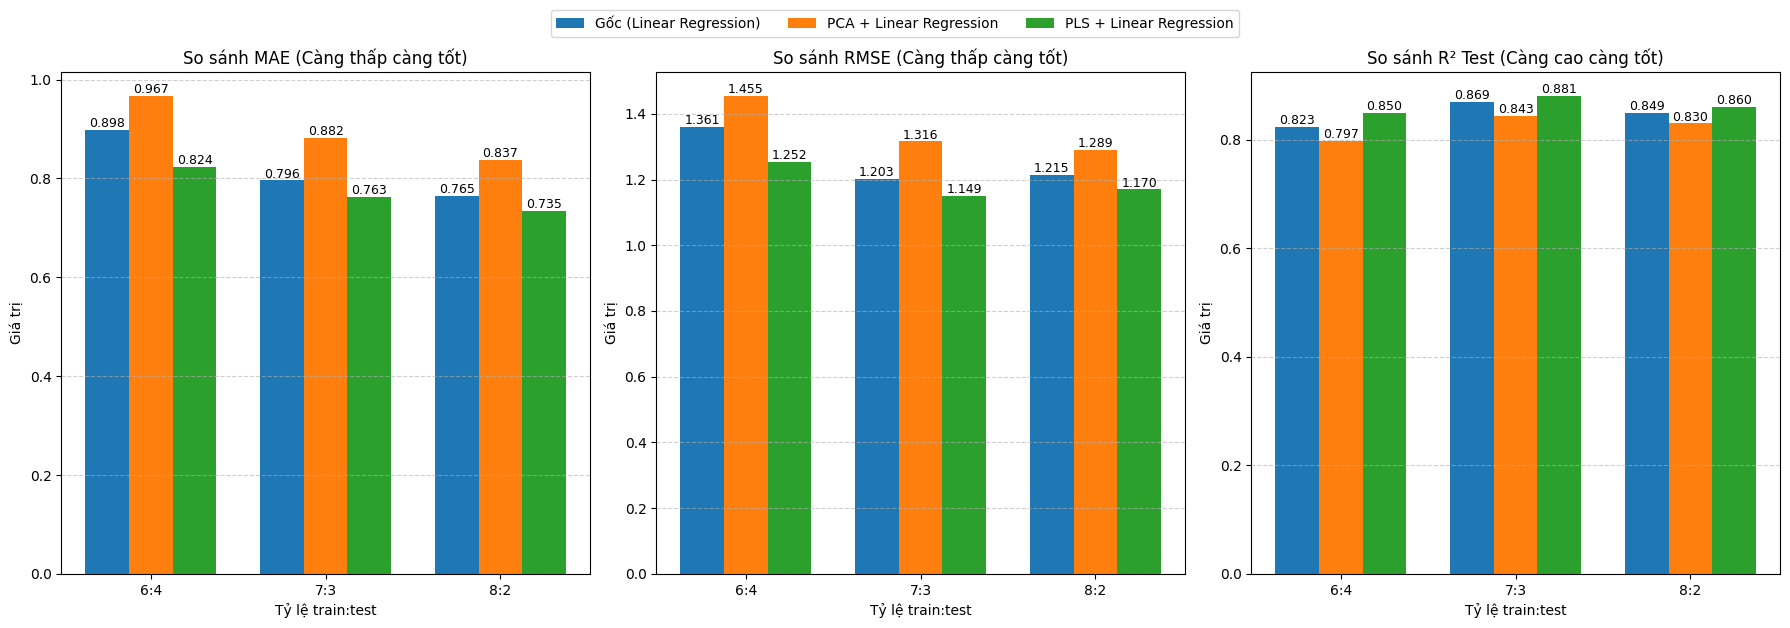

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ================= MAE =================
axes[0].bar(x - width, df_goc['MAE'], width, label='Gốc (Linear Regression)')
axes[0].bar(x, df_pca['MAE'], width, label='PCA + Linear Regression')
axes[0].bar(x + width, df_pls['MAE'], width, label='PLS + Linear Regression')

axes[0].set_title('So sánh MAE (Càng thấp càng tốt)')
axes[0].set_ylabel('Giá trị')
axes[0].set_xlabel('Tỷ lệ train:test')
axes[0].set_xticks(x)
axes[0].set_xticklabels(ratios_label_lgt)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

for i in range(len(x)):
    axes[0].text(x[i]-width, df_goc['MAE'][i], f"{df_goc['MAE'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[0].text(x[i], df_pca['MAE'][i], f"{df_pca['MAE'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[0].text(x[i]+width, df_pls['MAE'][i], f"{df_pls['MAE'][i]:.3f}", ha='center', va='bottom', fontsize=9)


# ================= RMSE =================
axes[1].bar(x - width, df_goc['RMSE'], width)
axes[1].bar(x, df_pca['RMSE'], width)
axes[1].bar(x + width, df_pls['RMSE'], width)

axes[1].set_title('So sánh RMSE (Càng thấp càng tốt)')
axes[1].set_ylabel('Giá trị')
axes[1].set_xlabel('Tỷ lệ train:test')
axes[1].set_xticks(x)
axes[1].set_xticklabels(ratios_label_lgt)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

for i in range(len(x)):
    axes[1].text(x[i]-width, df_goc['RMSE'][i], f"{df_goc['RMSE'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[1].text(x[i], df_pca['RMSE'][i], f"{df_pca['RMSE'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[1].text(x[i]+width, df_pls['RMSE'][i], f"{df_pls['RMSE'][i]:.3f}", ha='center', va='bottom', fontsize=9)


# ================= R² Test =================
axes[2].bar(x - width, df_goc['R² Test'], width)
axes[2].bar(x, df_pca['R² Test'], width)
axes[2].bar(x + width, df_pls['R² Test'], width)

axes[2].set_title('So sánh R² Test (Càng cao càng tốt)')
axes[2].set_ylabel('Giá trị')
axes[2].set_xlabel('Tỷ lệ train:test')
axes[2].set_xticks(x)
axes[2].set_xticklabels(ratios_label_lgt)
axes[2].grid(axis='y', linestyle='--', alpha=0.6)

for i in range(len(x)):
    axes[2].text(x[i]-width, df_goc['R² Test'][i], f"{df_goc['R² Test'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[2].text(x[i], df_pca['R² Test'][i], f"{df_pca['R² Test'][i]:.3f}", ha='center', va='bottom', fontsize=9)
    axes[2].text(x[i]+width, df_pls['R² Test'][i], f"{df_pls['R² Test'][i]:.3f}", ha='center', va='bottom', fontsize=9)

fig.legend(
    ['Gốc (Linear Regression)', 'PCA + Linear Regression', 'PLS + Linear Regression'],
    loc='upper center',
    ncol=3,
    bbox_to_anchor=(0.5, 1.05)
)

plt.tight_layout()
plt.show()

---
---

# **Phần 4: Phân cụm dữ liệu**

Bỏ trường đầu ra y

In [ ]:
# Dữ liệu đã tiền xử lý
df_preprocessed = pd.read_csv("/content/drive/MyDrive/data_project_ml/midterm-finalterm/Data/student_por_preprocessed.csv")

# Bỏ trường đầu ra y
X_scaled = df_preprocessed.drop(columns=['G3'], axis = 1)
y_scaled = df_preprocessed['G3'].values

**Thực hiện phân cụm bằng 3 phương pháp: K-means, GMM, DBScan**

**1) K-means clustering**

1.1) Tìm số cụm K tối ưu

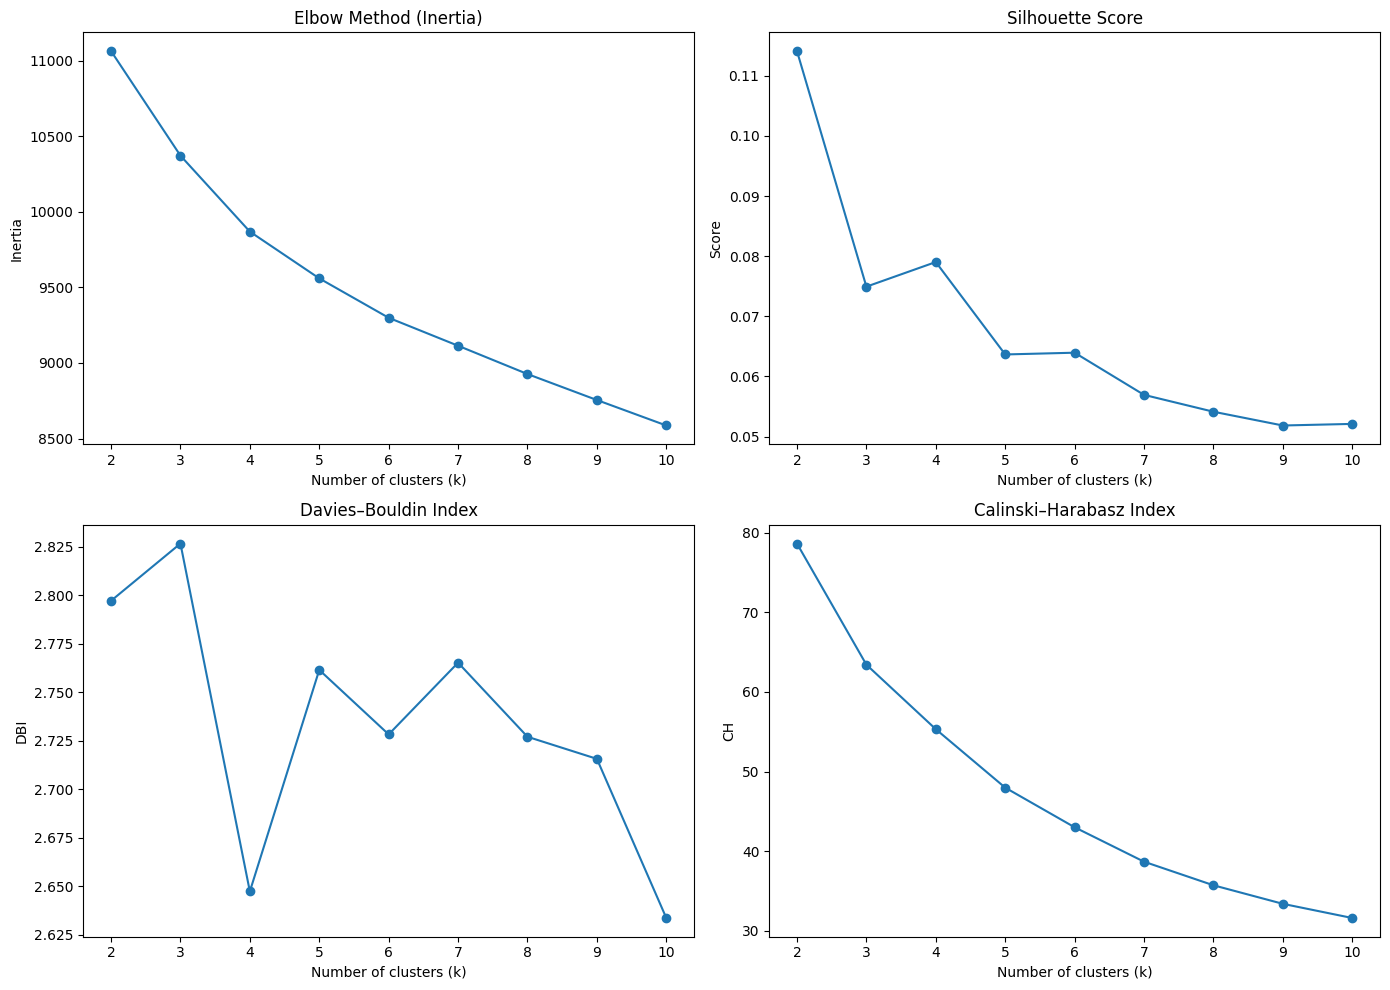

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

k_range = range(2, 11)

inertias = []
silhouettes = []
dbi_scores = []
ch_scores = []

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )

    labels = kmeans.fit_predict(X_scaled)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))
    dbi_scores.append(davies_bouldin_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))

results = pd.DataFrame({
    "k": list(k_range),
    "Inertia": inertias,
    "Silhouette": silhouettes,
    "DBI": dbi_scores,
    "CH": ch_scores
})

results

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Elbow - Inertia
axes[0, 0].plot(k_range, inertias, marker='o')
axes[0, 0].set_title("Elbow Method (Inertia)")
axes[0, 0].set_xlabel("Number of clusters (k)")
axes[0, 0].set_ylabel("Inertia")

# Silhouette Score
axes[0, 1].plot(k_range, silhouettes, marker='o')
axes[0, 1].set_title("Silhouette Score")
axes[0, 1].set_xlabel("Number of clusters (k)")
axes[0, 1].set_ylabel("Score")

# Davies–Bouldin Index
axes[1, 0].plot(k_range, dbi_scores, marker='o')
axes[1, 0].set_title("Davies–Bouldin Index")
axes[1, 0].set_xlabel("Number of clusters (k)")
axes[1, 0].set_ylabel("DBI")

# Calinski–Harabasz Index
axes[1, 1].plot(k_range, ch_scores, marker='o')
axes[1, 1].set_title("Calinski–Harabasz Index")
axes[1, 1].set_xlabel("Number of clusters (k)")
axes[1, 1].set_ylabel("CH")

plt.tight_layout()
plt.show()

- Theo phương pháp Elbow, tại k = 4 tốc độ giảm của Inertia bắt đầu chậm lại rõ rệt, cho thấy việc tăng số cụm sau giá trị này chỉ mang lại cải thiện không đáng kể về độ gắn kết nội cụm.

- Davies–Bouldin Index đạt giá trị thấp nhất tại k = 4, phản ánh mức độ phân tách giữa các cụm là tốt nhất so với các giá trị k khác.

- Silhouette Score tại k = 4 đạt giá trị tương đối cao và là một điểm cực đại cục bộ, cho thấy các cụm có độ tách biệt và tính chặt chẽ tốt.

- Mặc dù Calinski–Harabasz Index giảm dần theo k, giá trị tại k = 4 vẫn đủ lớn và chưa có dấu hiệu suy giảm mạnh, cho thấy cấu trúc phân cụm vẫn hợp lý.

-> Chọn K = 4 cho K-means

1.2) Huấn luyện K-means clustering với K tối ưu

In [ ]:
best_k_Kmeans = 4

kmeans = KMeans(n_clusters=best_k_Kmeans, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

1.3) Đánh giá mối quan hệ giữa các mẫu đầu vào trong cụm:

- Silhouette Score: đánh giá độ gắn kết trong cụm vs độ tách biệt giữa các cụm

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.07902847028294499


- Davies–Bouldin Index: đánh giá mức độ chồng chéo giữa các cụm

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X_scaled, cluster_labels)
print("Davies–Bouldin Index:", db_index)

Davies–Bouldin Index: 2.6473777352154597


- Calinski–Harabasz Index (CH):
tỷ lệ giữa phương sai giữa các cụm, phương sai trong cụm

In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X_scaled, cluster_labels)
print("Calinski–Harabasz Index:", ch_score)

Calinski–Harabasz Index: 55.324673897232515


1.4) Đánh giá mối quan hệ giữa đầu ra G3 trong các cụm

- Thống kê định lượng G3 theo cụm

In [ ]:
df_g3 = pd.DataFrame({
    'Cluster': cluster_labels,
    'G3': y_scaled
})

df_g3.groupby('Cluster')['G3'].agg(
    ['count', 'mean', 'std', 'min', 'max']
)

count       mean       std  min  max
Cluster                                      
0           76   7.986842  3.477522    0   15
1          240  12.100000  2.393855    0   19
2          212  13.962264  2.297431    8   19
3          121  10.380165  2.913349    0   17

- Kiểm định sự khác biệt điểm G3 giữa các cụm (ANOVA)

In [ ]:
from scipy.stats import f_oneway

g3_groups = [
    y_scaled[cluster_labels == c]
    for c in range(best_k_Kmeans)
]

f_stat, p_value = f_oneway(*g3_groups)
print("ANOVA p-value:", p_value)

ANOVA p-value: 1.4031871440788326e-59


Trực quan hóa dữ liệu theo cụm:

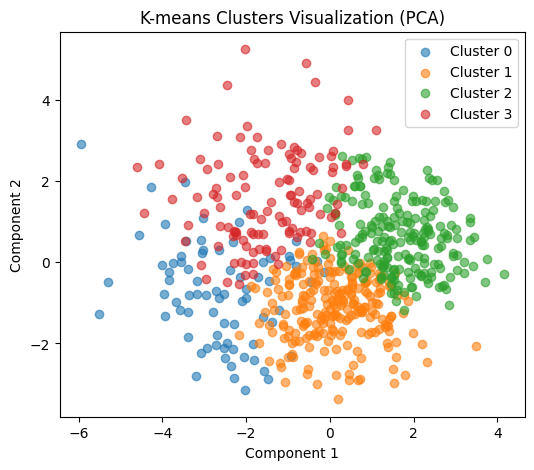

In [ ]:
plt.figure(figsize=(6, 5))

for k in range(best_k_Kmeans):
    idx = cluster_labels == k
    plt.scatter(
        X_pca[idx, 0],
        X_pca[idx, 1],
        alpha=0.6,
        label=f"Cluster {k}"
    )

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("K-means Clusters Visualization (PCA)")
plt.legend()
plt.show()

---

**2) GMM clustering**


2.1) Chọn số cụm (K) tốt nhất

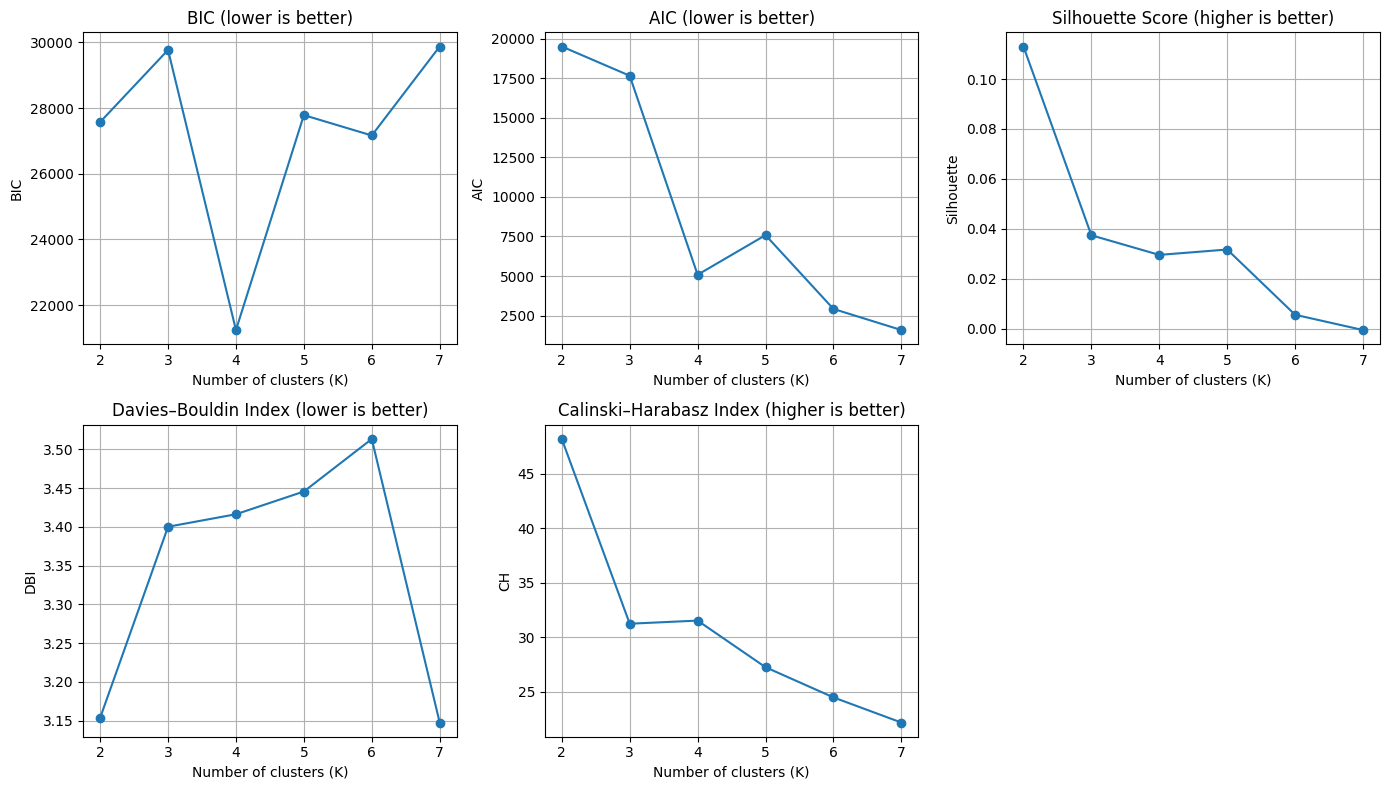

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

Ks = range(2, 8)
Ks_list = list(Ks)

bic_scores = []
aic_scores = []
sil_scores = []
dbi_scores = []
ch_scores = []

for k in Ks:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type='full',
        random_state=42
    )
    gmm.fit(X_scaled)

    labels = gmm.predict(X_scaled)

    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))
    sil_scores.append(silhouette_score(X_scaled, labels))
    dbi_scores.append(davies_bouldin_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.ravel()

# 1. BIC
axes[0].plot(Ks_list, bic_scores, marker='o')
axes[0].set_title("BIC (lower is better)")
axes[0].set_xlabel("Number of clusters (K)")
axes[0].set_ylabel("BIC")
axes[0].grid(True)

# 2. AIC
axes[1].plot(Ks_list, aic_scores, marker='o')
axes[1].set_title("AIC (lower is better)")
axes[1].set_xlabel("Number of clusters (K)")
axes[1].set_ylabel("AIC")
axes[1].grid(True)

# 3. Silhouette
axes[2].plot(Ks_list, sil_scores, marker='o')
axes[2].set_title("Silhouette Score (higher is better)")
axes[2].set_xlabel("Number of clusters (K)")
axes[2].set_ylabel("Silhouette")
axes[2].grid(True)

# 4. Davies–Bouldin Index
axes[3].plot(Ks_list, dbi_scores, marker='o')
axes[3].set_title("Davies–Bouldin Index (lower is better)")
axes[3].set_xlabel("Number of clusters (K)")
axes[3].set_ylabel("DBI")
axes[3].grid(True)

# 5. Calinski–Harabasz Index
axes[4].plot(Ks_list, ch_scores, marker='o')
axes[4].set_title("Calinski–Harabasz Index (higher is better)")
axes[4].set_xlabel("Number of clusters (K)")
axes[4].set_ylabel("CH")
axes[4].grid(True)

axes[5].axis("off")

plt.tight_layout()
plt.show()


Chỉ số BIC đạt giá trị nhỏ nhất tại K = 4, cho thấy mô hình đạt sự cân bằng tốt nhất giữa độ phức tạp và khả năng giải thích dữ liệu, đây là tiêu chí quan trọng nhất khi lựa chọn số thành phần cho GMM.

Mặc dù Silhouette Score có giá trị thấp do đặc tính phân cụm mềm (soft clustering) của GMM, giá trị tại K = 4 vẫn ổn định và không suy giảm đáng kể so với các giá trị K khác.

Các chỉ số Davies–Bouldin Index và Calinski–Harabasz Index tại K = 4 không cho thấy sự suy giảm nghiêm trọng, phản ánh chất lượng phân cụm vẫn ở mức chấp nhận được.

2.2) Huấn luyện GMM với K tối ưu

In [ ]:
best_k_gmm = 4
gmm = GaussianMixture(
    n_components=best_k_gmm,
    covariance_type='full',
    random_state=42
)
gmm.fit(X_scaled)

hard_labels_gmm = gmm.predict(X_scaled)       # gán cứng
soft_labels_gmm = gmm.predict_proba(X_scaled) # gán mềm

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_vis = pca.fit_transform(X_scaled)

2.3) Trực quan hóa dữ liệu - tô màu các điểm dữ liệu

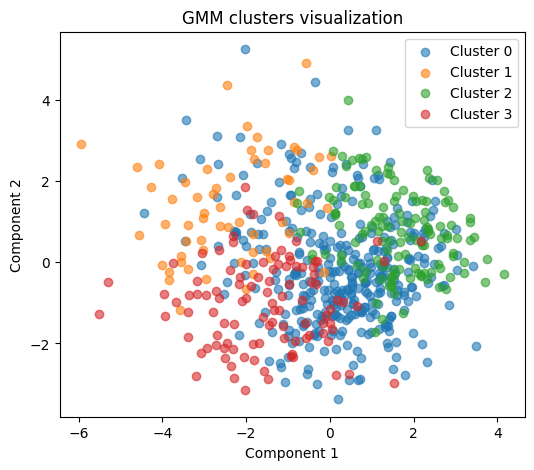

In [ ]:
plt.figure(figsize=(6,5))

for k in range(best_k_gmm):
    idx = hard_labels_gmm == k
    plt.scatter(
        X_vis[idx, 0],
        X_vis[idx, 1],
        alpha=0.6,
        label=f"Cluster {k}"
    )

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("GMM clusters visualization")
plt.legend()
plt.show()


 2.4) Các độ đo đánh giá mối quan hệ giữa các mẫu dữ liệu đầu vào trong các cụm

- Tính chỉ số BIC, quan trọng nhất của GMM

In [ ]:
bic_value = gmm.bic(X_scaled)
print(f"BIC of GMM (K={best_k_gmm}): {bic_value:.2f}")

BIC of GMM (K=4): 21243.30


- Đánh giá Silhouette Score: Đánh giá độ gắn kết trong cụm vs độ tách biệt giữa các cụm

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, hard_labels_gmm)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.02958443900680021


- Davies–Bouldin Index (DBI): Đo mức độ chồng lấn giữa các cụm

In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(X_scaled, hard_labels_gmm)
print("Davies–Bouldin Index:", dbi)

Davies–Bouldin Index: 3.416336645546793


- Calinski–Harabasz Index (CH)
Tỷ lệ giữa: Phương sai giữa các cụm, phương sai trong cụm

In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch = calinski_harabasz_score(X_scaled, hard_labels_gmm)
print("Calinski–Harabasz Index:", ch)

Calinski–Harabasz Index: 31.530083899711787


- Intra-cluster distance (khoảng cách trung bình trong cụm): Đánh giá mối quan hệ giữa các mẫu trong cùng cụm

In [ ]:
import numpy as np

intra_distances = []

for k in range(gmm.n_components):
    cluster_points = X_scaled[hard_labels_gmm == k]
    center = cluster_points.mean(axis=0)

    distances = np.linalg.norm(cluster_points - center, axis=1)
    intra_distances.append(distances.mean())

for k, d in enumerate(intra_distances):
    print(f"Intra-cluster distance (cluster {k}): {d}")

print("Average intra-cluster distance:", np.mean(intra_distances))


Intra-cluster distance (cluster 0): 3.95951511975454
Intra-cluster distance (cluster 1): 4.557239017672448
Intra-cluster distance (cluster 2): 3.6767099331823863
Intra-cluster distance (cluster 3): 4.2260173056810775
Average intra-cluster distance: 4.104870344072614


 2.5) Đánh giá quan hệ giữa các đầu ra tương ứng trong các cụm.

Tính Mean – Variance – Standard Deviation của y theo cụm

In [ ]:
df_gmm_output = pd.DataFrame({
    "cluster": hard_labels_gmm,
    "y": y_scaled
})

cluster_stats = df_gmm_output.groupby("cluster")["y"].agg(
    mean="mean",
    variance="var",
    std="std",
    count="count"
)

print("Thống kê y theo từng cụm (GMM):")
print(cluster_stats)


Thống kê y theo từng cụm (GMM):
              mean  variance       std  count
cluster                                      
0        12.564607  7.119758  2.668287    356
1         9.203390  9.647575  3.106054     59
2        13.638462  6.620215  2.572978    130
3         9.019231  9.514190  3.084508    104


Kiểm định ANOVA (F-test) cho y giữa các cụm

In [ ]:
from scipy.stats import f_oneway

groups = [
    df_gmm_output[df_gmm_output["cluster"] == k]["y"].values
    for k in sorted(df_gmm_output["cluster"].unique())
]

F_statistic, p_value = f_oneway(*groups)

print("ANOVA results:")
print(f"F-statistic = {F_statistic:.4f}")
print(f"p-value     = {p_value:.6f}")


ANOVA results:
F-statistic = 80.4866
p-value     = 0.000000


Vẽ Boxplot y theo cụm

<Figure size 800x500 with 0 Axes>

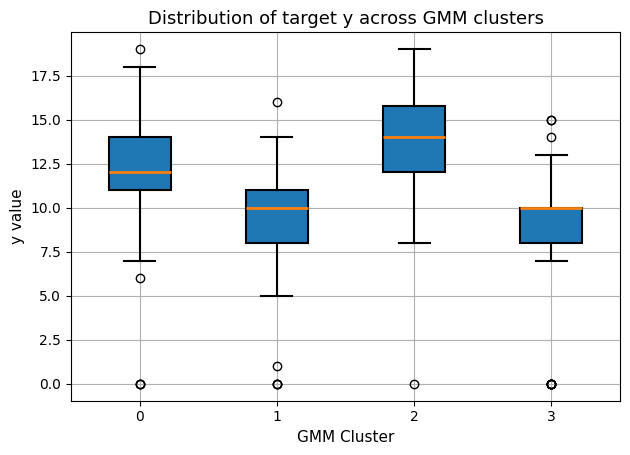

In [ ]:

plt.figure(figsize=(8, 5))
df_gmm_output.boxplot(
    column="y",
    by="cluster",
    grid=True,
    showfliers=True,
    patch_artist=True,
    medianprops=dict(linewidth=2),
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5)
)

plt.title("Distribution of target y across GMM clusters", fontsize=13)
plt.suptitle("")
plt.xlabel("GMM Cluster", fontsize=11)
plt.ylabel("y value", fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


---

**3) DBScan clustering**

PHÂN CỤM DBSCAN TRÊN DỮ LIỆU ĐẦU VÀO

In [ ]:
from sklearn.cluster import DBSCAN

X_scaled = X_scaled.copy()

pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

dbscan = DBSCAN(
    eps=0.8,
    min_samples=3
)

labels_db = dbscan.fit_predict(X_reduced)


NHẬN XÉT MỐI QUAN HỆ GIỮA CÁC MẪU ĐẦU VÀO (ĐỊNH LƯỢNG):
- Số cụm & tỷ lệ nhiễu (noise)

In [ ]:
import numpy as np

n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
noise_ratio = np.mean(labels_db == -1)

print("Số cụm phát hiện:", n_clusters)
print("Tỷ lệ mẫu bị coi là nhiễu:", noise_ratio)


Số cụm phát hiện: 1
Tỷ lệ mẫu bị coi là nhiễu: 0.01386748844375963


- Độ chặt cụm

In [ ]:
from sklearn.metrics import pairwise_distances

def intra_cluster_distance(X, labels):
    dists = []
    for c in set(labels):
        if c == -1:
            continue
        points = X[labels == c]
        if len(points) > 1:
            dists.append(pairwise_distances(points).mean())
    return np.mean(dists) if dists else None

print("Khoảng cách trung bình trong cụm:",
      intra_cluster_distance(X_reduced, labels_db))


Khoảng cách trung bình trong cụm: 2.7508116143712478


ĐÁNH GIÁ MỐI QUAN HỆ GIỮA ĐẦU RA (G3) TRONG CÁC CỤM

- Dùng ANOVA (độ đo định lượng)

In [ ]:
from scipy.stats import f_oneway
import pandas as pd

df_eval = df_preprocessed.copy()
df_eval['cluster'] = labels_db

# Loại noise
df_valid = df_eval[df_eval['cluster'] != -1]

groups = [
    g['G3'].values
    for _, g in df_valid.groupby('cluster')
    if len(g) > 1
]

if len(groups) >= 2:
    f_stat, p_value = f_oneway(*groups)
    print("ANOVA p-value (G3):", p_value)
else:
    print("Không đủ cụm để thực hiện ANOVA")


Không đủ cụm để thực hiện ANOVA


TRỰC QUAN HÓA & PHÂN BIỆT CỤM THEO MÀU

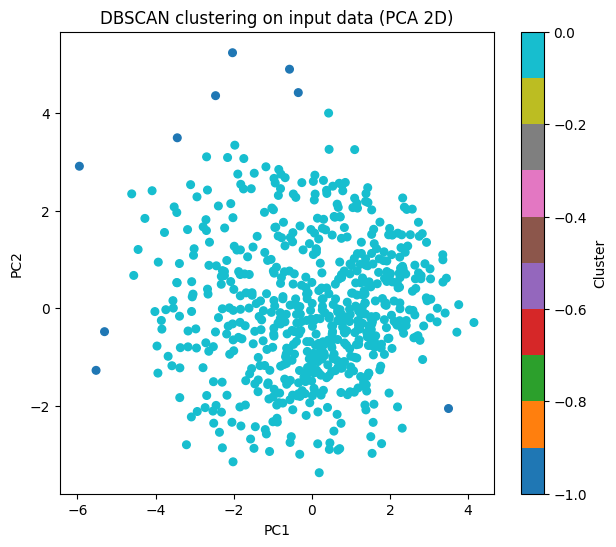

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=labels_db,
    cmap='tab10',
    s=30
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN clustering on input data (PCA 2D)")
plt.colorbar(scatter, label="Cluster")
plt.show()


Sự phân bố dữ liệu cho thấy sự chồng chéo lớn, khiến việc phân tách cụm rõ ràng trở nên khó khăn.

Khi áp dụng DBSCAN, thuật toán có xu hướng xác định một cụm chiếm ưu thế duy nhất do mật độ cao và tính đồng nhất của phân bố dữ liệu. Điều này cho thấy sự thiếu vắng các phân tách rõ ràng dựa trên mật độ. Không giống như các phương pháp dựa trên phân vùng, DBSCAN không ép buộc dữ liệu vào nhiều cụm, và do đó kết quả phân cụm phù hợp với cấu trúc nội tại của tập dữ liệu.

---
---

# **Phần 5: Từ bài toán HỒI QUY đến PHÂN LOẠI**

# **1) Chuẩn bị dữ liệu**

1.1) Kết quả phân cụm

In [ ]:
X_scaled = df_preprocessed.drop(columns=['G3'], axis = 1)
y_scaled = df_preprocessed['G3'].values

stats_gmm = df_gmm_output.groupby("cluster")["y"].agg(
    count="count",
    mean="mean",
    std="std",
    min="min",
    max="max"
)

cluster_y_means = []

for i in range(best_k_gmm):
    mean_val = stats_gmm.loc[i, "mean"]
    count_val = int(stats_gmm.loc[i, "count"])
    cluster_y_means.append((i, mean_val, count_val))

cluster_y_means_sorted = sorted(cluster_y_means, key=lambda x: x[1])

print("Các cụm GMM sắp xếp theo G3:")
for idx, (cid, mean_val, count_val) in enumerate(cluster_y_means_sorted):
    print(f"  Cụm {cid}: Mean G3 = {mean_val:.2f} ({count_val} mẫu)")

Các cụm GMM sắp xếp theo G3:
  Cụm 3: Mean G3 = 9.02 (104 mẫu)
  Cụm 1: Mean G3 = 9.20 (59 mẫu)
  Cụm 0: Mean G3 = 12.56 (356 mẫu)
  Cụm 2: Mean G3 = 13.64 (130 mẫu)


1.2) Kiểm tra các ngưỡng

In [ ]:
mean_0 = cluster_y_means_sorted[0][1]
mean_1 = cluster_y_means_sorted[1][1]
mean_2 = cluster_y_means_sorted[2][1]
mean_3 = cluster_y_means_sorted[3][1]

print("\nTính ngưỡng gợi ý từ kết quả phân cụm")

t1_suggest = (mean_0 + mean_1) / 2
t2_suggest = (mean_1 + mean_2) / 2
t3_suggest = (mean_2 + mean_3) / 2

print(f"  - Ngưỡng 1 (Very Low / Low):   {t1_suggest:.2f}")
print(f"  - Ngưỡng 2 (Low / High):       {t2_suggest:.2f}")
print(f"  - Ngưỡng 3 (High / Very High): {t3_suggest:.2f}")


Tính ngưỡng gợi ý từ kết quả phân cụm
  - Ngưỡng 1 (Very Low / Low):   9.11
  - Ngưỡng 2 (Low / High):       10.88
  - Ngưỡng 3 (High / Very High): 13.10


1.3) Tinh chỉnh ngưỡng để cân bằng số mẫu

In [ ]:
y_cluster = y_scaled
total_samples = len(y_cluster)
num_groups = 4
target_per_group = total_samples // num_groups

print(f"   Tổng số mẫu: {total_samples}")
print(f"   Mục tiêu mỗi nhóm: ~{target_per_group} mẫu")

   Tổng số mẫu: 649
   Mục tiêu mỗi nhóm: ~162 mẫu


In [ ]:
best_t1 = None
best_diff_1 = float('inf')
for t in np.arange(t1_suggest - 3, t1_suggest + 3, 0.1):
    t = round(t, 1)
    count_1 = (y_cluster < t).sum()
    diff = abs(count_1 - target_per_group)
    if diff < best_diff_1:
        best_diff_1 = diff
        best_t1 = t

best_t2 = None
best_diff_2 = float('inf')
for t in np.arange(t2_suggest - 3, t2_suggest + 3, 0.1):
    t = round(t, 1)
    count_2 = ((y_cluster >= best_t1) & (y_cluster < t)).sum()
    diff = abs(count_2 - target_per_group)
    if diff < best_diff_2:
        best_diff_2 = diff
        best_t2 = t

best_t3 = None
best_diff_3 = float('inf')
for t in np.arange(t3_suggest - 3, t3_suggest + 3, 0.1):
    t = round(t, 1)
    count_3 = ((y_cluster >= best_t2) & (y_cluster < t)).sum()
    diff = abs(count_3 - target_per_group)
    if diff < best_diff_3:
        best_diff_3 = diff
        best_t3 = t

print("\nNgưỡng sau khi tinh chỉnh:")
print(f"   Threshold 1: {best_t1:.1f} (lệch {best_diff_1} mẫu)")
print(f"   Threshold 2: {best_t2:.1f} (lệch {best_diff_2} mẫu)")
print(f"   Threshold 3: {best_t3:.1f} (lệch {best_diff_3} mẫu)")



Ngưỡng sau khi tinh chỉnh:
   Threshold 1: 10.1 (lệch 35 mẫu)
   Threshold 2: 12.1 (lệch 14 mẫu)
   Threshold 3: 14.1 (lệch 17 mẫu)


1.4) Tạo nhãn phân loại khi đã có ngưỡng

In [ ]:
def assign_classification_label(val):
    if val < best_t1:
        return 0  # Rất thấp
    elif val < best_t2:
        return 1  # Thấp
    elif val < best_t3:
        return 2  # Cao
    else:
        return 3  # Rất cao

classification_labels = pd.Series(y_cluster).apply(assign_classification_label)

label_names = ['Rất thấp', 'Thấp', 'Cao', 'Rất cao']

print("\nKhoảng giá trị cho mỗi nhãn: Điểm G3")
print(f"   Nhóm 0 (Rất thấp):   G3 < {best_t1:.1f}")
print(f"   Nhóm 1 (Thấp):       {best_t1:.1f} ≤ G3 < {best_t2:.1f}")
print(f"   Nhóm 2 (Cao):        {best_t2:.1f} ≤ G3 < {best_t3:.1f}")
print(f"   Nhóm 3 (Rất cao):    G3 ≥ {best_t3:.1f}")

label_counts = classification_labels.value_counts().sort_index()

print("\nPhân bố số lượng mẫu theo nhãn:")
print("+--------+-------------+------------+--------------------------+")
print("| Nhãn   | Tên nhóm    | Số mẫu     | Tỷ lệ                    |")
print("+--------+-------------+------------+--------------------------+")

for label in range(4):
    count = label_counts.get(label, 0)
    pct = count / total_samples * 100
    bar = ' ' * int(pct / 2)
    print(
        f"|   {label:<4} | {label_names[label]:<11} | "
        f"{count:>6}     | {pct:>5.1f}% {bar:<17} |"
    )

print("+--------+-------------+------------+--------------------------+")



Khoảng giá trị cho mỗi nhãn: Điểm G3
   Nhóm 0 (Rất thấp):   G3 < 10.1
   Nhóm 1 (Thấp):       10.1 ≤ G3 < 12.1
   Nhóm 2 (Cao):        12.1 ≤ G3 < 14.1
   Nhóm 3 (Rất cao):    G3 ≥ 14.1

Phân bố số lượng mẫu theo nhãn:
+--------+-------------+------------+--------------------------+
| Nhãn   | Tên nhóm    | Số mẫu     | Tỷ lệ                    |
+--------+-------------+------------+--------------------------+
|   0    | Rất thấp    |    197     |  30.4%                   |
|   1    | Thấp        |    176     |  27.1%                   |
|   2    | Cao         |    145     |  22.3%                   |
|   3    | Rất cao     |    131     |  20.2%                   |
+--------+-------------+------------+--------------------------+


1.5) Tạo dữ liệu mới để chuyển thành bài toán PHÂN LOẠI

In [ ]:
# Dữ liệu
df_preprocessed = pd.read_csv("/content/drive/MyDrive/data_project_ml/midterm-finalterm/Data/student-por.csv")

# Bỏ trường đầu ra y
X = df_preprocessed.drop(columns=['G3'], axis = 1)
y = df_preprocessed['G3'].values

df_classification = X.copy()
df_classification["G3_class"] = classification_labels

print("\n[Dữ liệu classification] 5 mẫu đầu:")
display(df_classification.head())


[Dữ liệu classification] 5 mẫu đầu:


school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   
3    home   mother           1          3         0        no    yes   no   
4    home   father           1          2         0        no    yes   no   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3_class  
0     1       3         4   0  11         1  
1     1       3         2   9  11         1  
2     3       3         6  12  13         1  
3     1       5         0  14  14         2  
4     2       5         0  11  13         2

In [ ]:
print("\nPhân bố số lượng mẫu theo nhãn G3_class:")
print(df_classification["G3_class"].value_counts().sort_index())


Phân bố số lượng mẫu theo nhãn G3_class:
G3_class
0    197
1    176
2    145
3    131
Name: count, dtype: int64


Tách dữ liệu X-y cho mô hình phân loại

In [ ]:
X_class = df_classification.drop(columns=["G3_class"])
y_class = df_classification["G3_class"]

print(X_class.shape)
print(y_class.shape)

(649, 32)
(649,)


---

# **2) Các mô hình phân loại**

**2.1) Chuẩn bị phân loại**

In [ ]:
# Import thư viện
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Logistic Regression
lr = LogisticRegression(
    multi_class='multinomial',
    solver='sag',
    max_iter=2000,
    random_state=42
)

# Naive Bayes
nb = GaussianNB()

# SVM (RBF kernel)
svm = SVC(
    kernel='rbf',
    C=0.5,
    gamma='scale',
    decision_function_shape='ovr',
    random_state=42
)

models = {
    "Logistic Regression": lr,
    "Naive Bayes": nb,
    "SVM (RBF)": svm
}

ratios = [
    {"name": "4:1 (80/20)", "test_size": 0.2},
    {"name": "7:3 (70/30)", "test_size": 0.3},
    {"name": "6:4 (60/40)", "test_size": 0.4}
]

print("Sẵn sàng huấn luyện mô hình")

Sẵn sàng huấn luyện mô hình


**Hàm đánh giá mô hình chung**

In [ ]:
from sklearn.metrics import (
    accuracy_score, classification_report,
    recall_score, f1_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(
    model,
    model_name,
    X_train, X_test,
    y_train, y_test,
    data_type,
    ratio_name,
    label_names
):

    # Huấn luyện
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    # Đánh giá
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc  = accuracy_score(y_test,  y_pred_test)
    diff = train_acc - test_acc

    recall = recall_score(
        y_test, y_pred_test,
        average='macro',
        zero_division=0
    )
    f1 = f1_score(
        y_test, y_pred_test,
        average='macro',
        zero_division=0
    )

    clf_report = classification_report(
        y_test, y_pred_test,
        target_names=label_names,
        zero_division=0
    )

    cm = confusion_matrix(y_test, y_pred_test)

    print("\n" + "="*60)
    print(f"MÔ HÌNH: {model_name}")
    print(f"LOẠI DỮ LIỆU: {data_type}")
    print(f"TỈ LỆ CHIA: {ratio_name}")
    print("="*60)
    print(f"Accuracy (Train): {train_acc:.4f}")
    print(f"Accuracy (Test):  {test_acc:.4f}")
    print(f"Chênh lệch Train–Test: {diff:.4f}")
    print(f"Recall (Macro): {recall:.4f}")
    print(f"F1-score (Macro): {f1:.4f}")

    print("\nClassification Report (Test):")
    print(clf_report)

    print("Confusion Matrix (Test):")
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=label_names,
        yticklabels=label_names
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{model_name} – {ratio_name}")
    plt.tight_layout()
    plt.show()

    return {
        "Mô hình": model_name,
        "Loại dữ liệu": data_type,
        "Tỉ lệ chia": ratio_name,
        "Accuracy (Train)": round(train_acc, 4),
        "Accuracy (Test)": round(test_acc, 4),
        "Recall (Macro)": round(recall, 4),
        "F1-score (Macro)": round(f1, 4),
        "Chênh lệch Train-Test": round(diff, 4),
        "Confusion Matrix": cm
    }


**2.2) Mô hình phân loại Naive Bayes**

2.2.1) Phân loại với dữ liệu gốc


MÔ HÌNH: Naive Bayes
LOẠI DỮ LIỆU: Dữ liệu gốc
TỈ LỆ CHIA: 4:1 (80/20)
Accuracy (Train): 0.5472
Accuracy (Test):  0.6000
Chênh lệch Train–Test: -0.0528
Recall (Macro): 0.6006
F1-score (Macro): 0.5474

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.77      0.75      0.76        40
        Thấp       0.69      0.51      0.59        35
         Cao       1.00      0.14      0.24        29
     Rất cao       0.43      1.00      0.60        26

    accuracy                           0.60       130
   macro avg       0.72      0.60      0.55       130
weighted avg       0.73      0.60      0.57       130

Confusion Matrix (Test):


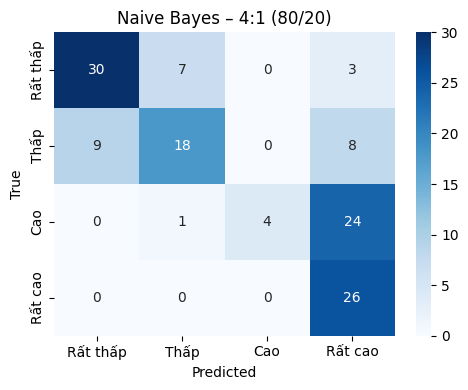


MÔ HÌNH: Naive Bayes
LOẠI DỮ LIỆU: Dữ liệu gốc
TỈ LỆ CHIA: 7:3 (70/30)
Accuracy (Train): 0.5793
Accuracy (Test):  0.5641
Chênh lệch Train–Test: 0.0152
Recall (Macro): 0.5693
F1-score (Macro): 0.5188

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.75      0.73      0.74        59
        Thấp       0.59      0.42      0.49        53
         Cao       0.88      0.16      0.27        44
     Rất cao       0.41      0.97      0.58        39

    accuracy                           0.56       195
   macro avg       0.66      0.57      0.52       195
weighted avg       0.67      0.56      0.53       195

Confusion Matrix (Test):


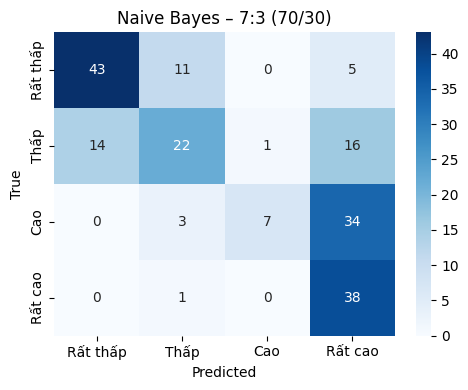


MÔ HÌNH: Naive Bayes
LOẠI DỮ LIỆU: Dữ liệu gốc
TỈ LỆ CHIA: 6:4 (60/40)
Accuracy (Train): 0.5861
Accuracy (Test):  0.5423
Chênh lệch Train–Test: 0.0438
Recall (Macro): 0.5462
F1-score (Macro): 0.4884

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.73      0.77      0.75        79
        Thấp       0.60      0.30      0.40        71
         Cao       0.69      0.16      0.25        58
     Rất cao       0.39      0.96      0.56        52

    accuracy                           0.54       260
   macro avg       0.60      0.55      0.49       260
weighted avg       0.62      0.54      0.50       260

Confusion Matrix (Test):


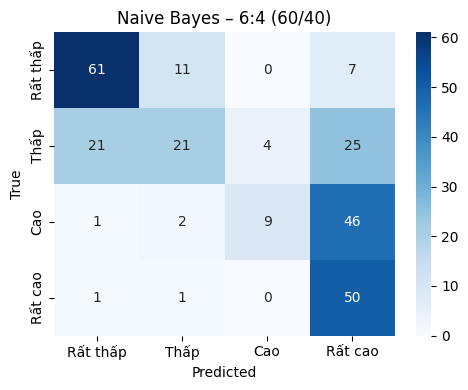

In [ ]:
all_results_nb = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_class,
        y_class,
        test_size=ratio["test_size"],
        random_state=42,
        stratify=y_class
    )

    X_train_num = X_train[numeric_columns]
    X_test_num  = X_test[numeric_columns]

    X_train_cat = X_train[object_columns]
    X_test_cat  = X_test[object_columns]

    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    X_test_num_scaled  = scaler.transform(X_test_num)

    X_train_num_scaled = pd.DataFrame(
        X_train_num_scaled,
        columns=numeric_columns,
        index=X_train.index
    )
    X_test_num_scaled = pd.DataFrame(
        X_test_num_scaled,
        columns=numeric_columns,
        index=X_test.index
    )

    X_train_cat_oh = pd.get_dummies(X_train_cat, drop_first=True)
    X_test_cat_oh  = pd.get_dummies(X_test_cat, drop_first=True)

    X_train_cat_oh, X_test_cat_oh = X_train_cat_oh.align(
        X_test_cat_oh,
        join='left',
        axis=1,
        fill_value=0
    )

    X_train_final = pd.concat(
        [X_train_num_scaled, X_train_cat_oh],
        axis=1
    )
    X_test_final = pd.concat(
        [X_test_num_scaled, X_test_cat_oh],
        axis=1
    )

    res = evaluate_model(
        model=nb,
        model_name="Naive Bayes",
        X_train=X_train_final,
        X_test=X_test_final,
        y_train=y_train,
        y_test=y_test,
        data_type="Dữ liệu gốc",
        ratio_name=ratio["name"],
        label_names=label_names
    )

    all_results_nb.append(res)


2.2.2) Phân loại với dữ liệu giảm chiều


MÔ HÌNH: Naive Bayes
LOẠI DỮ LIỆU: PCA (1/3)
TỈ LỆ CHIA: 4:1 (80/20)
Accuracy (Train): 0.6782
Accuracy (Test):  0.5385
Chênh lệch Train–Test: 0.1398
Recall (Macro): 0.5528
F1-score (Macro): 0.5529

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.65      0.50      0.56        40
        Thấp       0.39      0.43      0.41        35
         Cao       0.44      0.55      0.49        29
     Rất cao       0.76      0.73      0.75        26

    accuracy                           0.54       130
   macro avg       0.56      0.55      0.55       130
weighted avg       0.56      0.54      0.54       130

Confusion Matrix (Test):


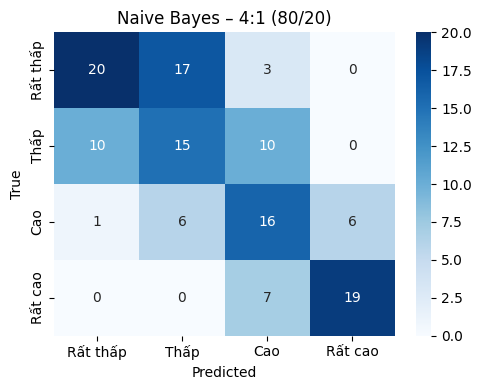


MÔ HÌNH: Naive Bayes
LOẠI DỮ LIỆU: PCA (1/3)
TỈ LỆ CHIA: 7:3 (70/30)
Accuracy (Train): 0.6718
Accuracy (Test):  0.5590
Chênh lệch Train–Test: 0.1128
Recall (Macro): 0.5737
F1-score (Macro): 0.5728

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.69      0.53      0.60        59
        Thấp       0.42      0.42      0.42        53
         Cao       0.46      0.64      0.53        44
     Rất cao       0.78      0.72      0.75        39

    accuracy                           0.56       195
   macro avg       0.59      0.57      0.57       195
weighted avg       0.58      0.56      0.56       195

Confusion Matrix (Test):


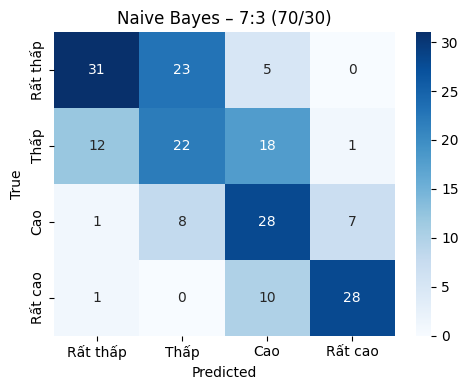


MÔ HÌNH: Naive Bayes
LOẠI DỮ LIỆU: PCA (1/3)
TỈ LỆ CHIA: 6:4 (60/40)
Accuracy (Train): 0.7018
Accuracy (Test):  0.5808
Chênh lệch Train–Test: 0.1210
Recall (Macro): 0.5929
F1-score (Macro): 0.5982

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.70      0.57      0.63        79
        Thấp       0.43      0.45      0.44        71
         Cao       0.47      0.62      0.53        58
     Rất cao       0.86      0.73      0.79        52

    accuracy                           0.58       260
   macro avg       0.62      0.59      0.60       260
weighted avg       0.61      0.58      0.59       260

Confusion Matrix (Test):


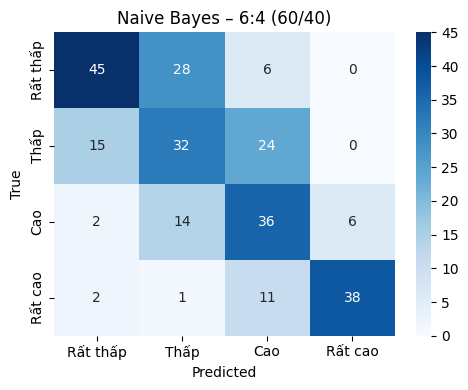

In [ ]:
all_results_nb_pca = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_class,
        y_class,
        test_size=ratio["test_size"],
        random_state=42,
        stratify=y_class
    )

    X_train_num = X_train[numeric_columns]
    X_test_num  = X_test[numeric_columns]

    X_train_cat = X_train[object_columns]
    X_test_cat  = X_test[object_columns]

    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    X_test_num_scaled  = scaler.transform(X_test_num)

    X_train_num_scaled = pd.DataFrame(
        X_train_num_scaled,
        columns=numeric_columns,
        index=X_train.index
    )
    X_test_num_scaled = pd.DataFrame(
        X_test_num_scaled,
        columns=numeric_columns,
        index=X_test.index
    )

    X_train_cat_oh = pd.get_dummies(X_train_cat, drop_first=True)
    X_test_cat_oh  = pd.get_dummies(X_test_cat, drop_first=True)

    X_train_cat_oh, X_test_cat_oh = X_train_cat_oh.align(
        X_test_cat_oh,
        join="left",
        axis=1,
        fill_value=0
    )

    X_train_full = pd.concat(
        [X_train_num_scaled, X_train_cat_oh],
        axis=1
    )
    X_test_full = pd.concat(
        [X_test_num_scaled, X_test_cat_oh],
        axis=1
    )

    n_features = X_train_full.shape[1]
    n_components = max(1, n_features // 3)

    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train_full)
    X_test_pca  = pca.transform(X_test_full)

    res_pca = evaluate_model(
        model=nb,
        model_name="Naive Bayes",
        X_train=X_train_pca,
        X_test=X_test_pca,
        y_train=y_train,
        y_test=y_test,
        data_type="PCA (1/3)",
        ratio_name=ratio["name"],
        label_names=label_names
    )

    all_results_nb_pca.append(res_pca)

2.2.3) Kết quả - so sánh

In [ ]:
df_results = pd.DataFrame(all_results_nb + all_results_nb_pca)

df_summary = df_results[[
    "Loại dữ liệu",
    "Tỉ lệ chia",
    "Mô hình",
    "Accuracy (Train)",
    "Accuracy (Test)",
    "Recall (Macro)",
    "F1-score (Macro)",
    "Chênh lệch Train-Test"
]]

df_summary

Loại dữ liệu   Tỉ lệ chia      Mô hình  Accuracy (Train)  Accuracy (Test)  \
0  Dữ liệu gốc  4:1 (80/20)  Naive Bayes            0.5472           0.6000   
1  Dữ liệu gốc  7:3 (70/30)  Naive Bayes            0.5793           0.5641   
2  Dữ liệu gốc  6:4 (60/40)  Naive Bayes            0.5861           0.5423   
3    PCA (1/3)  4:1 (80/20)  Naive Bayes            0.6782           0.5385   
4    PCA (1/3)  7:3 (70/30)  Naive Bayes            0.6718           0.5590   
5    PCA (1/3)  6:4 (60/40)  Naive Bayes            0.7018           0.5808   

   Recall (Macro)  F1-score (Macro)  Chênh lệch Train-Test  
0          0.6006            0.5474                -0.0528  
1          0.5693            0.5188                 0.0152  
2          0.5462            0.4884                 0.0438  
3          0.5528            0.5529                 0.1398  
4          0.5737            0.5728                 0.1128  
5          0.5929            0.5982                 0.1210

Biểu đồ so sánh ACCURACY theo tỉ lệ chia

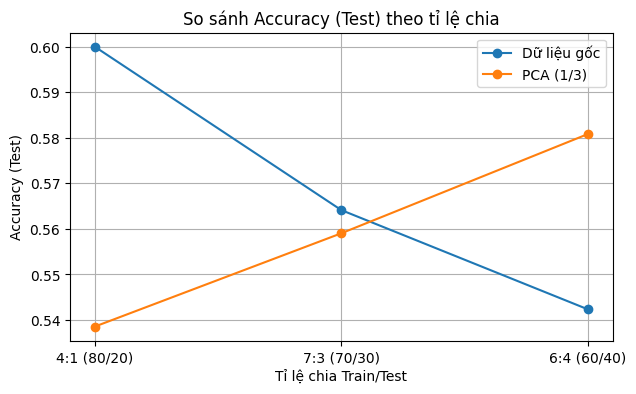

In [ ]:
plt.figure(figsize=(7, 4))

for data_type in df_summary["Loại dữ liệu"].unique():
    subset = df_summary[df_summary["Loại dữ liệu"] == data_type]
    plt.plot(
        subset["Tỉ lệ chia"],
        subset["Accuracy (Test)"],
        marker='o',
        label=data_type
    )

plt.title("So sánh Accuracy (Test) theo tỉ lệ chia")
plt.xlabel("Tỉ lệ chia Train/Test")
plt.ylabel("Accuracy (Test)")
plt.legend()
plt.grid(True)
plt.show()


Biểu đồ so sánh RECALL

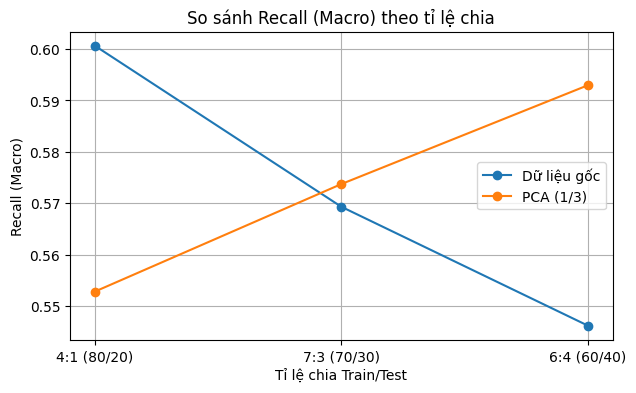

In [ ]:
plt.figure(figsize=(7, 4))

for data_type in df_summary["Loại dữ liệu"].unique():
    subset = df_summary[df_summary["Loại dữ liệu"] == data_type]
    plt.plot(
        subset["Tỉ lệ chia"],
        subset["Recall (Macro)"],
        marker='o',
        label=data_type
    )

plt.title("So sánh Recall (Macro) theo tỉ lệ chia")
plt.xlabel("Tỉ lệ chia Train/Test")
plt.ylabel("Recall (Macro)")
plt.legend()
plt.grid(True)
plt.show()


Biểu đồ so sánh F1-SCORE

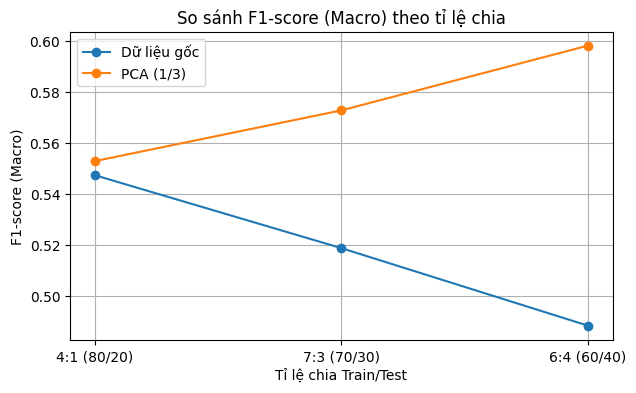

In [ ]:
plt.figure(figsize=(7, 4))

for data_type in df_summary["Loại dữ liệu"].unique():
    subset = df_summary[df_summary["Loại dữ liệu"] == data_type]
    plt.plot(
        subset["Tỉ lệ chia"],
        subset["F1-score (Macro)"],
        marker='o',
        label=data_type
    )

plt.title("So sánh F1-score (Macro) theo tỉ lệ chia")
plt.xlabel("Tỉ lệ chia Train/Test")
plt.ylabel("F1-score (Macro)")
plt.legend()
plt.grid(True)
plt.show()

Nhận xét:
- Với dữ liệu gốc, mô hình Naive Bayes cho thấy:

    Accuracy (Train) và Accuracy (Test) xấp xỉ nhau, thậm chí ở tỉ lệ 80/20, Accuracy(Test) > Accuracy(Train).

    Chênh lệch Train–Test rất nhỏ (từ −0.05 đến 0.04), cho thấy mô hình hầu như không bị overfitting.

    Tuy nhiên, các chỉ số Recall (Macro) và F1-score (Macro) ở mức trung bình, cho thấy khả năng phân biệt giữa các lớp còn hạn chế.

- Với dữ liệu sau Standard + One-hot + PCA, ta quan sát thấy:

    Accuracy (Train) tăng đáng kể (≈ 0.67–0.70), chứng tỏ mô hình học được nhiều cấu trúc hơn trong không gian đặc trưng đã giảm chiều.

    Accuracy (Test) không tăng tương ứng, thậm chí ở tỉ lệ 80/20 còn thấp hơn dữ liệu gốc.

    Chênh lệch Train–Test tăng mạnh (≈ 0.11–0.14), phản ánh hiện tượng overfitting rõ rệt.

**2.3) Mô hình phân loại Logistic Regression**

2.3.1) Phân loại với dữ liệu gốc


MÔ HÌNH: Logistic Regression
LOẠI DỮ LIỆU: Dữ liệu gốc
TỈ LỆ CHIA: 4:1 (80/20)
Accuracy (Train): 0.8478
Accuracy (Test):  0.7000
Chênh lệch Train–Test: 0.1478
Recall (Macro): 0.6869
F1-score (Macro): 0.6882

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.81      0.88      0.84        40
        Thấp       0.65      0.63      0.64        35
         Cao       0.55      0.55      0.55        29
     Rất cao       0.75      0.69      0.72        26

    accuracy                           0.70       130
   macro avg       0.69      0.69      0.69       130
weighted avg       0.70      0.70      0.70       130

Confusion Matrix (Test):


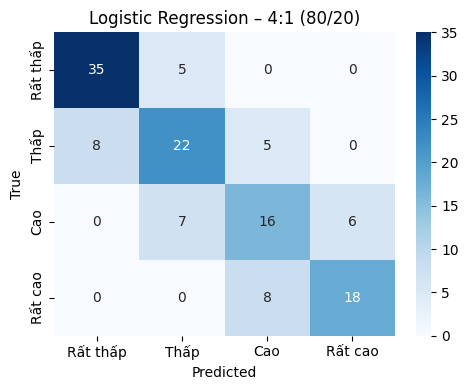


MÔ HÌNH: Logistic Regression
LOẠI DỮ LIỆU: Dữ liệu gốc
TỈ LỆ CHIA: 7:3 (70/30)
Accuracy (Train): 0.8678
Accuracy (Test):  0.6872
Chênh lệch Train–Test: 0.1807
Recall (Macro): 0.6849
F1-score (Macro): 0.6853

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.77      0.85      0.81        59
        Thấp       0.56      0.51      0.53        53
         Cao       0.59      0.61      0.60        44
     Rất cao       0.83      0.77      0.80        39

    accuracy                           0.69       195
   macro avg       0.69      0.68      0.69       195
weighted avg       0.68      0.69      0.68       195

Confusion Matrix (Test):


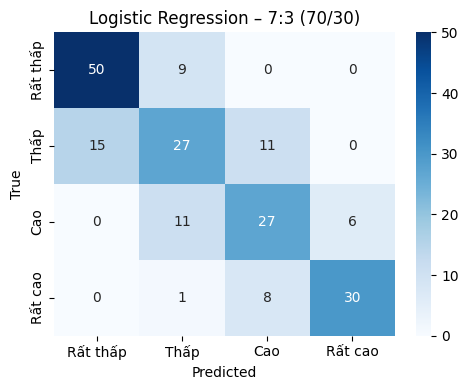


MÔ HÌNH: Logistic Regression
LOẠI DỮ LIỆU: Dữ liệu gốc
TỈ LỆ CHIA: 6:4 (60/40)
Accuracy (Train): 0.8715
Accuracy (Test):  0.6962
Chênh lệch Train–Test: 0.1753
Recall (Macro): 0.6990
F1-score (Macro): 0.7027

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.73      0.78      0.76        79
        Thấp       0.56      0.54      0.55        71
         Cao       0.66      0.71      0.68        58
     Rất cao       0.89      0.77      0.82        52

    accuracy                           0.70       260
   macro avg       0.71      0.70      0.70       260
weighted avg       0.70      0.70      0.70       260

Confusion Matrix (Test):


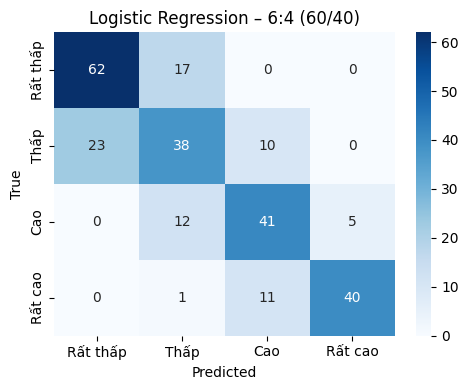

In [ ]:
all_results_lr = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_class,
        y_class,
        test_size=ratio["test_size"],
        random_state=42,
        stratify=y_class
    )

    X_train_num = X_train[numeric_columns]
    X_test_num  = X_test[numeric_columns]

    X_train_cat = X_train[object_columns]
    X_test_cat  = X_test[object_columns]

    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    X_test_num_scaled  = scaler.transform(X_test_num)

    X_train_num_scaled = pd.DataFrame(
        X_train_num_scaled,
        columns=numeric_columns,
        index=X_train.index
    )
    X_test_num_scaled = pd.DataFrame(
        X_test_num_scaled,
        columns=numeric_columns,
        index=X_test.index
    )

    X_train_cat_oh = pd.get_dummies(X_train_cat, drop_first=True)
    X_test_cat_oh  = pd.get_dummies(X_test_cat, drop_first=True)

    X_train_cat_oh, X_test_cat_oh = X_train_cat_oh.align(
        X_test_cat_oh,
        join='left',
        axis=1,
        fill_value=0
    )

    X_train_final = pd.concat(
        [X_train_num_scaled, X_train_cat_oh],
        axis=1
    )
    X_test_final = pd.concat(
        [X_test_num_scaled, X_test_cat_oh],
        axis=1
    )

    res = evaluate_model(
        model=lr,
        model_name="Logistic Regression",
        X_train=X_train_final,
        X_test=X_test_final,
        y_train=y_train,
        y_test=y_test,
        data_type="Dữ liệu gốc",
        ratio_name=ratio["name"],
        label_names=label_names
    )

    all_results_lr.append(res)


2.3.2) Phân loại với dữ liệu giảm chiều


MÔ HÌNH: Logistic Regression
LOẠI DỮ LIỆU: PCA (1/3)
TỈ LỆ CHIA: 4:1 (80/20)
Accuracy (Train): 0.8150
Accuracy (Test):  0.7231
Chênh lệch Train–Test: 0.0920
Recall (Macro): 0.7215
F1-score (Macro): 0.7191

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.80      0.82      0.81        40
        Thấp       0.63      0.63      0.63        35
         Cao       0.65      0.59      0.62        29
     Rất cao       0.79      0.85      0.81        26

    accuracy                           0.72       130
   macro avg       0.72      0.72      0.72       130
weighted avg       0.72      0.72      0.72       130

Confusion Matrix (Test):


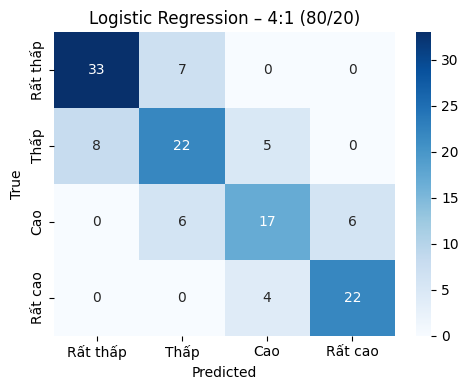


MÔ HÌNH: Logistic Regression
LOẠI DỮ LIỆU: PCA (1/3)
TỈ LỆ CHIA: 7:3 (70/30)
Accuracy (Train): 0.8414
Accuracy (Test):  0.7026
Chênh lệch Train–Test: 0.1388
Recall (Macro): 0.7010
F1-score (Macro): 0.7032

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.79      0.81      0.80        59
        Thấp       0.60      0.58      0.59        53
         Cao       0.61      0.64      0.62        44
     Rất cao       0.83      0.77      0.80        39

    accuracy                           0.70       195
   macro avg       0.71      0.70      0.70       195
weighted avg       0.70      0.70      0.70       195

Confusion Matrix (Test):


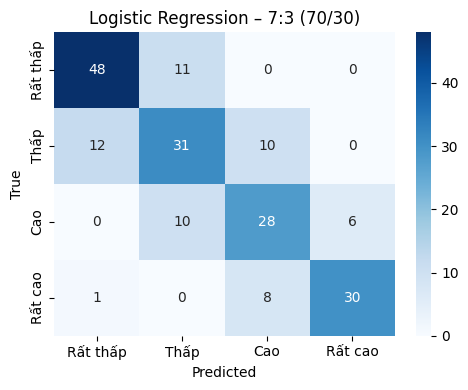


MÔ HÌNH: Logistic Regression
LOẠI DỮ LIỆU: PCA (1/3)
TỈ LỆ CHIA: 6:4 (60/40)
Accuracy (Train): 0.8329
Accuracy (Test):  0.7538
Chênh lệch Train–Test: 0.0791
Recall (Macro): 0.7539
F1-score (Macro): 0.7573

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.81      0.85      0.83        79
        Thấp       0.64      0.63      0.64        71
         Cao       0.68      0.71      0.69        58
     Rất cao       0.91      0.83      0.87        52

    accuracy                           0.75       260
   macro avg       0.76      0.75      0.76       260
weighted avg       0.76      0.75      0.75       260

Confusion Matrix (Test):


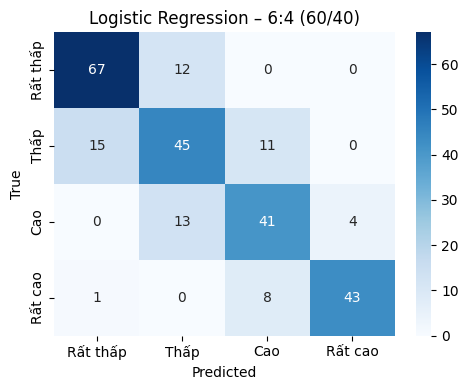

In [ ]:
all_results_lr_pca = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_class,
        y_class,
        test_size=ratio["test_size"],
        random_state=42,
        stratify=y_class
    )

    X_train_num = X_train[numeric_columns]
    X_test_num  = X_test[numeric_columns]

    X_train_cat = X_train[object_columns]
    X_test_cat  = X_test[object_columns]

    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    X_test_num_scaled  = scaler.transform(X_test_num)

    X_train_num_scaled = pd.DataFrame(
        X_train_num_scaled,
        columns=numeric_columns,
        index=X_train.index
    )
    X_test_num_scaled = pd.DataFrame(
        X_test_num_scaled,
        columns=numeric_columns,
        index=X_test.index
    )

    X_train_cat_oh = pd.get_dummies(X_train_cat, drop_first=True)
    X_test_cat_oh  = pd.get_dummies(X_test_cat, drop_first=True)

    X_train_cat_oh, X_test_cat_oh = X_train_cat_oh.align(
        X_test_cat_oh,
        join="left",
        axis=1,
        fill_value=0
    )

    X_train_full = pd.concat(
        [X_train_num_scaled, X_train_cat_oh],
        axis=1
    )
    X_test_full = pd.concat(
        [X_test_num_scaled, X_test_cat_oh],
        axis=1
    )

    n_features = X_train_full.shape[1]
    n_components = max(1, n_features // 3)

    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train_full)
    X_test_pca  = pca.transform(X_test_full)

    res_pca = evaluate_model(
        model=lr,
        model_name="Logistic Regression",
        X_train=X_train_pca,
        X_test=X_test_pca,
        y_train=y_train,
        y_test=y_test,
        data_type="PCA (1/3)",
        ratio_name=ratio["name"],
        label_names=label_names
    )

    all_results_lr_pca.append(res_pca)

2.3.3) Kết quả + so sánh

In [ ]:
df_results_lr = pd.DataFrame(all_results_lr + all_results_lr_pca)

df_summary_lr = df_results_lr[[
    "Loại dữ liệu",
    "Tỉ lệ chia",
    "Mô hình",
    "Accuracy (Train)",
    "Accuracy (Test)",
    "Recall (Macro)",
    "F1-score (Macro)",
    "Chênh lệch Train-Test"
]]

df_summary_lr

Loại dữ liệu   Tỉ lệ chia              Mô hình  Accuracy (Train)  \
0  Dữ liệu gốc  4:1 (80/20)  Logistic Regression            0.8478   
1  Dữ liệu gốc  7:3 (70/30)  Logistic Regression            0.8678   
2  Dữ liệu gốc  6:4 (60/40)  Logistic Regression            0.8715   
3    PCA (1/3)  4:1 (80/20)  Logistic Regression            0.8150   
4    PCA (1/3)  7:3 (70/30)  Logistic Regression            0.8414   
5    PCA (1/3)  6:4 (60/40)  Logistic Regression            0.8329   

   Accuracy (Test)  Recall (Macro)  F1-score (Macro)  Chênh lệch Train-Test  
0           0.7000          0.6869            0.6882                 0.1478  
1           0.6872          0.6849            0.6853                 0.1807  
2           0.6962          0.6990            0.7027                 0.1753  
3           0.7231          0.7215            0.7191                 0.0920  
4           0.7026          0.7010            0.7032                 0.1388  
5           0.7538          0.7539            0.7573                 0.0791

Biểu đồ so sánh ACCURACY

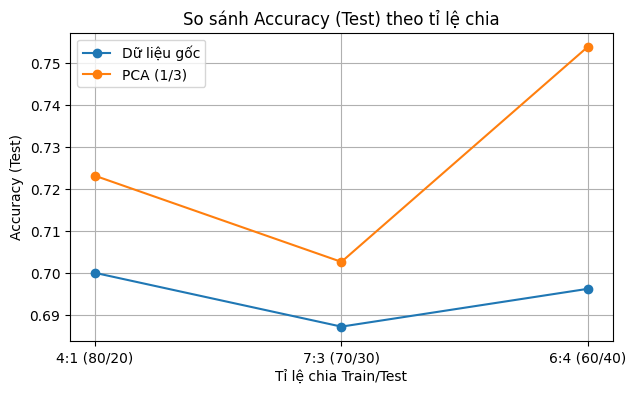

In [ ]:
plt.figure(figsize=(7, 4))

for data_type in df_summary_lr["Loại dữ liệu"].unique():
    subset = df_summary_lr[df_summary_lr["Loại dữ liệu"] == data_type]
    plt.plot(
        subset["Tỉ lệ chia"],
        subset["Accuracy (Test)"],
        marker='o',
        label=data_type
    )

plt.title("So sánh Accuracy (Test) theo tỉ lệ chia")
plt.xlabel("Tỉ lệ chia Train/Test")
plt.ylabel("Accuracy (Test)")
plt.legend()
plt.grid(True)
plt.show()

Biểu đồ so sánh RECALL

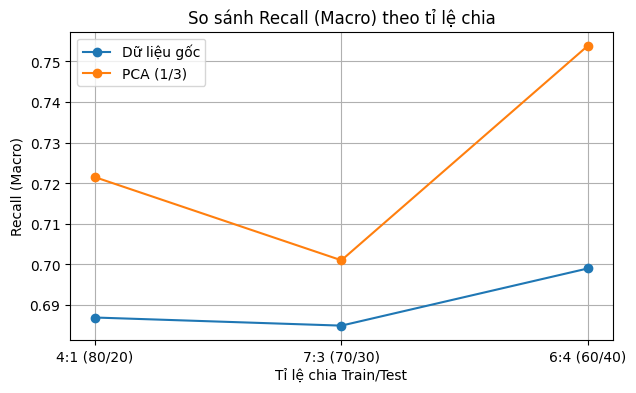

In [ ]:
plt.figure(figsize=(7, 4))

for data_type in df_summary_lr["Loại dữ liệu"].unique():
    subset = df_summary_lr[df_summary_lr["Loại dữ liệu"] == data_type]
    plt.plot(
        subset["Tỉ lệ chia"],
        subset["Recall (Macro)"],
        marker='o',
        label=data_type
    )

plt.title("So sánh Recall (Macro) theo tỉ lệ chia")
plt.xlabel("Tỉ lệ chia Train/Test")
plt.ylabel("Recall (Macro)")
plt.legend()
plt.grid(True)
plt.show()


Biểu đồ so sánh F1-SCORE

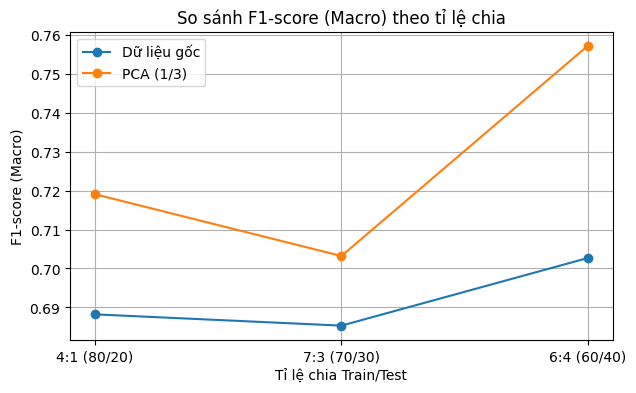

In [ ]:
plt.figure(figsize=(7, 4))

for data_type in df_summary_lr["Loại dữ liệu"].unique():
    subset = df_summary_lr[df_summary_lr["Loại dữ liệu"] == data_type]
    plt.plot(
        subset["Tỉ lệ chia"],
        subset["F1-score (Macro)"],
        marker='o',
        label=data_type
    )

plt.title("So sánh F1-score (Macro) theo tỉ lệ chia")
plt.xlabel("Tỉ lệ chia Train/Test")
plt.ylabel("F1-score (Macro)")
plt.legend()
plt.grid(True)
plt.show()

Nhận xét:
- Recall (Macro) và F1-score (Macro):
  Tăng nhất quán khi dùng PCA, đặc biệt rõ ở tỉ lệ 60/40.
  Điều này chứng tỏ PCA không chỉ cải thiện accuracy tổng thể Mà còn giúp mô hình cân bằng tốt hơn giữa các lớp, kể cả lớp thiểu số
- Mô hình Logistic Regression đạt Accuracy huấn luyện rất cao (≈ 0.85–0.87) ở cả ba tỉ lệ chia. Tuy nhiên, Accuracy trên tập test thấp hơn đáng kể (≈ 0.69–0.70). Chênh lệch Train–Test lớn (0.15–0.18), cho thấy mô hình có xu hướng overfitting

**2.4) Mô hình phân loại SVM**

2.4.1) Phân loại với dữ liệu gốc


MÔ HÌNH: SVM - RBF kernel
LOẠI DỮ LIỆU: Dữ liệu gốc
TỈ LỆ CHIA: 4:1 (80/20)
Accuracy (Train): 0.8420
Accuracy (Test):  0.6923
Chênh lệch Train–Test: 0.1497
Recall (Macro): 0.6830
F1-score (Macro): 0.6899

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.79      0.82      0.80        40
        Thấp       0.58      0.63      0.60        35
         Cao       0.59      0.59      0.59        29
     Rất cao       0.86      0.69      0.77        26

    accuracy                           0.69       130
   macro avg       0.70      0.68      0.69       130
weighted avg       0.70      0.69      0.69       130

Confusion Matrix (Test):


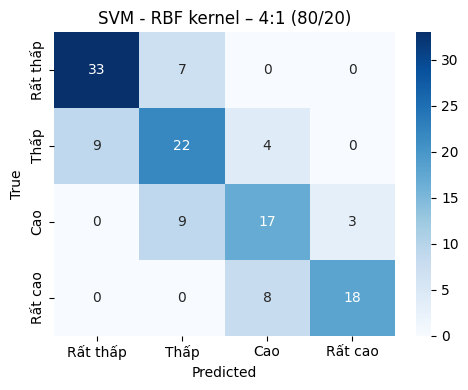


MÔ HÌNH: SVM - RBF kernel
LOẠI DỮ LIỆU: Dữ liệu gốc
TỈ LỆ CHIA: 7:3 (70/30)
Accuracy (Train): 0.8678
Accuracy (Test):  0.6462
Chênh lệch Train–Test: 0.2217
Recall (Macro): 0.6387
F1-score (Macro): 0.6491

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.73      0.78      0.75        59
        Thấp       0.52      0.57      0.54        53
         Cao       0.54      0.57      0.56        44
     Rất cao       0.89      0.64      0.75        39

    accuracy                           0.65       195
   macro avg       0.67      0.64      0.65       195
weighted avg       0.66      0.65      0.65       195

Confusion Matrix (Test):


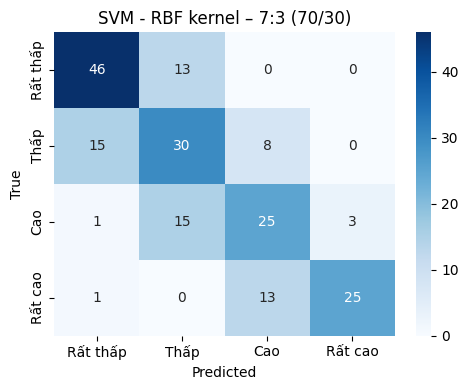


MÔ HÌNH: SVM - RBF kernel
LOẠI DỮ LIỆU: Dữ liệu gốc
TỈ LỆ CHIA: 6:4 (60/40)
Accuracy (Train): 0.8560
Accuracy (Test):  0.6808
Chênh lệch Train–Test: 0.1753
Recall (Macro): 0.6769
F1-score (Macro): 0.6866

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.78      0.76      0.77        79
        Thấp       0.56      0.62      0.59        71
         Cao       0.58      0.66      0.61        58
     Rất cao       0.92      0.67      0.78        52

    accuracy                           0.68       260
   macro avg       0.71      0.68      0.69       260
weighted avg       0.70      0.68      0.69       260

Confusion Matrix (Test):


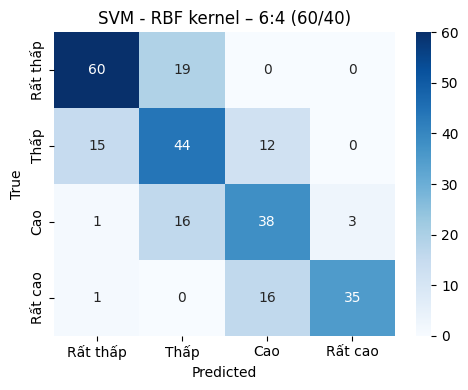

In [ ]:
all_results_svm = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_class,
        y_class,
        test_size=ratio["test_size"],
        random_state=42,
        stratify=y_class
    )

    X_train_num = X_train[numeric_columns]
    X_test_num  = X_test[numeric_columns]

    X_train_cat = X_train[object_columns]
    X_test_cat  = X_test[object_columns]

    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    X_test_num_scaled  = scaler.transform(X_test_num)

    X_train_num_scaled = pd.DataFrame(
        X_train_num_scaled,
        columns=numeric_columns,
        index=X_train.index
    )
    X_test_num_scaled = pd.DataFrame(
        X_test_num_scaled,
        columns=numeric_columns,
        index=X_test.index
    )

    X_train_cat_oh = pd.get_dummies(X_train_cat, drop_first=True)
    X_test_cat_oh  = pd.get_dummies(X_test_cat, drop_first=True)

    X_train_cat_oh, X_test_cat_oh = X_train_cat_oh.align(
        X_test_cat_oh,
        join='left',
        axis=1,
        fill_value=0
    )

    X_train_final = pd.concat(
        [X_train_num_scaled, X_train_cat_oh],
        axis=1
    )
    X_test_final = pd.concat(
        [X_test_num_scaled, X_test_cat_oh],
        axis=1
    )

    res = evaluate_model(
        model=svm,
        model_name="SVM - RBF kernel",
        X_train=X_train_final,
        X_test=X_test_final,
        y_train=y_train,
        y_test=y_test,
        data_type="Dữ liệu gốc",
        ratio_name=ratio["name"],
        label_names=label_names
    )

    all_results_svm.append(res)

2.4.2) Phân loại với dữ liệu giảm chiều


MÔ HÌNH: SVM - RBF kernel
LOẠI DỮ LIỆU: PCA (1/3)
TỈ LỆ CHIA: 4:1 (80/20)
Accuracy (Train): 0.8304
Accuracy (Test):  0.6846
Chênh lệch Train–Test: 0.1458
Recall (Macro): 0.6781
F1-score (Macro): 0.6867

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.76      0.78      0.77        40
        Thấp       0.58      0.63      0.60        35
         Cao       0.59      0.66      0.62        29
     Rất cao       0.89      0.65      0.76        26

    accuracy                           0.68       130
   macro avg       0.71      0.68      0.69       130
weighted avg       0.70      0.68      0.69       130

Confusion Matrix (Test):


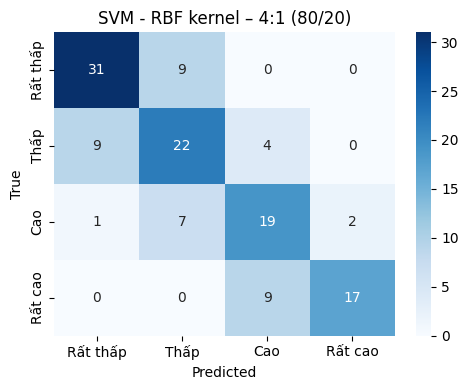


MÔ HÌNH: SVM - RBF kernel
LOẠI DỮ LIỆU: PCA (1/3)
TỈ LỆ CHIA: 7:3 (70/30)
Accuracy (Train): 0.8502
Accuracy (Test):  0.6718
Chênh lệch Train–Test: 0.1784
Recall (Macro): 0.6691
F1-score (Macro): 0.6738

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.73      0.80      0.76        59
        Thấp       0.57      0.53      0.55        53
         Cao       0.57      0.66      0.61        44
     Rất cao       0.87      0.69      0.77        39

    accuracy                           0.67       195
   macro avg       0.69      0.67      0.67       195
weighted avg       0.68      0.67      0.67       195

Confusion Matrix (Test):


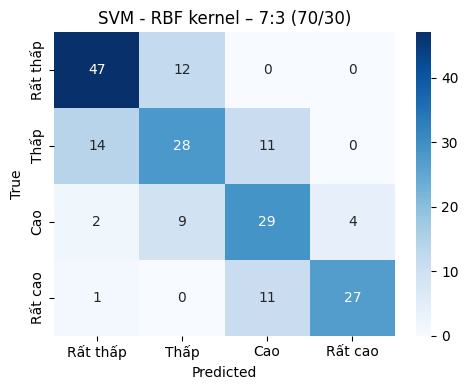


MÔ HÌNH: SVM - RBF kernel
LOẠI DỮ LIỆU: PCA (1/3)
TỈ LỆ CHIA: 6:4 (60/40)
Accuracy (Train): 0.8252
Accuracy (Test):  0.6692
Chênh lệch Train–Test: 0.1560
Recall (Macro): 0.6643
F1-score (Macro): 0.6722

Classification Report (Test):
              precision    recall  f1-score   support

    Rất thấp       0.78      0.78      0.78        79
        Thấp       0.56      0.56      0.56        71
         Cao       0.54      0.66      0.59        58
     Rất cao       0.89      0.65      0.76        52

    accuracy                           0.67       260
   macro avg       0.69      0.66      0.67       260
weighted avg       0.69      0.67      0.67       260

Confusion Matrix (Test):


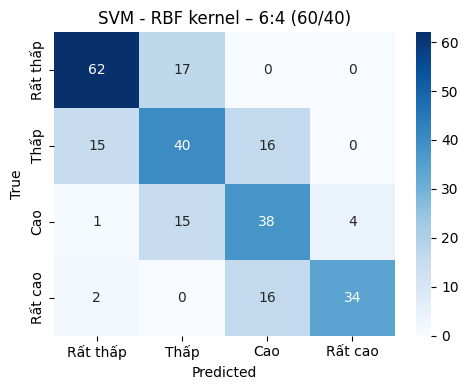

In [ ]:
all_results_svm_pca = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_class,
        y_class,
        test_size=ratio["test_size"],
        random_state=42,
        stratify=y_class
    )

    X_train_num = X_train[numeric_columns]
    X_test_num  = X_test[numeric_columns]

    X_train_cat = X_train[object_columns]
    X_test_cat  = X_test[object_columns]

    scaler = StandardScaler()
    X_train_num_scaled = scaler.fit_transform(X_train_num)
    X_test_num_scaled  = scaler.transform(X_test_num)

    X_train_num_scaled = pd.DataFrame(
        X_train_num_scaled,
        columns=numeric_columns,
        index=X_train.index
    )
    X_test_num_scaled = pd.DataFrame(
        X_test_num_scaled,
        columns=numeric_columns,
        index=X_test.index
    )

    X_train_cat_oh = pd.get_dummies(X_train_cat, drop_first=True)
    X_test_cat_oh  = pd.get_dummies(X_test_cat, drop_first=True)

    X_train_cat_oh, X_test_cat_oh = X_train_cat_oh.align(
        X_test_cat_oh,
        join="left",
        axis=1,
        fill_value=0
    )

    X_train_full = pd.concat(
        [X_train_num_scaled, X_train_cat_oh],
        axis=1
    )
    X_test_full = pd.concat(
        [X_test_num_scaled, X_test_cat_oh],
        axis=1
    )

    n_features = X_train_full.shape[1]
    n_components = max(1, n_features // 3)

    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train_full)
    X_test_pca  = pca.transform(X_test_full)

    res_pca = evaluate_model(
        model=svm,
        model_name="SVM - RBF kernel",
        X_train=X_train_pca,
        X_test=X_test_pca,
        y_train=y_train,
        y_test=y_test,
        data_type="PCA (1/3)",
        ratio_name=ratio["name"],
        label_names=label_names
    )

    all_results_svm_pca.append(res_pca)

2.4.3) Kết quả + so sánh:

In [ ]:
df_results_svm = pd.DataFrame(all_results_svm + all_results_svm_pca)

df_summary_svm = df_results_svm[[
    "Loại dữ liệu",
    "Tỉ lệ chia",
    "Mô hình",
    "Accuracy (Train)",
    "Accuracy (Test)",
    "Recall (Macro)",
    "F1-score (Macro)",
    "Chênh lệch Train-Test"
]]

df_summary_svm

Loại dữ liệu   Tỉ lệ chia           Mô hình  Accuracy (Train)  \
0  Dữ liệu gốc  4:1 (80/20)  SVM - RBF kernel            0.8420   
1  Dữ liệu gốc  7:3 (70/30)  SVM - RBF kernel            0.8678   
2  Dữ liệu gốc  6:4 (60/40)  SVM - RBF kernel            0.8560   
3    PCA (1/3)  4:1 (80/20)  SVM - RBF kernel            0.8304   
4    PCA (1/3)  7:3 (70/30)  SVM - RBF kernel            0.8502   
5    PCA (1/3)  6:4 (60/40)  SVM - RBF kernel            0.8252   

   Accuracy (Test)  Recall (Macro)  F1-score (Macro)  Chênh lệch Train-Test  
0           0.6923          0.6830            0.6899                 0.1497  
1           0.6462          0.6387            0.6491                 0.2217  
2           0.6808          0.6769            0.6866                 0.1753  
3           0.6846          0.6781            0.6867                 0.1458  
4           0.6718          0.6691            0.6738                 0.1784  
5           0.6692          0.6643            0.6722                 0.1560

Biểu đồ so sánh ACCURACY

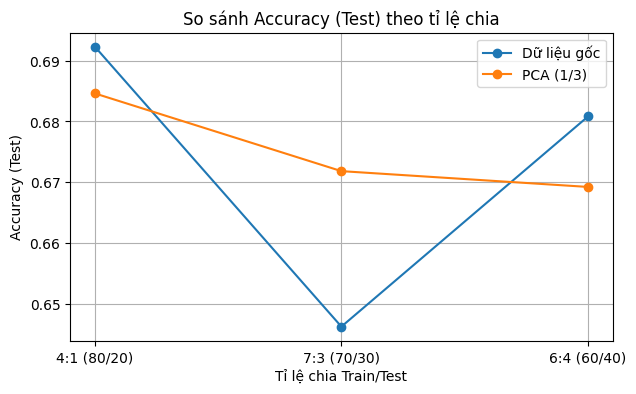

In [ ]:
plt.figure(figsize=(7, 4))

for data_type in df_summary_svm["Loại dữ liệu"].unique():
    subset = df_summary_svm[df_summary_svm["Loại dữ liệu"] == data_type]
    plt.plot(
        subset["Tỉ lệ chia"],
        subset["Accuracy (Test)"],
        marker='o',
        label=data_type
    )

plt.title("So sánh Accuracy (Test) theo tỉ lệ chia")
plt.xlabel("Tỉ lệ chia Train/Test")
plt.ylabel("Accuracy (Test)")
plt.legend()
plt.grid(True)
plt.show()

Biểu đồ so sánh RECALL

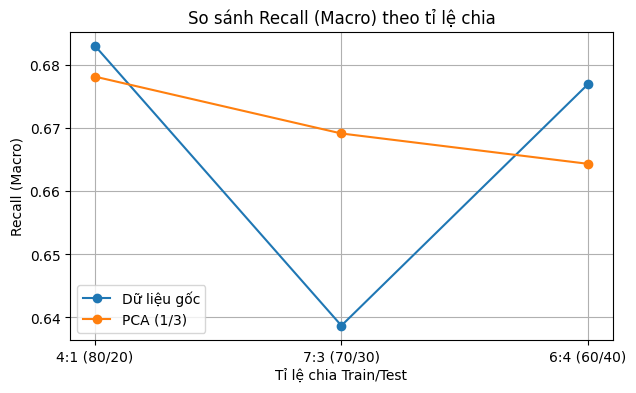

In [ ]:
plt.figure(figsize=(7, 4))

for data_type in df_summary_svm["Loại dữ liệu"].unique():
    subset = df_summary_svm[df_summary_svm["Loại dữ liệu"] == data_type]
    plt.plot(
        subset["Tỉ lệ chia"],
        subset["Recall (Macro)"],
        marker='o',
        label=data_type
    )

plt.title("So sánh Recall (Macro) theo tỉ lệ chia")
plt.xlabel("Tỉ lệ chia Train/Test")
plt.ylabel("Recall (Macro)")
plt.legend()
plt.grid(True)
plt.show()


Biểu đồ so sánh F1-SCORE

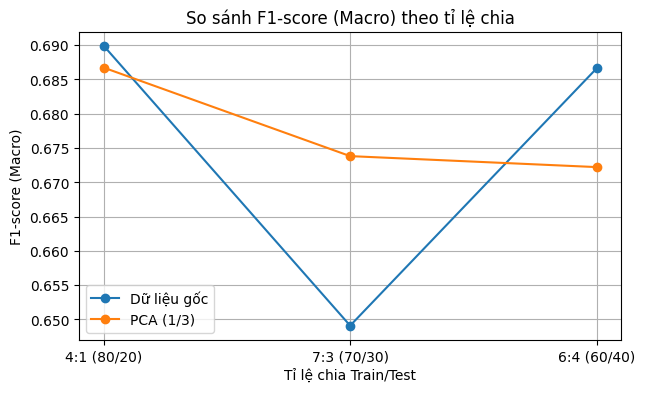

In [ ]:
plt.figure(figsize=(7, 4))

for data_type in df_summary_svm["Loại dữ liệu"].unique():
    subset = df_summary_svm[df_summary_svm["Loại dữ liệu"] == data_type]
    plt.plot(
        subset["Tỉ lệ chia"],
        subset["F1-score (Macro)"],
        marker='o',
        label=data_type
    )

plt.title("So sánh F1-score (Macro) theo tỉ lệ chia")
plt.xlabel("Tỉ lệ chia Train/Test")
plt.ylabel("F1-score (Macro)")
plt.legend()
plt.grid(True)
plt.show()

Nhận xét:
- SVM với RBF kernel đạt Accuracy huấn luyện cao (0.84–0.87). Tuy nhiên, Accuracy trên tập test giảm đáng kể, đặc biệt: Tỉ lệ 70/30: Test Accuracy chỉ 0.6462

- Chênh lệch Train–Test lớn: Lên tới 0.22 (70/30) -> Điều này cho thấy: Mô hình overfitting rõ rệt

- Sau khi áp dụng PCA: Accuracy huấn luyện giảm nhẹ, Accuracy test tăng hoặc ổn định hơn ở hầu hết các tỉ lệ và chênh lệch Train–Test giảm rõ rệt:

- Điều này cho thấy:
  PCA giúp giảm độ phức tạp không gian đặc trưng
  Mô hình tổng quát hóa tốt hơn

---

**2.5) Tổng quan + so sánh 3 mô hình phân loại: Naive Bayes, Logistic, SVM**

In [ ]:
df_combined = pd.concat([df_summary, df_summary_lr, df_summary_svm], ignore_index=True)

print(df_combined)

   Loại dữ liệu   Tỉ lệ chia              Mô hình  Accuracy (Train)  \
0   Dữ liệu gốc  4:1 (80/20)          Naive Bayes            0.5472   
1   Dữ liệu gốc  7:3 (70/30)          Naive Bayes            0.5793   
2   Dữ liệu gốc  6:4 (60/40)          Naive Bayes            0.5861   
3     PCA (1/3)  4:1 (80/20)          Naive Bayes            0.6782   
4     PCA (1/3)  7:3 (70/30)          Naive Bayes            0.6718   
5     PCA (1/3)  6:4 (60/40)          Naive Bayes            0.7018   
6   Dữ liệu gốc  4:1 (80/20)  Logistic Regression            0.8478   
7   Dữ liệu gốc  7:3 (70/30)  Logistic Regression            0.8678   
8   Dữ liệu gốc  6:4 (60/40)  Logistic Regression            0.8715   
9     PCA (1/3)  4:1 (80/20)  Logistic Regression            0.8150   
10    PCA (1/3)  7:3 (70/30)  Logistic Regression            0.8414   
11    PCA (1/3)  6:4 (60/40)  Logistic Regression            0.8329   
12  Dữ liệu gốc  4:1 (80/20)     SVM - RBF kernel            0.8420   
13  Dữ

So sánh ACCURACY

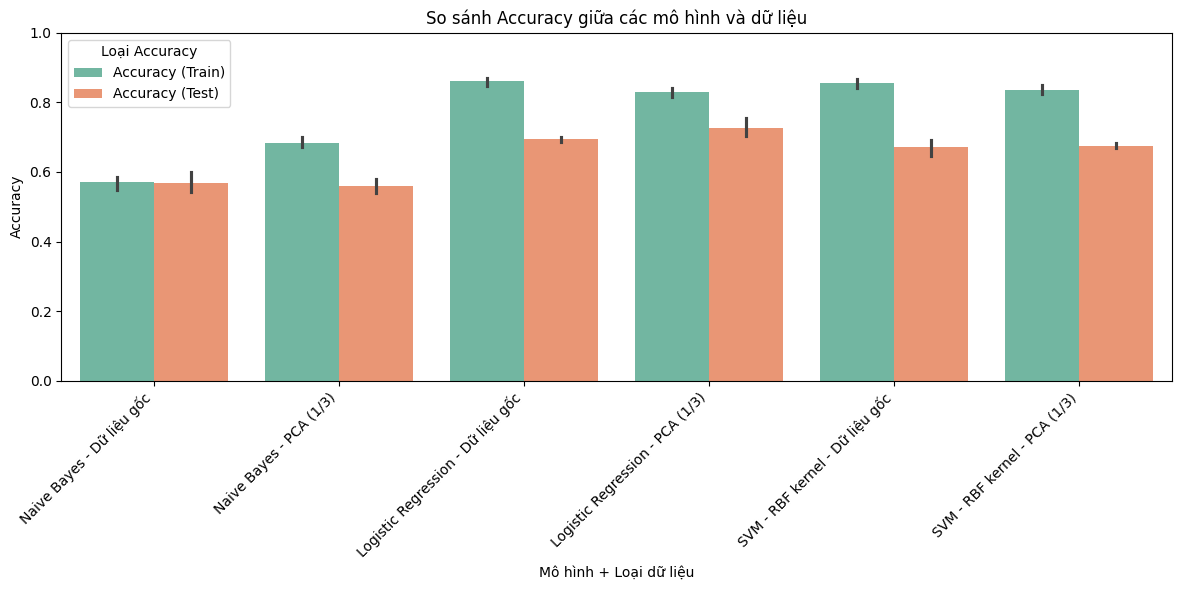

In [ ]:
def prepare_summary(df, model_prefix):
    df_plot = df.copy()
    df_plot["Mô hình + Dữ liệu"] = df_plot["Mô hình"] + " - " + df_plot["Loại dữ liệu"]
    return df_plot

df_nb_plot = prepare_summary(df_summary, "NB")
df_lr_plot = prepare_summary(df_summary_lr, "LR")
df_svm_plot = prepare_summary(df_summary_svm, "SVM")

df_all_plot = pd.concat([df_nb_plot, df_lr_plot, df_svm_plot], ignore_index=True)

df_melted = df_all_plot.melt(
    id_vars=["Mô hình + Dữ liệu", "Tỉ lệ chia"],
    value_vars=["Accuracy (Train)", "Accuracy (Test)"],
    var_name="Loại Accuracy",
    value_name="Accuracy"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted,
    x="Mô hình + Dữ liệu",
    y="Accuracy",
    hue="Loại Accuracy",
    palette="Set2"
)
plt.title("So sánh Accuracy giữa các mô hình và dữ liệu")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Mô hình + Loại dữ liệu")
plt.legend(title="Loại Accuracy")
plt.tight_layout()
plt.show()


So sánh RECALL

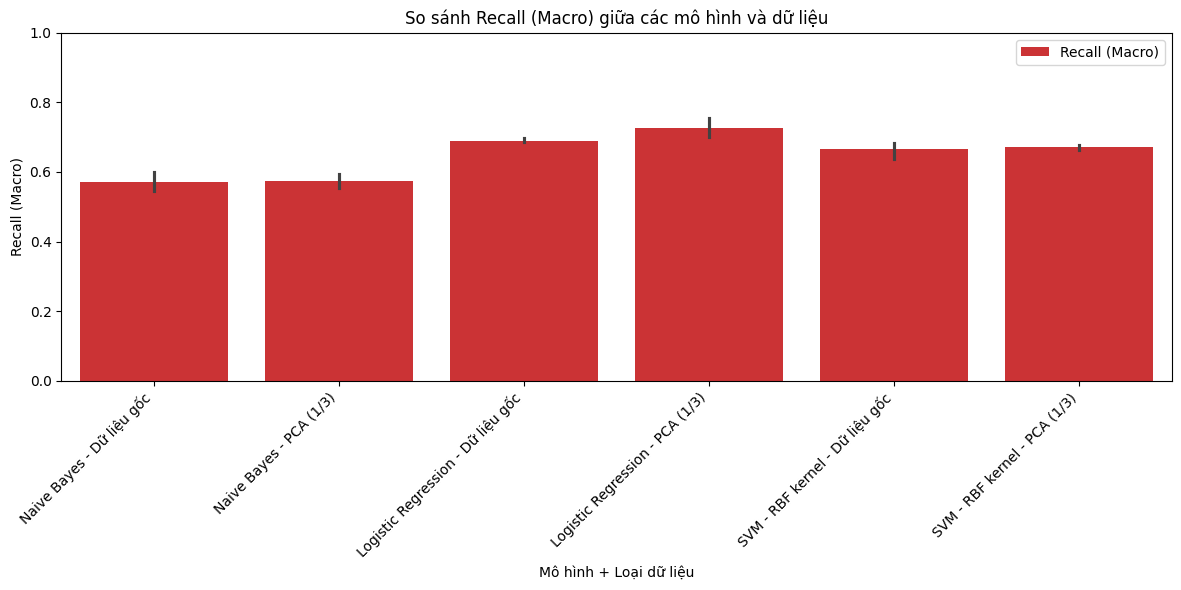

In [ ]:
df_melted_recall = df_all_plot.melt(
    id_vars=["Mô hình + Dữ liệu", "Tỉ lệ chia"],
    value_vars=["Recall (Macro)"],
    var_name="Loại Recall",
    value_name="Recall"
)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted_recall,
    x="Mô hình + Dữ liệu",
    y="Recall",
    hue="Loại Recall",
    palette="Set1"
)
plt.title("So sánh Recall (Macro) giữa các mô hình và dữ liệu")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.ylabel("Recall (Macro)")
plt.xlabel("Mô hình + Loại dữ liệu")
plt.legend(title="")
plt.tight_layout()
plt.show()


So sánh F1-SCORE

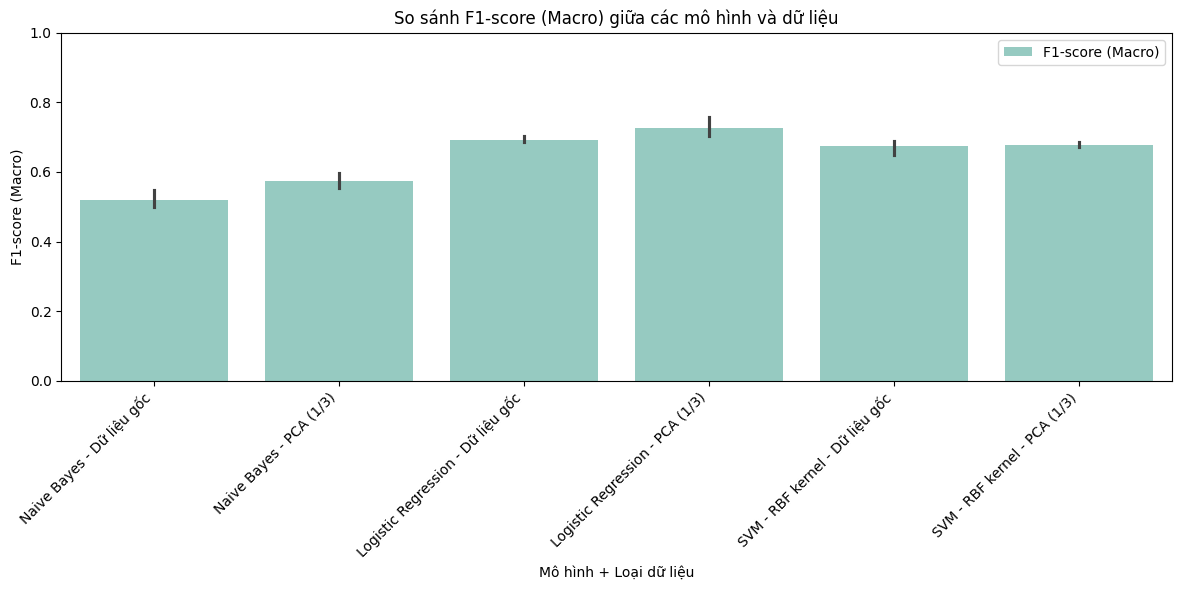

In [ ]:
df_melted_f1 = df_all_plot.melt(
    id_vars=["Mô hình + Dữ liệu", "Tỉ lệ chia"],
    value_vars=["F1-score (Macro)"],
    var_name="Loại F1",
    value_name="F1-score"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted_f1,
    x="Mô hình + Dữ liệu",
    y="F1-score",
    hue="Loại F1",
    palette="Set3"
)
plt.title("So sánh F1-score (Macro) giữa các mô hình và dữ liệu")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.ylabel("F1-score (Macro)")
plt.xlabel("Mô hình + Loại dữ liệu")
plt.legend(title="")
plt.tight_layout()
plt.show()


So sánh độ Overfit

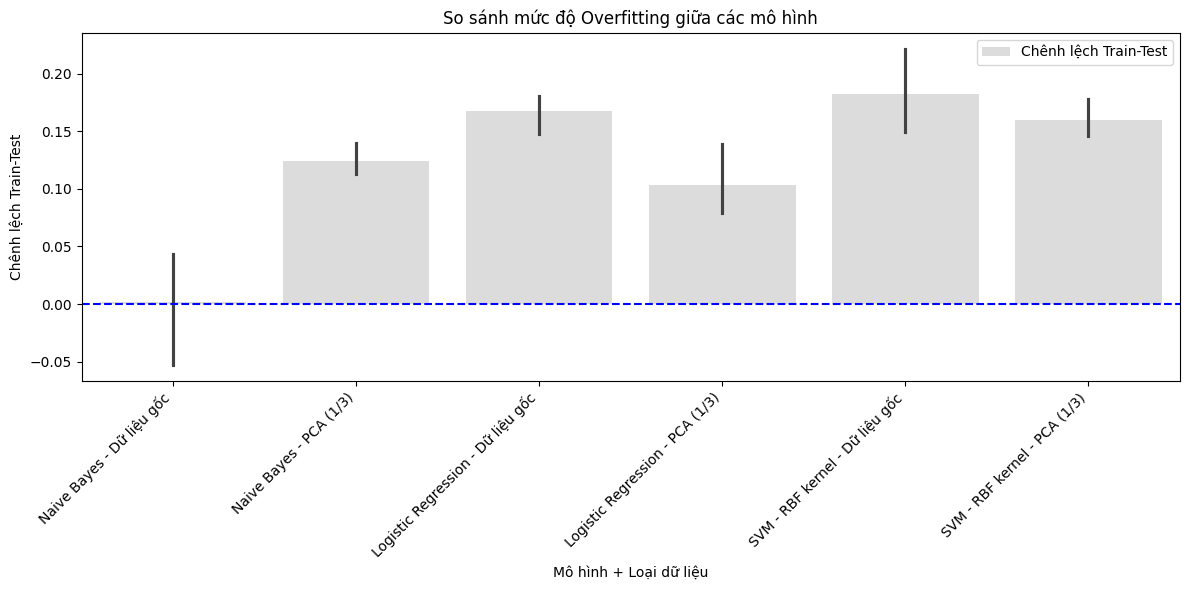

In [ ]:
df_melted_overfit = df_all_plot.melt(
    id_vars=["Mô hình + Dữ liệu", "Tỉ lệ chia"],
    value_vars=["Chênh lệch Train-Test"],
    var_name="Loại",
    value_name="Chênh lệch"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted_overfit,
    x="Mô hình + Dữ liệu",
    y="Chênh lệch",
    hue="Loại",
    palette="coolwarm"
)
plt.title("So sánh mức độ Overfitting giữa các mô hình")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Chênh lệch Train-Test")
plt.xlabel("Mô hình + Loại dữ liệu")
plt.axhline(0, color='blue', linestyle='--')
plt.legend(title="")
plt.tight_layout()
plt.show()
